In [1]:
import networkx as nx
import time
# import resource 

In [2]:
import math

def dot(v,w): 
    x,y = v
    X,Y = w
    return x*X + y*Y

def length(v):
    x,y = v
    return math.sqrt(x*x + y*y)

def vector(b,e):
    X,Y = e
    return (X-x, Y-y)

def unit(v):
    x,y = v
    mag = length(v)
    return (x/mag, y/mag)

def distance(p0,p1):
    return length(vector(p0,p1))

def scale(v,sc):
    x,y = v
    return (x * sc, y * sc)

def add(v,w):
    x,y = v
    X,Y = w
    return (x+X, y+Y)


def pnt2line(pnt, start, end):   #node position as input
    line_vec = vector(start, end)
    pnt_vec = vector(start, pnt)
    line_len = length(line_vec)
    line_unitvec = unit(line_vec)
    pnt_vec_scaled = scale(pnt_vec, 1.0/line_len)
    t = dot(line_unitvec, pnt_vec_scaled)    
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = scale(line_vec, t)
    dist = distance(nearest, pnt_vec)
    nearest = add(nearest, start)
    return dist


def dist_euclidean(p1, p2, pos):  #node name as input and pos to specify name of position variable for this graph
    x1, y1 = pos[p1]
    x2, y2 = pos[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2) 

# New backtracking version that doesn't include it in the visited_nodes

In [3]:

def Human_gaze_algorithm_backtracking(Graph, start_node, end_node, pos):
    current_node = start_node
    visited_nodes = [start_node]
    dead_nodes = []
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))

        for i in visited_nodes:
            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)

        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)

            while len(neighbors) == 0:                                                  
                current_node = visited_nodes[-1]
          
                neighbors = list(Graph.neighbors(current_node))
            
                
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)

                visited_nodes.remove(current_node) 
               
            visited_nodes.append(current_node) 
            
        options = {} 
        
        for i in neighbors:
                options[i] = pnt2line(pos[i], pos[start_node], pos[end_node])  
        current_node = min(options, key=options.get) 
        visited_nodes.append(current_node)  
               
    return visited_nodes 

def Human_gaze_algorithm_2_backtracking(Graph, start_node, end_node, pos):
    current_node = start_node
    visited_nodes = [start_node]
    dead_nodes = [] # a node might be added multiple times to this know maybe as it was before might not be a problem
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))
        for i in visited_nodes:

            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)
        
        
        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)
            
            while len(neighbors) == 0:                                                  
                current_node = visited_nodes[-1]
                neighbors = list(Graph.neighbors(current_node))
             
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                visited_nodes.remove(current_node) # instead of adding it again to visited nodes we want to take it away 
                
            visited_nodes.append(current_node) 
            
        options = {} 
        
        for i in neighbors:
                options[i] = pnt2line(pos[i], pos[current_node], pos[end_node])  
        current_node = min(options, key=options.get)
        visited_nodes.append(current_node)  
               
    return visited_nodes


def Human_gaze_algorithm_3_backtracking(Graph, start_node, end_node, pos):
    current_node = start_node
    visited_nodes = [start_node]
    dead_nodes = [] # a node might be added multiple times to this know maybe as it was before might not be a problem
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))
        for i in visited_nodes:
            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)
        
        
        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)
            
            while len(neighbors) == 0:                                                  
                current_node = visited_nodes[-1]
                neighbors = list(Graph.neighbors(current_node))
                # is this still necessary if we have dead_nodes conditional
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                visited_nodes.remove(current_node) # instead of adding it again to visited nodes we want to take it away 
                
            visited_nodes.append(current_node) 
            
        options = {} 
        
        for i in neighbors:
                options[i] = pnt2line(pos[i], pos[current_node], pos[end_node]) 
                options[i] += dist_euclidean(i, end_node, pos)  
        current_node = min(options, key=options.get) 
        visited_nodes.append(current_node)  
               
    return visited_nodes

## NEW HG algorithm 4 **
Consider next 2 nodes 

In [4]:
def height(pnt, start, end): #The distance between the point and the (start point-end point) line
    line_vec = vector(start, end)
    pnt_vec = vector(start, pnt)
    line_len = length(line_vec)
    my_ans = abs(line_vec[0] * pnt_vec[1] - line_vec[1] * pnt_vec[0]) / line_len
    return my_ans


def dist_euclidean(p1, p2, pos):  # node name as input and pos to specify name of position variable for this graph
    x1, y1 = pos[p1]
    x2, y2 = pos[p2]
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** (1 / 2)  


def Human_gaze_algorithm_4_backtracking(Graph, start_node, end_node, pos, visit_list=None):
    current_node = start_node
    visited_nodes = [start_node]
    if visit_list is not None:
        for i in visit_list:
            if i not in visited_nodes:
                visited_nodes.append(i)
    dead_nodes = []
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))
        for i in visited_nodes:
            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)

        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)

            while len(neighbors) == 0:
                current_node = visited_nodes[-1]
                neighbors = list(Graph.neighbors(current_node))
                # is this still necessary if we have dead_nodes conditional
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                visited_nodes.remove(
                    current_node)  # instead of adding it again to visited nodes we want to take it away

            visited_nodes.append(current_node)

        options = {}
        for i in neighbors:
            if i == end_node:
               options[i]=0
            else:
                options[i] = height(pos[i], pos[start_node], pos[end_node])
                temp_neighbors = list(Graph.neighbors(i))
                temp_options = {}
                for j in visited_nodes:
                    if j in temp_neighbors:
                        temp_neighbors.remove(j)
                for j in dead_nodes:
                    if j in neighbors:
                        neighbors.remove(j)
                for j in temp_neighbors:
                    if j == end_node:
                        temp_options[j] = 0
                    else:
                        temp_options[j] = height(pos[j], pos[start_node], pos[end_node])
                if len(temp_options) == 0:
                    break
                temp_node = min(temp_options, key=temp_options.get)
                options[i] += temp_options[temp_node]

        current_node = min(options, key=options.get)
        visited_nodes.append(current_node)

    return visited_nodes

# The Graphs

The real network data comes from SNDlib

## abilene

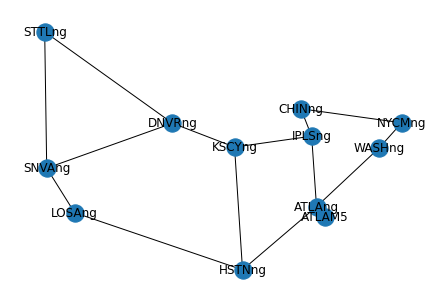

In [6]:
G1 = nx.Graph()
G1.add_nodes_from(["ATLAM5","ATLAng","CHINng","DNVRng","HSTNng","IPLSng","KSCYng","LOSAng","NYCMng","SNVAng","STTLng","WASHng"])
pos_G1 = {
    "ATLAM5":(-84.3833,33.75),
    "ATLAng":(-85.5,34.5),
    "CHINng":(-87.6167,41.8333),
    "DNVRng":(-105,40.75),
    "HSTNng":(-95.517364,29.770031),
    "IPLSng":(-86.159535,39.780622),
    "KSCYng":(-96.596704,38.961694),
    "LOSAng":(-118.25,34.05),
    "NYCMng":(-73.9667,40.7833),
    "SNVAng":(-122.02553,37.38575),
    "STTLng":(-122.3,47.6),
    "WASHng":(-77.026842,38.897303)}

G1.add_edges_from([   
("ATLAM5", "ATLAng", {"weight":82.19374785687536}),
("ATLAng","HSTNng",{"weight":670.1110851814992}),
("ATLAng","WASHng",{"weight":558.3929857708213}),
("ATLAng","IPLSng",{"weight":366.4156411369124}),
("WASHng","NYCMng",{"weight":334.76923042340974}),
("NYCMng","CHINng",{"weight":710.9221469278075}),
("CHINng","IPLSng",{"weight":160.89130458053936}),
("IPLSng","KSCYng",{"weight":559.651786633202}),
("KSCYng","HSTNng",{"weight":637.6250664518724}),
("KSCYng","DNVRng",{"weight":462.0060704352848}),
("HSTNng","LOSAng",{"weight":1361.749316056967}),
("DNVRng","SNVAng",{"weight":940.138024594023}),
("DNVRng","STTLng",{"weight":975.5180601707359}),
("STTLng", "SNVAng", {"weight":705.4106690885525}),    
("SNVAng","LOSAng",{"weight":312.74794090298946})
])

nx.draw(G1, pos=pos_G1, with_labels=True)

## atlanta

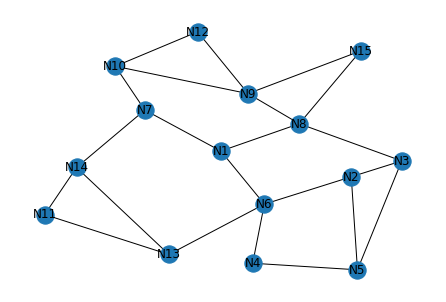

In [7]:
G2 = nx.Graph()
G2.add_nodes_from(["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10","N11","N12","N13","N14","N15"])
pos_G2 = {
    "N1":(283,248),
    "N2":(451,201),
    "N3":(516,230),
    "N4":(324,43),
    "N5":(459,31),
    "N6":(339,151),
    "N7":(185,323),
    "N8":(384,298),
    "N9":(318,353),
    "N10":(147,403),
    "N11":(56,132),
    "N12":(253,466),
    "N13":(216,59),
    "N14":(97,218),
    "N15":(463,431)}

G2.add_edges_from([   
("N1", "N6", {"weight":7280.690020532931}),
("N1", "N7", {"weight":3670.355902166243}),
("N1", "N8", {"weight":2178.253354561795}),
("N6", "N2", {"weight":8193.2623907472}),
("N4", "N6", {"weight":11855.81264408437}),
("N13", "N6", {"weight":3357.891904586295}),
("N4", "N5", {"weight":6578.900556823525}),
("N5", "N2", {"weight":11578.873392029756}),
("N5", "N3", {"weight":9252.25053993359}),
("N2", "N3", {"weight":4013.095500803072}),
("N3", "N8", {"weight":5072.1430641764482}),
("N8", "N9", {"weight":1972.1430641764482}),
("N8", "N15", {"weight":9920.533243628837}),
("N9", "N15", {"weight":7756.123926453092}),
("N9", "N12", {"weight":7143.7180907800785}),
("N9", "N10", {"weight":9883.374394517987}),
("N10", "N7", {"weight":6017.109138168367}),
("N7", "N14", {"weight":4805.830028745549}),
("N14", "N11", {"weight":6450.170705918408}),
("N14", "N13", {"weight":7548.823700269685}),
("N10", "N12", {"weight":3084.506282556644}),
("N11", "N13", {"weight":1110.7532235578933}),
("N13", "N6", {"weight":3357.891904586295})
])

nx.draw(G2, pos=pos_G2, with_labels=True)

## brain

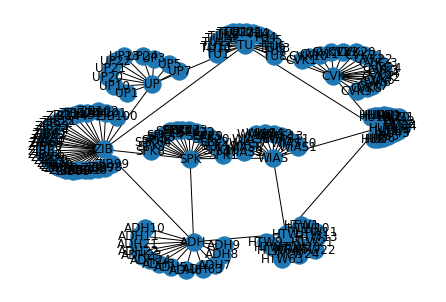

In [8]:
G3 = nx.Graph()
G3.add_nodes_from(["ADH","ADH10","ADH11","ADH21","ADH22","ADH23","ADH24","ADH3","ADH5","ADH6","ADH63","ADH7","ADH8","ADH9"
,"CVK","CVK1","CVK10","CVK11","CVK12","CVK2","CVK20","CVK21","CVK22","CVK23","CVK24","CVK3","CVK4","CVK42","CVK5","CVK6",
"CVK7","CVK8","CVK9","HTW","HTW1","HTW10","HTW11","HTW13","HTW21","HTW22","HTW23","HTW24","HTW5","HTW63","HTW64","HTW7",
"HTW9","HU","HU1","HU10","HU17","HU19","HU2","HU20","HU21","HU22","HU23","HU24","HU3","HU4","HU43","HU5","HU6","HU7","HU8"
,"HU9","SPK","SPK1","SPK10","SPK11","SPK2","SPK20","SPK21","SPK22","SPK23","SPK24","SPK3","SPK4","SPK44","SPK5","SPK6",
"SPK64","SPK7","SPK8","SPK9","TU","TU1","TU10","TU11","TU12","TU18","TU19","TU2","TU21","TU22","TU23","TU24","TU3","TU4"
,"TU5","TU6","TU63","TU7","TU8","UP","UP1","UP10","UP20","UP21","UP22","UP23","UP24","UP3","UP5","UP7","WIAS","WIAS1","WIAS10","WIAS11","WIAS13","WIAS2","WIAS4","WIAS5","WIAS6","WIAS7","WIAS8","WIAS9","ZIB","ZIB100","ZIB101","ZIB102",
"ZIB104","ZIB124","ZIB143","ZIB144","ZIB21","ZIB22","ZIB23","ZIB24","ZIB61","ZIB62","ZIB63","ZIB64","ZIB65","ZIB66",
"ZIB67","ZIB68","ZIB69","ZIB70","ZIB77","ZIB79","ZIB81","ZIB82","ZIB83","ZIB85","ZIB87","ZIB95","ZIB96","ZIB97","ZIB98",
"ZIB99"])
pos_G3 = {
    "ADH":(9.421921,48.559341),
    "ADH10":(8.23883,48.900838),
    "ADH11":(8.090515,48.705463),
    "ADH21":(8.068542,48.502048),
    "ADH22":(8.079529,48.327039),
    "ADH23":(8.167419,48.228332),
    "ADH24":(8.370666,48.118434),
    "ADH3":(8.579407,48.034019),
    "ADH5":(8.876037,47.956824),
    "ADH6":(9.2276,47.886881),
    "ADH63":(9.650574,47.905296),
    "ADH7":(9.930725,48.011975),
    "ADH8":(10.122986,48.253941),
    "ADH9":(10.1651,48.4711),
    "CVK":(12.827797,52.536273),
    "CVK1":(12.051086,52.925463),
    "CVK10":(12.221832,53.009826),
    "CVK11":(12.490997,53.059374),
    "CVK12":(12.779388,53.112163),
    "CVK2":(13.067779,53.128646),
    "CVK20":(13.378143,53.108865),
    "CVK21":(13.584137,53.044516),
    "CVK22":(13.787384,52.956912),
    "CVK23":(13.924713,52.852547),
    "CVK24":(14.007111,52.731302),
    "CVK3":(14.042816,52.681378),
    "CVK4":(14.04007,52.611387),
    "CVK42":(13.985138,52.522906),
    "CVK5":(13.932953,52.445966),
    "CVK6":(13.845062,52.40577),
    "CVK7":(13.779144,52.311837),
    "CVK8":(13.633575,52.251346),
    "CVK9":(13.391876,52.172247),
    "HTW":(11.664619,48.748493),
    "HTW1":(12.048798,48.967597),
    "HTW10":(12.221832,48.888198),
    "HTW11":(12.411346,48.796009),
    "HTW13":(12.419586,48.672826),
    "HTW21":(12.323456,48.552978),
    "HTW22":(12.375641,48.367198),
    "HTW23":(12.002106,48.429201),
    "HTW24":(11.980133,48.253941),
    "HTW5":(11.807098,48.383618),
    "HTW63":(11.584625,48.140432),
    "HTW64":(11.488495,48.361724),
    "HTW7":(11.3237,48.432845),
    "HTW9":(11.186371,48.554796),
    "HU":(13.906231,51.285541),
    "HU1":(13.754425,51.566827),
    "HU10":(13.845062,51.594135),
    "HU17":(13.91922,51.592429),
    "HU19":(14.062042,51.602666),
    "HU2":(14.191132,51.573656),
    "HU20":(14.300995,51.553167),
    "HU21":(14.419098,51.548043),
    "HU22":(14.435577,51.465986),
    "HU23":(14.46579,51.380353),
    "HU24":(14.490738,51.342623),
    "HU3":(14.443817,51.275662),
    "HU4":(14.405365,51.218927),
    "HU43":(14.300995,51.182786),
    "HU5":(14.152679,51.103522),
    "HU6":(14.037323,51.05866),
    "HU7":(13.91098,51.036213),
    "HU8":(13.803863,51.031031),
    "HU9":(14.118576,51.214626),
    "SPK":(9.334716,50.555325),
    "SPK1":(10.131683,50.651202),
    "SPK10":(10.098724,50.765997),
    "SPK11":(10.043793,50.870111),
    "SPK2":(9.931183,50.949776),
    "SPK20":(9.843292,51.024121),
    "SPK21":(9.670258,51.108696),
    "SPK22":(9.477997,51.18623),
    "SPK23":(9.313202,51.244725),
    "SPK24":(9.137421,51.251601),
    "SPK3":(9.011078,51.239566),
    "SPK4":(8.857269,51.217207),
    "SPK44":(8.7117,51.129384),
    "SPK5":(8.634796,51.084547),
    "SPK6":(8.515549,51.011163),
    "SPK64":(8.442764,50.944584),
    "SPK7":(8.402939,50.85971),
    "SPK8":(8.372726,50.750359),
    "SPK9":(9.774628,51.093173),
    "TU":(10.678711,53.291489),
    "TU1":(9.999847,53.075878),
    "TU10":(9.966888,53.206033),
    "TU11":(9.980621,53.271783),
    "TU12":(9.999847,53.357109),
    "TU18":(10.082245,53.442264),
    "TU19":(10.148163,53.491314),
    "TU2":(10.260773,53.554994),
    "TU21":(10.376129,53.589244),
    "TU22":(10.529938,53.605544),
    "TU23":(10.697479,53.594135),
    "TU24":(10.878754,53.581092),
    "TU3":(11.007843,53.540307),
    "TU4":(11.164398,53.488046),
    "TU5":(11.290741,53.399707),
    "TU6":(11.381378,53.265213),
    "TU63":(11.389618,53.22248),
    "TU7":(11.400604,53.135238),
    "TU8":(11.389618,53.026348),
    "UP":(8.411379,52.348973),
    "UP1":(7.793884,52.133488),
    "UP10":(7.486267,52.291683),
    "UP20":(7.326965,52.526248),
    "UP21":(7.398376,52.722986),
    "UP22":(7.50824,52.908902),
    "UP23":(7.733459,53.021392),
    "UP24":(8.178406,53.018088),
    "UP3":(8.458557,52.961875),
    "UP5":(8.826599,52.829321),
    "UP7":(9.073791,52.66972),
    "WIAS":(11.360021,50.569174),
    "WIAS1":(11.963654,50.835432),
    "WIAS10":(11.86203,50.937662),
    "WIAS11":(11.694488,51.029304),
    "WIAS13":(11.554413,51.100073),
    "WIAS2":(11.370392,51.141448),
    "WIAS4":(11.169891,51.163844),
    "WIAS5":(10.936432,51.139725),
    "WIAS6":(10.812836,51.034486),
    "WIAS7":(10.749664,50.942854),
    "WIAS8":(10.659027,50.830228),
    "WIAS9":(10.653534,50.726024),
    "ZIB":(7.228804,50.77783),
    "ZIB100":(7.556762,51.570241),
    "ZIB101":(7.282104,51.658927),
    "ZIB102":(7.095337,51.69299),
    "ZIB104":(6.820678,51.652111),
    "ZIB124":(6.655884,51.645294),
    "ZIB143":(6.513061,51.597548),
    "ZIB144":(6.33728,51.57707),
    "ZIB21":(6.150512,51.467697),
    "ZIB22":(6.062622,51.412912),
    "ZIB23":(5.974731,51.330612),
    "ZIB24":(5.963745,51.241286),
    "ZIB61":(5.930786,51.165567),
    "ZIB62":(5.90744,51.125937),
    "ZIB63":(5.877228,51.036213),
    "ZIB64":(5.843811,50.961887),
    "ZIB65":(5.827789,50.927276),
    "ZIB66":(5.794372,50.861444),
    "ZIB67":(5.80307,50.743408),
    "ZIB68":(5.806274,50.659908),
    "ZIB69":(5.885467,50.583237),
    "ZIB70":(5.940399,50.523905),
    "ZIB77":(6.01181,50.459253),
    "ZIB79":(6.061249,50.408518),
    "ZIB81":(6.118927,50.357728),
    "ZIB82":(6.198578,50.322669),
    "ZIB83":(6.319427,50.287584),
    "ZIB85":(6.481476,50.270032),
    "ZIB87":(6.613312,50.273543),
    "ZIB95":(6.76712,50.277054),
    "ZIB96":(6.890716,50.291094),
    "ZIB97":(7.082977,50.319162),
    "ZIB98":(7.261505,50.343708),
    "ZIB99":(7.440491,50.436516)}

G3.add_edges_from([   
("TU", "TU1", {"weight":31.790607639051633}),
("TU", "TU10", {"weight":29.99445150163307}),
("TU", "TU11", {"weight":28.850932288879587}),
("TU", "TU12", {"weight":28.361407984695745}),
("TU", "TU18", {"weight":26.68863800347531}),
("TU", "TU19", {"weight":25.83829693920701}),
("TU", "TU2", {"weight":25.034957703634255}),
("TU", "TU21", {"weight":24.032516897593137}),
("TU", "TU22", {"weight":22.531299757200646}),
("TU", "TU23", {"weight":20.911350948134395}),
("TU", "TU24", {"weight":21.623262024319263}),
("TU", "TU3", {"weight":21.877431739666754}),
("TU", "TU4", {"weight":24.169753087706756}),
("TU", "TU5", {"weight":26.311558707856125}),
("TU", "TU6", {"weight":29.066684497891828}),
("TU", "TU63", {"weight":29.748939802321427}),
("TU", "TU7", {"weight":31.738953908163722}),
("TU", "TU8", {"weight":34.66128300058061}),
("TU", "UP", {"weight":114.82198810785549}),
("TU", "CVK", {"weight":103.56071884455433}),
("TU", "HU", {"weight":194.29819000319392}),
("TU", "ZIB", {"weight":227.10009745178363}),
("UP", "UP1", {"weight":30.050042855185115}),
("UP", "UP10", {"weight":39.24426106309302}),
("UP", "UP20", {"weight":47.25883357303723}),
("UP", "UP21", {"weight":49.76917546650074}),
("UP", "UP22", {"weight":54.1049916878856}),
("UP", "UP23", {"weight":54.41293140606637}),
("UP", "UP24", {"weight":47.218938267685}),
("UP", "UP3", {"weight":42.36576377829308}),
("UP", "UP5", {"weight":37.46230227612949}),
("UP", "UP7", {"weight":35.572591536720694}),
("UP", "ZIB", {"weight":119.76837962236507}),
("CVK", "CVK1", {"weight":42.15242117139528}),
("CVK", "CVK10", {"weight":41.35031366535136}),
("CVK", "CVK11", {"weight":38.759349558193115}),
("CVK", "CVK12", {"weight":39.81531315040737}),
("CVK", "CVK2", {"weight":42.109381080213936}),
("CVK", "CVK20", {"weight":45.72080380018624}),
("CVK", "CVK21", {"weight":47.21086825472196}),
("CVK", "CVK22", {"weight":49.51958023254739}),
("CVK", "CVK23", {"weight":44.17136886250168}),
("CVK", "CVK24", {"weight":51.22120734876491}),
("CVK", "CVK3", {"weight":51.92050521120268}),
("CVK", "CVK4", {"weight":51.133866977469765}),
("CVK", "CVK42", {"weight":48.622884596553334}),
("CVK", "CVK5", {"weight":46.879311762269175}),
("CVK", "CVK6", {"weight":43.725800044153786}),
("CVK", "CVK7", {"weight":42.95042375045371}),
("CVK", "CVK8", {"weight":39.2395061100467}),
("CVK", "CVK9", {"weight":34.60748792539444}),
("CVK", "HU", {"weight":97.81458732029957}),
("HU", "HU1", {"weight":20.492391386548093}),
("HU", "HU10", {"weight":21.469825275898163}),
("HU", "HU17", {"weight":21.19737608805913}),
("HU", "HU19", {"weight":22.90054387613909}),
("HU", "HU2", {"weight":23.370667346716008}),
("HU", "HU20", {"weight":25.108037814268695}),
("HU", "HU21", {"weight":28.570335148506423}),
("HU", "HU22", {"weight":25.99534394766239}),
("HU", "HU23", {"weight":25.011679458553935}),
("HU", "HU24", {"weight":25.532426012988957}),
("HU", "HU3", {"weight":23.228303512387615}),
("HU", "HU4", {"weight":22.055579390813048}),
("HU", "HU43", {"weight":18.483066085089963}),
("HU", "HU5", {"weight":16.482612708291526}),
("HU", "HU6", {"weight":16.66197647724397}),
("HU", "HU7", {"weight":17.216827909473572}),
("HU", "HU8", {"weight":18.123913588503193}),
("HU", "HU9", {"weight":10.401840740549304}),
("HU", "WIAS", {"weight":121.34407278610779}),
("HU", "HTW", {"weight":201.41833770884776}),
("ZIB", "ZIB100", {"weight":56.52619805865061}),
("ZIB", "ZIB101", {"weight":60.88163592928679}),
("ZIB", "ZIB102", {"weight":63.452834121338924}),
("ZIB", "ZIB104", {"weight":62.894995048106104}),
("ZIB", "ZIB124", {"weight":64.82026586069131}),
("ZIB", "ZIB143", {"weight":64.52072947879583}),
("ZIB", "ZIB144", {"weight":67.33960318609104}),
("ZIB", "ZIB21", {"weight":66.72793309871162}),
("ZIB", "ZIB22", {"weight":66.93333661775324}),
("ZIB", "ZIB23", {"weight":66.47743981259441}),
("ZIB", "ZIB24", {"weight":63.59595909454099}),
("ZIB", "ZIB61", {"weight":62.464515329095825}),
("ZIB", "ZIB62", {"weight":62.2993902509681}),
("ZIB", "ZIB63", {"weight":61.491964131789594}),
("ZIB", "ZIB64", {"weight":61.67377712684105}),
("ZIB", "ZIB65", {"weight":61.93664365435478}),
("ZIB", "ZIB66", {"weight":62.83759043747613}),
("ZIB", "ZIB67", {"weight":62.31633772439054}),
("ZIB", "ZIB68", {"weight":62.7172058646612}),
("ZIB", "ZIB69", {"weight":60.28879997073028}),
("ZIB", "ZIB70", {"weight":59.06692703730054}),
("ZIB", "ZIB77", {"weight":57.67466812850943}),
("ZIB", "ZIB79", {"weight":57.177942034533224}),
("ZIB", "ZIB81", {"weight":56.66253454223076}),
("ZIB", "ZIB82", {"weight":55.05090069533374}),
("ZIB", "ZIB83", {"weight":52.333168436200225}),
("ZIB", "ZIB85", {"weight":48.01622758258022}),
("ZIB", "ZIB87", {"weight":44.07218241546202}),
("ZIB", "ZIB95", {"weight":40.07839593955756}),
("ZIB", "ZIB96", {"weight":36.73778944035219}),
("ZIB", "ZIB97", {"weight":32.309915646664344}),
("ZIB", "ZIB98", {"weight":30.009554258140376}),
("ZIB", "ZIB99", {"weight":25.326894699852947}),
("ZIB", "ADH", {"weight":181.83308805972018}),
("ZIB", "SPK", {"weight":93.43328095061513}),
("SPK", "SPK1", {"weight":35.547834108710795}),
("SPK", "SPK10", {"weight":36.46748344961006}),
("SPK", "SPK11", {"weight":37.86208004871578}),
("SPK", "SPK2", {"weight":37.69248034655431}),
("SPK", "SPK20", {"weight":39.25012719688304}),
("SPK", "SPK21", {"weight":40.91526862841543}),
("SPK", "SPK22", {"weight":44.007824830979594}),
("SPK", "SPK23", {"weight":47.61090910931887}),
("SPK", "SPK24", {"weight":48.83795455942981}),
("SPK", "SPK3", {"weight":49.302818513314236}),
("SPK", "SPK4", {"weight":50.21100927374772}),
("SPK", "SPK44", {"weight":48.051902587000214}),
("SPK", "SPK5", {"weight":47.6176457430011}),
("SPK", "SPK6", {"weight":47.639225365738056}),
("SPK", "SPK64", {"weight":47.33669110494719}),
("SPK", "SPK7", {"weight":45.84442935428193}),
("SPK", "SPK8", {"weight":44.214003160800296}),
("SPK", "SPK9", {"weight":41.80122899629564}),
("SPK", "ADH", {"weight":137.87401329835896}),
("SPK", "WIAS", {"weight":88.83635006926718}),
("WIAS", "WIAS1", {"weight":32.16870920888246}),
("WIAS", "WIAS10", {"weight":33.58965100150712}),
("WIAS", "WIAS11", {"weight":34.96356801261265}),
("WIAS", "WIAS13", {"weight":37.62486986081707}),
("WIAS", "WIAS2", {"weight":39.51696079152413}),
("WIAS", "WIAS4", {"weight":41.88834773232499}),
("WIAS", "WIAS5", {"weight":43.50749131700236}),
("WIAS", "WIAS6", {"weight":40.030271769468406}),
("WIAS", "WIAS7", {"weight":37.10176400917253}),
("WIAS", "WIAS8", {"weight":35.56347265017677}),
("WIAS", "WIAS9", {"weight":32.77282191979133}),
("WIAS", "HTW", {"weight":126.44914332654014}),
("HTW", "HTW1", {"weight":23.096996009239394}),
("HTW", "HTW10", {"weight":27.10776327208146}),
("HTW", "HTW11", {"weight":34.138696000931155}),
("HTW", "HTW13", {"weight":34.79228456853748}),
("HTW", "HTW21", {"weight":32.94641702866142}),
("HTW", "HTW22", {"weight":41.820764595608594}),
("HTW", "HTW23", {"weight":26.900363395283915}),
("HTW", "HTW24", {"weight":37.07348835545252}),
("HTW", "HTW5", {"weight":26.021436080240996}),
("HTW", "HTW63", {"weight":42.14495609130535}),
("HTW", "HTW64", {"weight":27.892319897077872}),
("HTW", "HTW7", {"weight":26.785029895561152}),
("HTW", "HTW9", {"weight":25.588840328500513}),
("HTW", "ADH", {"weight":103.12380253148417}),
("ADH", "ADH10", {"weight":58.81594948804388}),
("ADH", "ADH11", {"weight":61.58721552575824}),
("ADH", "ADH21", {"weight":62.0085881186882}),
("ADH", "ADH22", {"weight":63.54348971031401}),
("ADH", "ADH23", {"weight":61.890558072485774}),
("ADH", "ADH24", {"weight":57.05105931142623}),
("ADH", "ADH3", {"weight":53.04182694792649}),
("ADH", "ADH5", {"weight":48.58480495229411}),
("ADH", "ADH6", {"weight":47.284630353828796}),
("ADH", "ADH63", {"weight":46.36877903194121}),
("ADH", "ADH7", {"weight":44.43991358503713}),
("ADH", "ADH8", {"weight":38.43545459056702}),
("ADH", "ADH9", {"weight":34.53374065482233})
])

nx.draw(G3, pos=pos_G3, with_labels=True)

## cost266

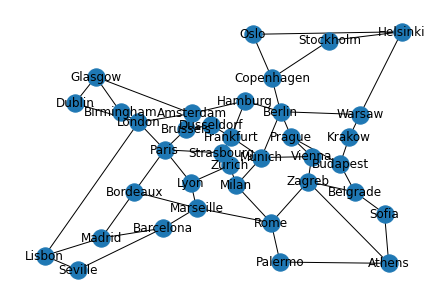

In [9]:
G4 = nx.Graph()
G4.add_nodes_from(["Amsterdam","Athens","Barcelona","Belgrade","Berlin","Birmingham","Bordeaux","Brussels","Budapest",
"Copenhagen","Dublin","Dusseldorf","Frankfurt","Glasgow","Hamburg","Helsinki","Krakow","Lisbon","London","Lyon","Madrid",
"Marseille","Milan","Munich","Oslo","Palermo","Paris","Prague","Rome","Seville","Sofia","Stockholm","Strasbourg",
"Vienna","Warsaw","Zagreb","Zurich"])
pos_G4 = {
    "Amsterdam":(4.9,52.35),
    "Athens":(23.73,38),
    "Barcelona":(2.18,41.37),
    "Belgrade":(20.5,44.83),
    "Berlin":(13.4,52.52),
    "Birmingham":(-1.88,52.47),
    "Bordeaux":(-0.57,44.85),
    "Brussels":(4.35,50.83),
    "Budapest":(19.08,47.5),
    "Copenhagen":(12.57,55.72),
    "Dublin":(-6.25,53.33),
    "Dusseldorf":(6.78,51.23),
    "Frankfurt":(8.67,50.1),
    "Glasgow":(-4.25,55.85),
    "Hamburg":(10.02,53.55),
    "Helsinki":(24.97,60.17),
    "Krakow":(19.95,50.05),
    "Lisbon":(-9.13,38.73),
    "London":(-0.17,51.5),
    "Lyon":(4.83,45.73),
    "Madrid":(-3.72,40.42),
    "Marseille":(5.37,43.3),
    "Milan":(9.17,45.47),
    "Munich":(11.57,48.13),
    "Oslo":(10.75,59.93),
    "Palermo":(13.35,38.12),
    "Paris":(2.33,48.87),
    "Prague":(14.43,50.08),
    "Rome":(12.5,41.88),
    "Seville":(-5.98,37.38),
    "Sofia":(23.33,42.75),
    "Stockholm":(18.05,59.33),
    "Strasbourg":(7.77,48.58),
    "Vienna":(16.37,48.22),
    "Warsaw":(21,52.25),
    "Zagreb":(16.02,45.83),
    "Zurich":(8.55,47.38)}

G4.add_edges_from([   
("Amsterdam", "Brussels", {"weight":107.57144910890806}),
("Amsterdam", "Glasgow", {"weight":441.7787479471865}),
("Amsterdam", "Hamburg", {"weight":228.48680001281784}),
("Amsterdam", "London", {"weight":223.66981045172517}),
("Athens", "Palermo", {"weight":564.0860025789386}),
("Athens", "Sofia", {"weight":328.6510044191054}),
("Athens", "Zagreb", {"weight":669.5447934885182}),
("Barcelona", "Madrid", {"weight":314.78577743128767}),
("Barcelona", "Marseille", {"weight":210.37671360847082}),
("Barcelona", "Seville", {"weight":515.0088735108843}),
("Belgrade", "Budapest", {"weight":196.45753096073963}),
("Belgrade", "Sofia", {"weight":201.2818132105919}),
("Belgrade", "Zagreb", {"weight":228.13049586489177}),
("Berlin", "Copenhagen", {"weight":223.48759678522768}),
("Berlin", "Hamburg", {"weight":157.30873745914843}),
("Berlin", "Munich", {"weight":313.64400827174796}),
("Berlin", "Prague", {"weight":174.24154956324074}),
("Berlin", "Warsaw", {"weight":320.68469648854204}),
("Birmingham", "Glasgow", {"weight":252.24866590647383}),
("Birmingham", "London", {"weight":98.8564651911655}),
("Bordeaux", "Madrid", {"weight":345.1374724767738}),
("Bordeaux", "Marseille", {"weight":313.4026303799953}),
("Bordeaux", "Paris", {"weight":309.4475604223132}),
("Brussels", "Dusseldorf", {"weight":109.07207764809186}),
("Brussels", "Paris", {"weight":162.4768894254352}),
("Budapest", "Krakow", {"weight":180.46451438482939}),
("Budapest", "Prague", {"weight":276.45795384946234}),
("Copenhagen", "Oslo", {"weight":298.2657236360003}),
("Copenhagen", "Stockholm", {"weight":321.3586001900576}),
("Dublin", "Glasgow", {"weight":191.49755228304716}),
("Dublin", "London", {"weight":285.4121896640874}),
("Dusseldorf", "Frankfurt", {"weight":113.7036546779566}),
("Frankfurt", "Hamburg", {"weight":245.07130719370676}),
("Frankfurt", "Munich", {"weight":188.86553928920756}),
("Frankfurt", "Strasbourg", {"weight":112.4904633639635}),
("Helsinki", "Oslo", {"weight":489.5206230231299}),
("Helsinki", "Stockholm", {"weight":247.4717678897263}),
("Helsinki", "Warsaw", {"weight":567.4557495006908}),
("Krakow", "Warsaw", {"weight":137.78442238623214}),
("Lisbon", "London", {"weight":982.1906594152266}),
("Lisbon", "Madrid", {"weight":269.9043569149821}),
("Lisbon", "Seville", {"weight":194.97159897095003}),
("London", "Paris", {"weight":212.55969669148408}),
("Lyon", "Marseille", {"weight":169.8788633040413}),
("Lyon", "Paris", {"weight":246.36184598488023}),
("Lyon", "Zurich", {"weight":210.1503472133356}),
("Marseille", "Rome", {"weight":375.3403291731359}),
("Milan", "Munich", {"weight":215.85004711458902}),
("Milan", "Rome", {"weight":298.43618937467863}),
("Milan", "Zurich", {"weight":135.14141243651642}),
("Munich", "Vienna", {"weight":389.2299017363454}),
("Palermo", "Rome", {"weight":263.48035993474053}),
("Paris", "Strasbourg", {"weight":248.54146516456154}),
("Prague", "Vienna", {"weight":155.45699370796675}),
("Rome", "Zagreb", {"weight":324.1187674466809}),
("Strasbourg", "Zurich", {"weight":90.35965783785271}),
("Vienna", "Zagreb", {"weight":165.84443070902032})
])
nx.draw(G4, pos = pos_G4, with_labels = True)

## dfn-bwin

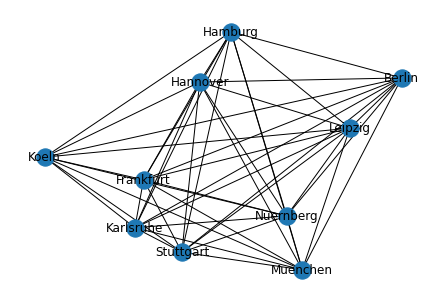

In [10]:
G5 = nx.Graph()
G5.add_nodes_from(["Frankfurt","Koeln","Hamburg","Hannover","Karlsruhe","Stuttgart","Muenchen","Nuernberg","Berlin",
"Leipzig"])
pos_G5 = {
    "Frankfurt":(8.4,50.07),
    "Koeln":(6.57,50.57),
    "Hamburg":(10.02,53.34),
    "Hannover":(9.44,52.23),
    "Karlsruhe":(8.24,49.01),
    "Stuttgart":(9.11,48.47),
    "Muenchen":(11.34,48.08),
    "Nuernberg":(11.05,49.27),
    "Berlin":(13.18,52.32),
    "Leipzig":(12.22,51.21)}

G5.add_edges_from([   
("Leipzig", "Berlin", {"weight":86.92987699155715}),
("Leipzig", "Koeln", {"weight":249.9629269026716}),
("Leipzig", "Muenchen", {"weight":219.6678711870004}),
("Hamburg", "Karlsruhe", {"weight":308.7215235656935}),
("Hamburg", "Berlin", {"weight":149.44253577934137}),
("Hamburg", "Nuernberg", {"weight":284.51252327250796}),
("Hamburg", "Stuttgart", {"weight":338.58244087552174}),
("Hamburg", "Muenchen", {"weight":367.73225541159815}),
("Hannover", "Frankfurt", {"weight":155.79319936487516}),
("Hannover", "Karlsruhe", {"weight":228.45617296646344}),
("Hannover", "Koeln", {"weight":305.2088580581927}),
("Stuttgart", "Karlsruhe", {"weight":54.402105064920775}),
("Stuttgart", "Nuernberg", {"weight":103.98876772823206}),
("Stuttgart", "Koeln", {"weight":184.33532144463925}),
("Muenchen", "Karlsruhe", {"weight":155.56197050136092}),
("Muenchen", "Berlin", {"weight":303.82200091110747}),
("Muenchen", "Nuernberg", {"weight":83.22401180741088}),
("Koeln", "Nuernberg", {"weight":218.4129070010079}),
("Nuernberg", "Frankfurt", {"weight":130.660422741812}),
("Berlin", "Karlsruhe", {"weight":314.4694632976506}),
("Leipzig", "Karlsruhe", {"weight":232.61237624773526}),
("Leipzig", "Nuernberg", {"weight":143.5676618603299}),
("Leipzig", "Stuttgart", {"weight":234.41686231591245}),
("Leipzig", "Hannover", {"weight":138.1933485892522}),
("Leipzig", "Hamburg", {"weight":173.96179838311366}),
("Leipzig", "Frankfurt", {"weight":184.84084659459535}),
("Hamburg", "Frankfurt", {"weight":236.17187837044693}),
("Hamburg", "Koeln", {"weight":241.05014893307583}),
("Hamburg", "Hannover", {"weight":80.37875226734901}),
("Hannover", "Berlin", {"weight":158.11410524949025}),
("Hannover", "Nuernberg", {"weight":216.13182184021676}),
("Hannover", "Muenchen", {"weight":298.59513460225565}),
("Hannover", "Stuttgart", {"weight":260.0265074777188}),
("Stuttgart", "Frankfurt", {"weight":115.01309112689407}),
("Stuttgart", "Berlin", {"weight":320.4532310780773}),
("Stuttgart", "Muenchen", {"weight":105.95492865365058}),
("Muenchen", "Frankfurt", {"weight":191.18808587071757}),
("Muenchen", "Koeln", {"weight":274.93454206506027}),
("Koeln", "Frankfurt", {"weight":87.75260634225423}),
("Koeln", "Karlsruhe", {"weight":130.9285185490055}),
("Koeln", "Berlin", {"weight":308.916071395308}),
("Nuernberg", "Karlsruhe", {"weight":128.28896029922166}),
("Nuernberg", "Berlin", {"weight":230.17665173379254}),
("Berlin", "Frankfurt", {"weight":258.5919499256294}),
("Karlsruhe", "Frankfurt", {"weight":314.4694632976506})
])

nx.draw(G5, pos = pos_G5, with_labels = True)

## dfn-gwin

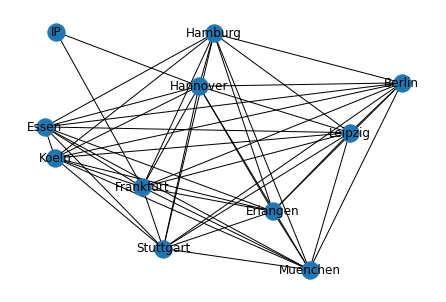

In [12]:
G6 = nx.Graph()
G6.add_nodes_from(["Leipzig","Hamburg","Hannover","Stuttgart","Muenchen","Koeln","Erlangen","Berlin","Essen",
"Frankfurt","IP"])
pos_G6 = {
 "Leipzig":(12.3797,51.3384),
  "Hamburg":(9.98792, 53.5624 ),
  "Hannover":(9.72435, 52.3798 ),
  "Stuttgart":(9.09565, 48.7424 ),
  "Muenchen":(11.6718, 48.2651 ),
  "Koeln":(7.19069, 50.7725 ),
  "Erlangen":(11.0262, 49.5737 ),
 "Berlin":(13.2944, 52.4558 ),
  "Essen":(7.00796,51.4674 ),
  "Frankfurt":(8.72819, 50.1172 ),
  "IP":(7.21, 53.60 )}


G6.add_edges_from([   
("Leipzig", "Berlin", {"weight":86.4372516678839}),
("Leipzig", "Koeln", {"weight":228.5237608418393}),
("Leipzig", "Muenchen", {"weight":214.53460581292669}),
("Hamburg", "Essen", {"weight":191.28907743969506}),
("Hamburg", "Berlin", {"weight":157.16695732094547}),
("Hamburg", "Erlangen", {"weight":278.9852347547564}),
("Hamburg", "Stuttgart", {"weight":338.58244087552174}),
("Hamburg", "Muenchen", {"weight":367.73225541159815}),
("Hannover", "Frankfurt", {"weight":155.79319936487516}),
("Hannover", "Essen", {"weight":131.70247771530157}),
("Hannover", "Koeln", {"weight":305.2088580581927}),
("Stuttgart", "Essen", {"weight":209.6226061147001}),
("Stuttgart", "Erlangen", {"weight":104.37027636411628}),
("Stuttgart", "Koeln", {"weight":184.33532144463925}),
("Muenchen", "Essen", {"weight":303.15694364042133}),
("Muenchen", "Berlin", {"weight":303.82200091110747}),
("Muenchen", "Erlangen", {"weight":94.98482790816158}),
("Koeln", "Erlangen", {"weight":188.70660440121398}),
("Erlangen", "Frankfurt", {"weight":108.97973404178128}),
("Berlin", "Essen", {"weight":275.93702628587386}),
("IP", "Frankfurt", {"weight":249.02739151270475}),
("IP", "Hannover", {"weight":134.22468792220985}),
("Leipzig", "Essen", {"weight":231.50655897190921}),
("Leipzig", "Erlangen", {"weight":135.59472825770553}),
("Leipzig", "Stuttgart", {"weight":234.41686231591245}),
("Leipzig", "Hannover", {"weight":138.1933485892522}),
("Leipzig", "Hamburg", {"weight":173.96179838311366}),
("Leipzig", "Frankfurt", {"weight":184.84084659459535}),
("Hamburg", "Frankfurt", {"weight":236.17187837044693}),
("Hamburg", "Koeln", {"weight":241.05014893307583}),
("Hamburg", "Hannover", {"weight":80.37875226734901}),
("Hannover", "Berlin", {"weight":158.11410524949025}),
("Hannover", "Erlangen", {"weight":201.84379943238463}),
("Hannover", "Muenchen", {"weight":298.59513460225565}),
("Hannover", "Stuttgart", {"weight":260.0265074777188}),
("Stuttgart", "Frankfurt", {"weight":115.01309112689407}),
("Stuttgart", "Berlin", {"weight":320.4532310780773}),
("Stuttgart", "Muenchen", {"weight":105.95492865365058}),
("Muenchen", "Frankfurt", {"weight":191.18808587071757}),
("Muenchen", "Koeln", {"weight":274.93454206506027}),
("Koeln", "Frankfurt", {"weight":87.75260634225423}),
("Koeln", "Essen", {"weight":48.63061801876281}),
("Koeln", "Berlin", {"weight":308.916071395308}),
("Erlangen", "Essen", {"weight":219.52814064799298}),
("Erlangen", "Berlin", {"weight":222.03188264951848}),
("Berlin", "Frankfurt", {"weight":258.5919499256294}),
("Essen", "Frankfurt", {"weight":119.69738167571737})
])

nx.draw(G6, pos = pos_G6, with_labels = True)

## di-yuan

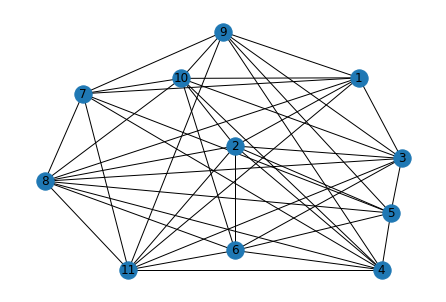

In [13]:

G7 = nx.Graph()
G7.add_nodes_from(["1","2","3","4","5","6","7","8","9","10","11"])
pos_G7 = {
    "1":(359,375),
    "2":(223,255),
    "3":(406,233),
    "4":(384,37),
    "5":(394,137),
    "6":(223,71),
    "7":(56,347),
    "8":(14,193),
    "9":(210,456),
    "10":(164,374),
    "11":(106,37)}
    
G7.add_edges_from([   
("7", "8", {"weight":9039.407583569811}),
("1", "3", {"weight":8775.731240917978}),
("1", "7", {"weight":4348.312713240035}),
("1", "9", {"weight":4825.246485431925}),
("2", "3", {"weight":3589.4241964868106}),
("2", "4", {"weight":7781.546534739762}),
("2", "5", {"weight":10201.766538641537}),
("2", "6", {"weight":12152.447997225236}),
("2", "8", {"weight":6227.297810246906}),
("4", "8", {"weight":11706.966937356898}),
("4", "9", {"weight":3247.729051227039}),
("6", "8", {"weight":5957.960173208638}),
("3", "6", {"weight":8563.233501986528}),
("3", "8", {"weight":3272.524154286856}),
("3", "9", {"weight":10269.506487544035}),
("5", "6", {"weight":1957.9038240894636}),
("5", "8", {"weight":4068.387105539002}),
("5", "9", {"weight":3658.6214412557315}),
("10", "9", {"weight":5537.920893250912}),
("8", "10", {"weight":2772.3735074130495}),
("4", "10", {"weight":8052.174631950734}),
("1", "11", {"weight":6490.609146297522}),
("2", "11", {"weight":8228.746301788557}),
("11", "7", {"weight":4736.947326787196}),
("11", "8", {"weight":5772.754063894756}),
("11", "4", {"weight":4363.518971296981}),
("7", "4", {"weight":4029.811688564025}),
("7", "10", {"weight":7614.467441971476}),
("1", "10", {"weight":8845.459257874203}),
("2", "10", {"weight":7684.063311715794}),
("3", "10", {"weight":5893.777173557922}),
("1", "2", {"weight":6492.132361122586}),
("11", "3", {"weight":9399.688027157757}),
("3", "5", {"weight":6666.88841701441}),
("6", "10", {"weight":4623.165337579898}),
("7", "9", {"weight":6738.768373730354}),
("1", "8", {"weight":11414.46898620408}),
("11", "6", {"weight":4363.356933366557}),
("11", "9", {"weight":3575.148234225802}),
("4", "5", {"weight":6869.181005194643}),
("5", "7", {"weight":9977.575209694083}),
("4", "6", {"weight":4912.384589335402})
])
nx.draw(G7, pos = pos_G7, with_labels = True)

## france

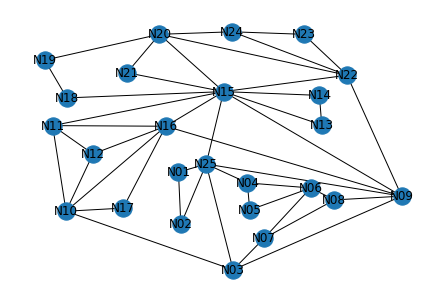

In [14]:
G8 = nx.Graph()
G8.add_nodes_from(["N01","N02","N03","N04","N05","N06","N07","N08","N09","N10","N11","N12","N13","N14","N15","N16",
"N17","N18","N19","N20","N21","N22","N23","N24","N25"])
pos_G8={"N01":(200,175),
"N02":(203,92),
"N03":(269,20),
"N04":(287,158),
"N05":(290,115),
"N06":(367,150),
"N07":(308,70),
"N08":(397,131),
"N09":(482,137),
"N10":(58,113),
"N11":(41,249),
"N12":(92,204),
"N13":(381,250),
"N14":(378,297),
"N15":(257,303),
"N16":(184,248),
"N17":(130,118),
"N18":(59,293),
"N19":(31,353),
"N20":(176,394),
"N21":(135,333),
"N22":(413,329),
"N23":(358,394),
"N24":(268,398),
"N25":(235,188)}

G8.add_edges_from([   
("N01", "N02", {"weight":5731.173911021715}),
("N03", "N07", {"weight":3809.280512688929}),
("N03", "N09", {"weight":2481.588502001054}),
("N03", "N10", {"weight":3520.2541387045394}),
("N04", "N05", {"weight":2972.1777895818705}),
("N04", "N06", {"weight":4897.51776917807}),
("N05", "N06", {"weight":3978.763459056407}),
("N06", "N07", {"weight":4936.980649942927}),
("N06", "N08", {"weight":2044.5885070903282}),
("N08", "N07", {"weight":3117.3732300284605}),
("N08", "N09", {"weight":3879.3864073639743}),
("N10", "N12", {"weight":6525.10925468547}),
("N11", "N10", {"weight":9425.534099983684}),
("N11", "N12", {"weight":3738.5272577134315}),
("N13", "N14", {"weight":3244.10474384836}),
("N15", "N09", {"weight":7379.628332913076}),
("N15", "N11", {"weight":1367.26082744443}),
("N15", "N13", {"weight":1853.3641300730808}),
("N15", "N14", {"weight":3569.1105124321143}),
("N15", "N16", {"weight":2177.7269424801357}),
("N15", "N18", {"weight":3816.7714315731337}),
("N15", "N20", {"weight":7835.202297153847}),
("N15", "N21", {"weight":5724.121466152431}),
("N15", "N22", {"weight":6192.713220960869}),
("N15", "N25", {"weight":7770.736328354574}),
("N16", "N09", {"weight":8302.760065345128}),
("N16", "N10", {"weight":11045.588038345055}),
("N16", "N11", {"weight":2808.724762095564}),
("N16", "N12", {"weight":4735.419884341715}),
("N17", "N10", {"weight":2044.2387459962065}),
("N17", "N16", {"weight":9367.491326597798}),
("N18", "N19", {"weight":4347.295563612158}),
("N20", "N19", {"weight":9523.008710759388}),
("N20", "N21", {"weight":4993.889720737858}),
("N20", "N24", {"weight":4919.5256430495165}),
("N22", "N09", {"weight":8642.29734756992}),
("N22", "N20", {"weight":9145.904091368686}),
("N22", "N23", {"weight":5740.06196660412}),
("N22", "N24", {"weight":10392.008653781959}),
("N24", "N23", {"weight":4823.868969640682}),
("N25", "N01", {"weight":2572.289033001254}),
("N25", "N02", {"weight":6649.5038491896485}),
("N25", "N03", {"weight":10011.317793727654}),
("N25", "N04", {"weight":9510.862856611822}),
("N25", "N09", {"weight":7747.4277658034})
])

nx.draw(G8, pos = pos_G8, with_labels = True)

## geant

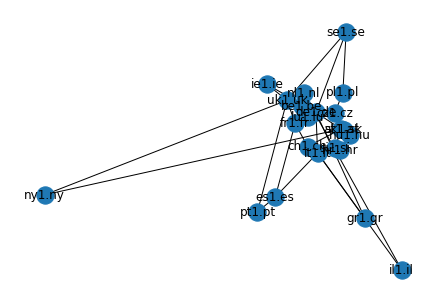

In [15]:
G9 = nx.Graph()
G9.add_nodes_from(["at1.at","be1.be","ch1.ch","cz1.cz","de1.de","es1.es","fr1.fr","gr1.gr","hr1.hr","hu1.hu","ie1.ie",
"il1.il","it1.it","lu1.lu","nl1.nl","ny1.ny","pl1.pl","pt1.pt","se1.se","si1.si","sk1.sk","uk1.uk"])
pos_G9 = {"at1.at":(16.3729,48.2091),
"be1.be":(4.3518,50.8469),
"ch1.ch":(6.1399,46.2038),
"cz1.cz":(14.4423,50.0785),
"de1.de":(8.6842,50.1122),
"es1.es":(-3.7033,40.4167),
"fr1.fr":(2.351,48.8566),
"gr1.gr":(23.5808,37.9778),
"hr1.hr":(15.9644,45.8071),
"hu1.hu":(19.0936,47.4976),
"ie1.ie":(-6.2573,53.3416),
"il1.il":(34.8097,32.0714),
"it1.it":(9.19,45.4642),
"lu1.lu":(6.1296,49.6112),
"nl1.nl":(4.9407,52.3236),
"ny1.ny":(-73.94384,40.6698),
"pl1.pl":(16.8874,52.3963),
"pt1.pt":(-9.1363,38.7073),
"se1.se":(17.8742,59.3617),
"si1.si":(14.5148,46.0574),
"sk1.sk":(17.1297,48.1531),
"uk1.uk":(-0.1264,51.5086)}

G9.add_edges_from([   
("at1.at", "ch1.ch", {"weight":499.14779799102683}),
("at1.at", "de1.de", {"weight":370.99218226626726}),
("at1.at", "hu1.hu", {"weight":135.28420625710538}),
("at1.at", "ny1.ny", {"weight":4219.654755266898}),
("at1.at", "si1.si", {"weight":172.29844524352126}),
("be1.be", "fr1.fr", {"weight":163.75521380188542}),
("be1.be", "lu1.lu", {"weight":115.95263342001685}),
("be1.be", "nl1.nl", {"weight":105.04585019238763}),
("ch1.ch", "fr1.fr", {"weight":254.40645987197385}),
("ch1.ch", "it1.it", {"weight":155.35577271175868}),
("cz1.cz", "de1.de", {"weight":255.00310421597163}),
("cz1.cz", "pl1.pl", {"weight":191.7710559873965}),
("cz1.cz", "sk1.sk", {"weight":180.04762105232155}),
("de1.de", "fr1.fr", {"weight":296.9172949080965}),
("de1.de", "gr1.gr", {"weight":1113.253875504818}),
("de1.de", "ie1.ie", {"weight":675.2996970101077}),
("de1.de", "it1.it", {"weight":321.7895791595454}),
("de1.de", "nl1.nl", {"weight":222.49361030228633}),
("de1.de", "se1.se", {"weight":734.7521999956001}),
("es1.es", "fr1.fr", {"weight":653.7762984367131}),
("es1.es", "it1.it", {"weight":737.8258870783227}),
("es1.es", "pt1.pt", {"weight":312.29420780888375}),
("fr1.fr", "lu1.lu", {"weight":178.13034341994899}),
("fr1.fr", "uk1.uk", {"weight":213.34718474984697}),
("gr1.gr", "it1.it", {"weight":901.8480612479924}),
("hr1.hr", "hu1.hu", {"weight":188.71005409905476}),
("hr1.hr", "si1.si", {"weight":71.72691035723545}),
("hu1.hu", "sk1.sk", {"weight":171.02985154265554}),
("ie1.ie", "uk1.uk", {"weight":287.3715064932135}),
("il1.il", "it1.it", {"weight":1649.0758141922663}),
("il1.il", "nl1.nl", {"weight":2044.738615921826}),
("nl1.nl", "uk1.uk", {"weight":222.97076557700328}),
("ny1.ny", "uk1.uk", {"weight":3458.260003849064}),
("pl1.pl", "se1.se", {"weight":482.4491527710287}),
("pt1.pt", "uk1.uk", {"weight":985.2084027543829}),
("se1.se", "uk1.uk", {"weight":884.7573072547352})
])
nx.draw(G9, pos = pos_G9, with_labels = True)

## germany50


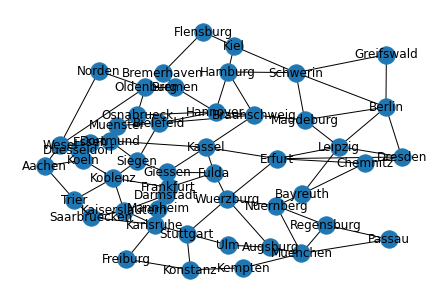

In [16]:
G10 = nx.Graph() 
G10.add_nodes_from(["Aachen","Augsburg","Bayreuth","Berlin","Bielefeld","Braunschweig","Bremen","Bremerhaven","Chemnitz",
"Darmstadt","Dortmund","Dresden","Duesseldorf","Erfurt","Essen","Flensburg","Frankfurt","Freiburg","Fulda","Giessen",
"Greifswald","Hamburg","Hannover","Kaiserslautern","Karlsruhe","Kassel","Kempten","Kiel","Koblenz","Koeln","Konstanz",
"Leipzig","Magdeburg","Mannheim","Muenchen","Muenster","Norden","Nuernberg","Oldenburg","Osnabrueck","Passau",
"Regensburg","Saarbruecken","Schwerin","Siegen","Stuttgart","Trier","Ulm","Wesel","Wuerzburg"])

pos_G10 = {"Aachen":(6.04,50.76),
"Augsburg":(10.9,48.33),
"Bayreuth":(11.59,49.93),
"Berlin":(13.39,52.52),
"Bielefeld":(8.5,52.04),
"Braunschweig":(10.55,52.28),
"Bremen":(8.85,53.11),
"Bremerhaven":(8.58,53.54),
"Chemnitz":(12.93,50.84),
"Darmstadt":(8.65,49.89),
"Dortmund":(7.45,51.51),
"Dresden":(13.73,51.03),
"Duesseldorf":(6.77,51.25),
"Erfurt":(11.04,50.98),
"Essen":(7.02,51.46),
"Flensburg":(9.45,54.77),
"Frankfurt":(8.71,50.12),
"Freiburg":(7.8,47.98),
"Fulda":(9.69,50.56),
"Giessen":(8.67,50.57),
"Greifswald":(13.4,54.09),
"Hamburg":(9.99,53.57),
"Hannover":(9.72,52.38),
"Kaiserslautern":(7.75,49.43),
"Karlsruhe":(8.41,49.01),
"Kassel":(9.51,51.32),
"Kempten":(10.32,47.72),
"Kiel":(10.12,54.34),
"Koblenz":(7.52,50.4),
"Koeln":(6.87,50.94),
"Konstanz":(9.18,47.66),
"Leipzig":(12.38,51.34),
"Magdeburg":(11.64,52.14),
"Mannheim":(8.49,49.49),
"Muenchen":(11.57,48.15),
"Muenster":(7.6,51.97),
"Norden":(7.21,53.6),
"Nuernberg":(11.03,49.57),
"Oldenburg":(8.21,53.11),
"Osnabrueck":(8.03,52.28),
"Passau":(13.46,48.57),
"Regensburg":(12.09,49),
"Saarbruecken":(7.03,49.23),
"Schwerin":(11.45,53.55),
"Siegen":(8.03,50.91),
"Stuttgart":(9.1,48.74),
"Trier":(6.68,49.75),
"Ulm":(9.99,48.4),
"Wesel":(6.37,51.39),
"Wuerzburg":(9.97,49.78)}

G10.add_edges_from([   
("Duesseldorf","Essen", {"weight":18.06820148975301}),
("Dortmund", "Essen", {"weight":18.80847897355629}),
("Wesel", "Essen", {"weight":28.39937901510994}),
("Koeln", "Duesseldorf", {"weight":21.8397169721203}),
("Aachen", "Koeln", {"weight":38.2575633777295}),
("Koblenz", "Koeln", {"weight":46.89695259657333}),
("Muenster", "Dortmund", {"weight":32.403107847063}),
("Siegen", "Dortmund", {"weight":48.4329606339359}),
("Kassel", "Dortmund", {"weight":89.6725343656184}),
("Wesel", "Aachen", {"weight":45.79539643715974}),
("Trier", "Aachen", {"weight":75.2439104683715}),
("Bielefeld", "Muenster", {"weight":300.992477108389}),
("Osnabrueck", "Muenster", {"weight":325.1535837118263}),
("Siegen", "Koblenz", {"weight":41.6949743708802}),
("Frankfurt", "Koblenz", {"weight":55.9738996362903}),
("Kaiserslautern", "Koblenz", {"weight":67.752645947197}),
("Trier", "Koblenz", {"weight":58.30808255687}),
("Bielefeld", "Siegen", {"weight":80.5995106722671}),
("Giessen", "Siegen", {"weight":36.5130000562754}),
("Oldenburg", "Wesel", {"weight":141.9556412357704}),
("Norden", "Wesel", {"weight":156.6255762153071}),
("Leipzig", "Berlin", {"weight":92.1261899408781}),
("Dresden", "Berlin", {"weight":103.9015981617758}),
("Schwerin", "Berlin", {"weight":107.4463701175408}),
("Magdeburg", "Berlin", {"weight":78.3637388678935}),
("Greifswald", "Berlin", {"weight":108.4061448527915}),
("Dresden", "Leipzig", {"weight":62.2240295914046}),
("Erfurt", "Leipzig", {"weight":63.1252256840968}),
("Magdeburg", "Leipzig", {"weight":63.6573853781227}),
("Bayreuth", "Leipzig", {"weight":103.3206757989965}),
("Erfurt", "Dresden", {"weight":116.9212950009664}),
("Chemnitz", "Dresden", {"weight":18.4830660850899}),
("Chemnitz", "Erfurt", {"weight":82.849488619173}),
("Kassel", "Erfurt", {"weight":151.995654034287}),
("Wuerzburg", "Erfurt", {"weight":149.6292047799548}),
("Bayreuth", "Chemnitz", {"weight":86.1864135495179}),
("Magdeburg", "Schwerin", {"weight":3651.09677296853}),
("Greifswald", "Schwerin", {"weight":87.790290366239}),
("Hamburg", "Schwerin", {"weight":59.8941100615122}),
("Kiel", "Schwerin", {"weight":76.7884759471954}),
("Braunschweig", "Magdeburg", {"weight":47.1201482126355}),
("Kiel", "Hamburg", {"weight":53.4286465771449}),
("Hannover", "Hamburg", {"weight":82.9302873228384}),
("Braunschweig", "Hamburg", {"weight":92.070896072575}),
("Oldenburg", "Bremen", {"weight":26.52674567840553}),
("Bremerhaven", "Bremen", {"weight":31.7099033988921}),
("Hannover", "Bremen", {"weight":62.15281604526061}),
("Flensburg", "Kiel", {"weight":40.01585566325897}),
("Norden", "Oldenburg", {"weight":53.31991858785837}),
("Osnabrueck", "Oldenburg", {"weight":57.8026797039192}),
("Bremerhaven", "Flensburg", {"weight":91.9242923804898}),
("Bielefeld", "Hannover", {"weight":56.705620008240}),
("Braunschweig", "Hannover", {"weight":33.6292629644710}),
("Osnabrueck", "Hannover", {"weight":71.6432579359437}),
("Braunschweig", "Bielefeld", {"weight":88.3979876429450}),
("Kassel", "Braunschweig", {"weight":79.784704749787}),
("Giessen", "Kassel", {"weight":63.38088007702728}),
("Fulda", "Kassel", {"weight":53.0576249043665}),
("Darmstadt", "Frankfurt", {"weight":16.1027150474132}),
("Giessen", "Frankfurt", {"weight":31.1215495160004}),
("Fulda", "Frankfurt", {"weight":52.80215893526534}),
("Mannheim", "Darmstadt", {"weight":28.52890958969534}),
("Kaiserslautern", "Darmstadt", {"weight":51.2537812073304}),
("Karlsruhe", "Mannheim", {"weight":33.33859744321062}),
("Saarbruecken", "Kaiserslautern", {"weight":35.2191695113373}),
("Karlsruhe", "Kaiserslautern", {"weight":41.5567633135311}),
("Fulda", "Giessen", {"weight":44.7416221456969}),
("Saarbruecken", "Trier", {"weight":39.1866471778777}),
("Wuerzburg", "Fulda", {"weight":55.2626198396722}),
("Karlsruhe", "Saarbruecken", {"weight":64.1850553610761}),
("Karlsruhe", "Stuttgart", {"weight":36.461361291523474}),
("Ulm", "Stuttgart", {"weight":46.95337180338096}),
("Konstanz", "Stuttgart", {"weight":181.4647626336692}),
("Wuerzburg", "Stuttgart", {"weight":81.81336303549102}),
("Freiburg", "Karlsruhe", {"weight":76.39986661624371}),
("Augsburg", "Ulm", {"weight":42.024240946119335}),
("Freiburg", "Konstanz", {"weight":67.6877095200727}),
("Kempten", "Konstanz", {"weight":53.14737925861554}),
("Augsburg", "Muenchen", {"weight":33.22330760257046}),
("Kempten", "Muenchen", {"weight":65.00125640944293}),
("Passau", "Muenchen", {"weight":91.42897307920425}),
("Nuernberg", "Muenchen", {"weight":101.06943287608496}),
("Regensburg", "Muenchen", {"weight":63.31596235073542}),
("Wuerzburg", "Augsburg", {"weight":108.6017500492845}),
("Regensburg", "Passau", {"weight":69.03696228115952}),
("Bayreuth", "Nuernberg", {"weight":35.24274411637882}),
("Wuerzburg", "Nuernberg", {"weight":49.532817045744345}),
("Regensburg", "Nuernberg", {"weight":61.87233112291431})
])



nx.draw(G10, pos = pos_G10, with_labels = True)

## giul39

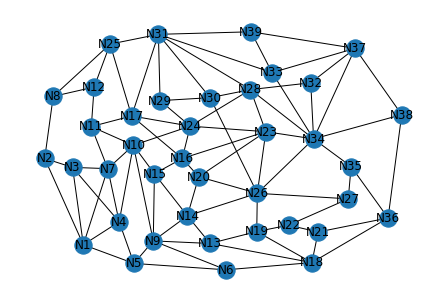

In [17]:
G11 = nx.Graph()
G11.add_nodes_from(["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10","N11","N12","N13","N14","N15","N16",
"N17","N18","N19","N20","N21","N22","N23","N24","N25","N26","N27","N28","N29","N30","N31","N32","N33","N34","N35","N36",
"N37","N38","N39"])
pos_G11 = {"N1":(94,145),
"N2":(26,348),
"N3":(75,327),
"N4":(157,199),
"N5":(183,101),
"N6":(345,86),
"N7":(137,324),
"N8":(41,494),
"N9":(217,154),
"N10":(182,379),
"N11":(108,423),
"N12":(113,516),
"N13":(317,148),
"N14":(277,213),
"N15":(219,312),
"N16":(268,348),
"N17":(179,448),
"N18":(496,103),
"N19":(399,176),
"N20":(297,305),
"N21":(507,175),
"N22":(455,191),
"N23":(415,411),
"N24":(282,424),
"N25":(141,617),
"N26":(400,266),
"N27":(560,253),
"N28":(388,510),
"N29":(229,484),
"N30":(317,491),
"N31":(226,640),
"N32":(494,526),
"N33":(426,550),
"N34":(499,394),
"N35":(565,329),
"N36":(630,208),
"N37":(572,607),
"N38":(654,451),
"N39":(389,646)}

G11.add_edges_from([   
("N1", "N2", {"weight":7926.515590806488}),
("N1", "N3", {"weight":3809.280512688929}),
("N1", "N4", {"weight":2481.588502001054}),
("N1", "N5", {"weight":3520.2541387045394}),
("N1", "N7", {"weight":2972.1777895818705}),
("N2", "N3", {"weight":4897.51776917807}),
("N2", "N8", {"weight":3978.763459056407}),
("N3", "N4", {"weight":4936.980649942927}),
("N3", "N7", {"weight":2044.5885070903282}),
("N4", "N5", {"weight":3117.3732300284605}),
("N4", "N7", {"weight":3879.3864073639743}),
("N4", "N10", {"weight":3879.3864073639743}),
("N5", "N6", {"weight":6525.10925468547}),
("N5", "N9", {"weight":6965.10968542547}),
("N6", "N9", {"weight":9425.534099983684}),
("N6", "N18", {"weight":3738.5272577134315}),
("N7", "N10", {"weight":3244.10474384836}),
("N7", "N11", {"weight":7379.628332913076}),
("N8", "N12", {"weight":1367.26082744443}),
("N8", "N25", {"weight":1853.3641300730808}),
("N9", "N10", {"weight":3639.1105124321143}),
("N9", "N13", {"weight":4569.2205124321143}),
("N9", "N14", {"weight":7269.1105124551143}),
("N9", "N15", {"weight":3939.1305124321143}),
("N10", "N11", {"weight":7587.7269424801357}),
("N10", "N15", {"weight":6576.7248026941357}),
("N10", "N24", {"weight":2188.7269424801357}),
("N11", "N12", {"weight":7548.823700269685}),
("N11", "N17", {"weight":2177.7269424801357}),
("N12", "N25", {"weight":7071.034866638693}),
("N13", "N14", {"weight":3816.6714315731337}),
("N13", "N18", {"weight":3816.7914315731337}),
("N13", "N19", {"weight":3816.1431556731337}),
("N14", "N15", {"weight":7835.202297153847}),
("N14", "N20", {"weight":5724.121466152431}),
("N14", "N26", {"weight":6192.713220960869}),
("N15", "N16", {"weight":7770.736328354574}),
("N16", "N17", {"weight":8302.760065345128}),
("N16", "N20", {"weight":11045.588038345055}),
("N16", "N23", {"weight":2808.724762095564}),
("N16", "N24", {"weight":4735.419884341715}),
("N17", "N24", {"weight":2044.2387459962065}),
("N17", "N25", {"weight":9367.491326597798}),
("N17", "N31", {"weight":4347.295563612158}),
("N18", "N19", {"weight":9523.008710759388}),
("N18", "N21", {"weight":4993.889720737858}),
("N18", "N36", {"weight":4919.5256430495165}),
("N19", "N22", {"weight":8642.29734756992}),
("N19", "N26", {"weight":9145.904091368686}),
("N20", "N23", {"weight":5740.06196660412}),
("N20", "N26", {"weight":10392.008653781959}),
("N21", "N22", {"weight":4823.868969640682}),
("N21", "N36", {"weight":2572.289033001254}),
("N22", "N27", {"weight":6649.5038491896485}),
("N23", "N24", {"weight":10011.317793727654}),
("N23", "N26", {"weight":11972.1430641764482}),
("N23", "N28", {"weight":9510.862856611822}),
("N23", "N34", {"weight":12972.1430641764482}),
("N24", "N28", {"weight":3357.891904586295}),
("N24", "N29", {"weight":9510.862856611822}),
("N25", "N31", {"weight":7548.823700269685}),
("N26", "N27", {"weight":6578.900556823525}),
("N26", "N30", {"weight":11855.81264408437}),
("N26", "N34", {"weight":7756.123926453092}),
("N27", "N35", {"weight":9510.862856611822}),
("N28", "N30", {"weight":1110.7532235578933}),
("N28", "N31", {"weight":9510.862856611822}),
("N28", "N32", {"weight":7756.123926453092}),
("N28", "N34", {"weight":11110.7532235578933}),
("N29", "N30", {"weight":7548.823700269685}),
("N29", "N31", {"weight":11855.81264408437}),
("N30", "N31", {"weight":9510.862856611822}),
("N31", "N33", {"weight":6578.900556823525}),
("N31", "N39", {"weight":9510.862856611822}),
("N32", "N34", {"weight":3357.891904586295}),
("N32", "N37", {"weight":9510.862856611822}),
("N33", "N34", {"weight":7756.123926453092}),
("N33", "N37", {"weight":7972.1430641764482}),
("N33", "N39", {"weight":9510.862856611822}),
("N34", "N35", {"weight":11855.81264408437}),
("N34", "N37", {"weight":9510.862856611822}),
("N34", "N38", {"weight":7548.823700269685}),
("N35", "N36", {"weight":9510.862856611822}),
("N36", "N38", {"weight":7548.823700269685}),
("N37", "N38", {"weight":9510.862856611822}),
("N37", "N39", {"weight":6578.900556823525})
])

nx.draw(G11, pos = pos_G11, with_labels = True)

## india35

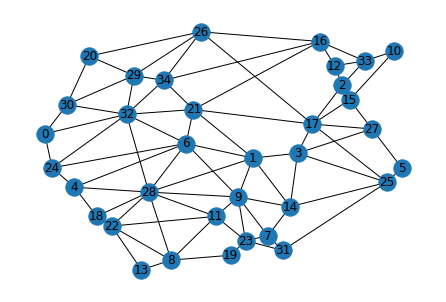

In [18]:
G12 = nx.Graph()

G12.add_nodes_from(["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21",
"22","23","24","25","26","27","28","29","30","31","32","33","34"])
pos_G12 = {"0":(0,28),
"1":(28,23),
"2":(40,38),
"3":(34,24),
"4":(4,17),
"5":(48,21),
"6":(19,26),
"7":(30,7),
"8":(17,2),
"9":(26,15),
"10":(47,45),
"11":(23,11),
"12":(39,42),
"13":(13,0),
"14":(33,13),
"15":(41,35),
"16":(37,47),
"17":(36,30),
"18":(7,11),
"19":(25,3),
"20":(6,44),
"21":(20,33),
"22":(9,9),
"23":(27,6),
"24":(1,21),
"25":(46,18),
"26":(21,49),
"27":(44,29),
"28":(14,16),
"29":(12,40),
"30":(3,34),
"31":(32,4),
"32":(11,32),
"33":(43,43),
"34":(16,39)}

G12.add_edges_from([   
("0", "24", {"weight":487.3945341102309}),
("0", "30", {"weight":575.731240917978}),
("0", "32", {"weight":448.312713240035}),
("1", "3", {"weight":3972.1430641764482}),
("1", "6", {"weight":572.1430641764482}),
("1", "9", {"weight":357.891904586295}),
("1", "14", {"weight":425.246485431925}),
("1", "21", {"weight":357.891904586295}),
("1", "28", {"weight":425.246485431925}),
("2", "12", {"weight":389.4241964868106}),
("2", "15", {"weight":405.830028745549}),
("2", "17", {"weight":389.4241964868106}),
("2", "33", {"weight":359.4241964868106}),
("3", "14", {"weight":481.546534739762}),
("3", "17", {"weight":578.900556823525}),
("3", "25", {"weight":405.830028745549}),
("3", "27", {"weight":381.546534739762}),
("4", "6", {"weight":601.766538641537}),
("4", "18", {"weight":252.447997225236}),
("4", "24", {"weight":622.297810246906}),
("4", "28", {"weight":706.966937356898}),
("5", "25", {"weight":347.729051227039}),
("5", "27", {"weight":557.960173208638}),
("6", "9", {"weight":863.233501986528}),
("6", "21", {"weight":172.1430641764482}),
("6", "24", {"weight":450.170705918408}),
("6", "28", {"weight":450.170705918408}),
("6", "32", {"weight":563.233501986528}),
("7", "9", {"weight":554.823700269685}),
("7", "14", {"weight":563.233501986528}),
("7", "23", {"weight":450.170705918408}),
("7", "31", {"weight":563.233501986528}),
("8", "11", {"weight":372.524154286856}),
("8", "13", {"weight":272.524154286856}),
("8", "19", {"weight":372.524154286856}),
("8", "22", {"weight":262.524154286856}),
("8", "28", {"weight":450.170705918408}),
("9", "11", {"weight":269.506487544035}),
("9", "14", {"weight":410.7532235578933}),
("9", "23", {"weight":578.873392029756}),
("9", "28", {"weight":972.1430641764482}),
("10", "15", {"weight":197.9038240894636}),
("10", "33", {"weight":408.387105539002}),
("11", "22", {"weight":358.6214412557315}),
("11", "23", {"weight":537.920893250912}),
("11", "28", {"weight":272.3735074130495}),
("12", "16", {"weight":652.174631950734}),
("12", "33", {"weight":690.609146297522}),
("13", "22", {"weight":828.746301788557}),
("14", "25", {"weight":436.947326787196}),
("11", "8", {"weight":572.754063894756}),
("15", "17", {"weight":433.518971296981}),
("15", "27", {"weight":429.811688564025}),
("16", "21", {"weight":252.25053993359}),
("16", "26", {"weight":620.533243628837}),
("16", "33", {"weight":614.467441971476}),
("16", "34", {"weight":694.444197146776}),
("17", "21", {"weight":445.459257874203}),
("17", "25", {"weight":413.095500803072}),
("17", "26", {"weight":552.25053993359}),
("17", "27", {"weight":545.459257874203}),
("18", "22", {"weight":684.063311715794}),
("18", "28", {"weight":593.777173557922}),
("19", "23", {"weight":492.132361122586}),
("20", "26", {"weight":413.095500803072}),
("20", "29", {"weight":405.830028745549}),
("20", "30", {"weight":399.688027157757}),
("21", "32", {"weight":243.7180907800785}),
("21", "34", {"weight":666.88841701441}),
("22", "28", {"weight":623.165337579898}),
("23", "31", {"weight":638.768373730354}),
("24", "32", {"weight":414.46898620408}),
("25", "31", {"weight":463.356933366557}),
("26", "29", {"weight":375.148234225802}),
("26", "34", {"weight":469.181005194643}),
("28", "32", {"weight":431.7180907800785}),
("29", "30", {"weight":562.123926453092}),
("29", "32", {"weight":483.374394517987}),
("29", "34", {"weight":477.575209694083}),
("30", "32", {"weight":450.170705918408}),
("32", "34", {"weight":412.384589335402})
])


nx.draw(G12, pos = pos_G12, with_labels = True)

## janos-us


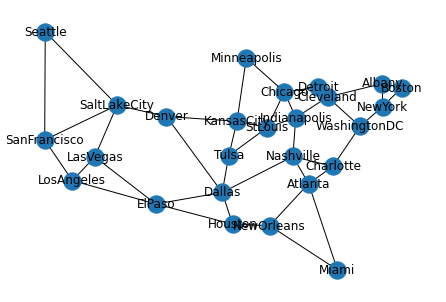

In [19]:
G13 = nx.Graph()
G13.add_nodes_from(["Seattle","LosAngeles","SanFrancisco","LasVegas","SaltLakeCity","ElPaso","Dallas","Houston","Tulsa",
"Minneapolis","KansasCity","Denver","Chicago","Indianapolis","Detroit","StLouis","Nashville","Cleveland","NewYork",
"Albany","Charlotte","NewOrleans","Boston","Atlanta","Miami","WashingtonDC"])
pos_G13 = {"Seattle":(-122.3,47.45),
"LosAngeles":(-118.4,33.93),
"SanFrancisco":(-122.38,37.62),
"LasVegas":(-115.17,36.08),
"SaltLakeCity":(-111.97,40.78),
"ElPaso":(-106.4,31.8),
"Dallas":(-96.85,32.85),
"Houston":(-95.35,29.97),
"Tulsa":(-95.9,36.2),
"Minneapolis":(-93.38,45.07),
"KansasCity":(-94.72,39.32),
"Denver":(-104.87,39.75),
"Chicago":(-87.9,41.98),
"Indianapolis":(-86.27,39.65),
"Detroit":(-83.02,42.42),
"StLouis":(-90.37,38.75),
"Nashville":(-86.68,36.12),
"Cleveland":(-81.68,41.52),
"NewYork":(-73.78,40.65),
"Albany":(-73.8,42.75),
"Charlotte":(-80.93,35.22),
"NewOrleans":(-90.02,29.83),
"Boston":(-71.03,42.37),
"Atlanta":(-84.42,33.65),
"Miami":(-80.28,25.82),
"WashingtonDC":(-77.04,38.85)}

G13.add_edges_from([   
("Seattle", "SanFrancisco", {"weight":678.753938583637}),
("Seattle", "SaltLakeCity", {"weight":650.170705918408}),
("LosAngeles", "SanFrancisco", {"weight":561.749316056967}),
("LosAngeles", "LasVegas", {"weight":572.1430641764482}),
("LosAngeles", "ElPaso", {"weight":920.533243628837}),
("SanFrancisco", "Seattle", {"weight":678.900556823525}),
("SanFrancisco", "LosAngeles", {"weight":720.533243628837}),
("SanFrancisco", "SaltLakeCity", {"weight":531.173911021715}),
("LasVegas", "LosAngeles", {"weight":413.095500803072}),
("LasVegas", "SaltLakeCity", {"weight":652.25053993359}),
("LasVegas", "ElPaso", {"weight":731.173911021715}),
("SaltLakeCity", "Seattle", {"weight":617.109138168367}),
("SaltLakeCity", "SanFrancisco", {"weight":683.374394517987}),
("SaltLakeCity", "LasVegas", {"weight":678.900556823525}),
("SaltLakeCity", "Denver", {"weight":531.173915555115}),
("ElPaso", "LosAngeles", {"weight":652.25053993359}),
("ElPaso", "LasVegas", {"weight":678.900556823525}),
("ElPaso", "Dallas", {"weight":731.173911021715}),
("ElPaso", "Houston", {"weight":678.900556823525}),
("Dallas", "ElPaso", {"weight":531.173911021715}),
("Dallas", "Houston", {"weight":731.173911021715}),
("Dallas", "Tulsa", {"weight":578.900556823525}),
("Dallas", "Denver", {"weight":531.173911021715}),
("Dallas", "Nashville", {"weight":731.173911021715}),
("Houston", "ElPaso", {"weight":683.374394517987}),
("Houston", "Dallas", {"weight":531.173911021715}),
("Houston", "NewOrleans", {"weight":678.900556823525}),
("Tulsa", "Dallas", {"weight":571.173911021715}),
("Tulsa", "KansasCity", {"weight":573.173911021715}),
("Tulsa", "StLouis", {"weight":658.900556823525}),
("Minneapolis", "KansasCity", {"weight":671.102117391714}),
("Minneapolis", "Chicago", {"weight":572.1430641764482}),
("KansasCity", "Tulsa", {"weight":571.173911021715}),
("KansasCity", "Minneapolis", {"weight":531.173911021715}),
("KansasCity", "Denver", {"weight":561.173911021715}),
("KansasCity", "StLouis", {"weight":572.1430641764482}),
("Denver", "SaltLakeCity", {"weight":657.900556823525}),
("Denver", "Dallas", {"weight":531.173911021715}),
("Denver", "KansasCity", {"weight":573.173911021715}),
("Chicago", "Minneapolis", {"weight":761.173911021715}),
("Chicago", "Indianapolis", {"weight":502.1430641764482}),
("Chicago", "Detroit", {"weight":672.1430641764482}),
("Chicago", "StLouis", {"weight":631.173911021715}),
("Indianapolis", "Chicago", {"weight":683.374394517987}),
("Indianapolis", "StLouis", {"weight":678.900556823525}),
("Indianapolis", "Nashville", {"weight":631.173911021715}),
("Indianapolis", "Cleveland", {"weight":561.173911021715}),
("Detroit", "Chicago", {"weight":672.1430641764482}),
("Detroit", "Cleveland", {"weight":671.102117391714}),
("StLouis", "Tulsa", {"weight":531.173911021715}),
("StLouis", "KansasCity", {"weight":507.1430641764482}),
("StLouis", "Chicago", {"weight":531.173911021715}),
("StLouis", "Indianapolis", {"weight":756.123926453092}),
("Nashville", "Dallas", {"weight":531.173911021715}),
("Nashville", "Indianapolis", {"weight":631.102117391714}),
("Nashville", "Charlotte", {"weight":731.173911021715}),
("Nashville", "Atlanta", {"weight":631.102117391714}),
("Cleveland", "Indianapolis", {"weight":683.374394517987}),
("Cleveland", "Detroit", {"weight":531.173911021715}),
("Cleveland", "Albany", {"weight":656.12326453092}),
("Cleveland", "WashingtonDC", {"weight":731.173911021715}),
("NewYork", "Albany", {"weight":531.173911021715}),
("NewYork", "Boston", {"weight":662.1430641764482}),
("NewYork", "WashingtonDC", {"weight":531.173911021715}),
("Albany", "Cleveland", {"weight":731.173911021715}),
("Albany", "NewYork", {"weight":572.1430641764482}),
("Albany", "Boston", {"weight":531.173911021715}),
("Charlotte", "Nashville", {"weight":731.173911021715}),
("Charlotte", "Atlanta", {"weight":756.123926453092}),
("Charlotte", "WashingtonDC", {"weight":531.173911021715}),
("NewOrleans", "Houston", {"weight":731.173911021715}),
("NewOrleans", "Atlanta", {"weight":673.102117391714}),
("NewOrleans", "Miami", {"weight":683.374394517987}),
("Boston", "NewYork", {"weight":571.173911021715}),
("Boston", "Albany", {"weight":572.1430641764482}),
("Atlanta", "Nashville", {"weight":683.374394517987}),
("Atlanta", "Charlotte", {"weight":756.123926453092}),
("Atlanta", "NewOrleans", {"weight":671.102117391714}),
("Atlanta", "Miami", {"weight":631.173911021715}),
("Miami", "NewOrleans", {"weight":672.1430641764482}),
("Miami", "Atlanta", {"weight":572.1430641764482}),
])

nx.draw(G13, pos = pos_G13, with_labels = True)

## janos-us-ca


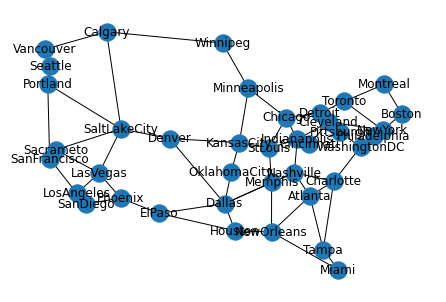

In [20]:
G14 = nx.Graph()
G14.add_nodes_from(["Vancouver","LosAngeles","SanFrancisco","LasVegas","SaltLakeCity","ElPaso","Dallas","Houston",
"OklahomaCity","Minneapolis","KansasCity","Denver","Chicago","Indianapolis","Detroit","StLouis","Nashville","Cleveland",
"NewYork","Montreal","Charlotte","NewOrleans","Boston","Atlanta","Miami","WashingtonDC","Philadelphia","Toronto","Pittsburgh",
"Cincinnati","Tampa","Memphis","Winnipeg","Calgary","Seattle","Portland","Sacrameto","Phoenix","SanDiego"])
pos_G14 = {"Vancouver":(-123.1,49.22),
"LosAngeles":(-118.4,33.93),
"SanFrancisco":(-122.38,37.62),
"LasVegas":(-115.17,36.08),
"SaltLakeCity":(-111.97,40.78),
"ElPaso":(-106.4,31.8),
"Dallas":(-96.85,32.85),
"Houston":(-95.35,29.97),
"OklahomaCity":(-95.9,36.2),
"Minneapolis":(-93.38,45.07),
"KansasCity":(-94.72,39.32),
"Denver":(-104.87,39.75),
"Chicago":(-87.9,41.98),
"Indianapolis":(-86.27,39.65),
"Detroit":(-83.02,42.42),
"StLouis":(-90.37,38.75),
"Nashville":(-86.68,36.12),
"Cleveland":(-81.68,41.52),
"NewYork":(-73.78,40.65),
"Montreal":(-73.6,45.5),
"Charlotte":(-80.93,35.22),
"NewOrleans":(-90.02,29.83),
"Boston":(-71.03,42.37),
"Atlanta":(-84.42,33.65),
"Miami":(-80.28,25.82),
"WashingtonDC":(-77.04,38.85),
"Philadelphia":(-75.13,40),
"Toronto":(-79.41,43.7),
"Pittsburgh":(-79.97,40.44),
"Cincinnati":(-84.5,39.14),
"Tampa":(-82.48,27.96),
"Memphis":(-90,35.11),
"Winnipeg":(-97.16,49.88),
"Calgary":(-114.08,51.08),
"Seattle":(-122.3,47.45),
"Portland":(-122.65,45.53),
"Sacrameto":(-121.46,38.56),
"Phoenix":(-112.02,33.43),
"SanDiego":(-117.13,32.81)}


G14.add_edges_from([   
("Vancouver", "Calgary", {"weight":418.9219124918274}),
("Vancouver", "Seattle", {"weight":127.61037140387704}),
("LosAngeles", "SanFrancisco", {"weight":338.49163180200793}),
("LosAngeles", "LasVegas", {"weight":235.36745675606042}),
("LosAngeles", "SanDiego", {"weight":106.50470188184435}),
("SanFrancisco", "Portland", {"weight":546.3467638680436}),
("SanFrancisco", "LosAngeles", {"weight":338.49163180200793}),
("SanFrancisco", "Sacrameto", {"weight":81.92751325277005}),
("LasVegas", "LosAngeles", {"weight":235.36745675606042}),
("LasVegas", "SaltLakeCity", {"weight":367.72919993175145}),
("LasVegas", "Sacrameto", {"weight":367.72919993175145}),
("LasVegas", "Phoenix", {"weight":255.72882965076764}),
("SaltLakeCity", "LasVegas", {"weight":367.72919993175145}),
("SaltLakeCity", "Denver", {"weight":380.6713069116062}),
("SaltLakeCity", "Calgary", {"weight":718.2958625819894}),
("SaltLakeCity", "Portland", {"weight":629.2667477536176}),
("SaltLakeCity", "Sacrameto", {"weight":526.840798472598}),
("ElPaso", "Dallas", {"weight":561.7154502354459}),
("ElPaso", "Phoenix", {"weight":345.63385295488985}),
("ElPaso", "Houston", {"weight":666.549813137611}),
("Dallas", "ElPaso", {"weight":561.7154502354459}),
("Dallas", "Houston", {"weight":217.61109279027204}),
("Dallas", "OklahomaCity", {"weight":237.53584793560717}),
("Dallas", "Denver", {"weight":652.2427794218523}),
("Dallas", "Memphis", {"weight":421.98933088066525}),
("Houston", "ElPaso", {"weight":666.549813137611}),
("Houston", "Dallas", {"weight":217.61109279027204}),
("Houston", "NewOrleans", {"weight":319.15806954677953}),
("OklahomaCity", "Dallas", {"weight":237.53584793560717}), 
("OklahomaCity", "KansasCity", {"weight":224.84710732739848}),
("Minneapolis", "KansasCity", {"weight":402.8829625530833}),
("Minneapolis", "Chicago", {"weight":347.41612593003435}),
("Minneapolis", "Winnipeg", {"weight":375.94750917489284}),
("KansasCity", "OklahomaCity", {"weight":224.84710732739848}),
("KansasCity", "Minneapolis", {"weight":402.8829625530833}),
("KansasCity", "Denver", {"weight":541.0353491822117}),
("KansasCity", "StLouis", {"weight":236.57875059468824}),
("Denver", "SaltLakeCity", {"weight":380.6713069116062}),
("Denver", "Dallas", {"weight":652.2427794218523}),
("Denver", "KansasCity", {"weight":541.0353491822117}),
("Chicago", "Minneapolis", {"weight":347.41612593003435}),
("Chicago", "Indianapolis", {"weight":182.0302633875655}),
("Chicago", "Detroit", {"weight":251.4233912156851}),
("Chicago", "StLouis", {"weight":258.09119199284424}),
("Indianapolis", "Chicago", {"weight":182.0302633875655}),
("Indianapolis", "StLouis", {"weight":227.99140340076792}),
("Indianapolis", "Nashville", {"weight":244.76047615874896}),
("Indianapolis", "Cleveland", {"weight":273.08249307870415}),
("Detroit", "Chicago", {"weight":251.4233912156851}),
("Detroit", "Cleveland", {"weight":92.70167673531499}),
("Detroit", "Toronto", {"weight":202.4090194090784}),
("StLouis", "KansasCity", {"weight":236.57875059468824}),
("StLouis", "Chicago", {"weight":258.09119199284424}),
("StLouis", "Indianapolis", {"weight":227.99140340076792}),
("StLouis", "Memphis", {"weight":252.1623002847845}),
("Nashville", "Dallas", {"weight":620.8950210622163}),
("Nashville", "Indianapolis", {"weight":244.76047615874896}),
("Nashville", "Charlotte", {"weight":328.4179964568181}),
("Nashville", "Memphis", {"weight":198.96691768469057}),
("Cleveland", "NewYork", {"weight":415.3601787601218}),
("Cleveland", "Detroit", {"weight":92.70167673531499}),
("Cleveland", "Pittsburgh", {"weight":116.21261471596718}),
("Cleveland", "Cincinnati", {"weight":221.4215085832149}),
("NewYork", "Cleveland", {"weight":415.3601787601218}),
("NewYork", "Boston", {"weight":185.24606645729963}),
("NewYork", "Philadelphia", {"weight":84.0498744572176}),
("NewYork", "Toronto", {"weight":356.72297570451383}),
("Montreal", "Boston", {"weight":251.04043723488502}),
("Montreal", "Toronto", {"weight":311.4130484888989}),
("Charlotte", "Nashville", {"weight":328.4179964568181}),
("Charlotte", "Atlanta", {"weight":226.37062487220987}),
("Charlotte", "WashingtonDC", {"weight":329.76813415892235}),
("Charlotte", "Tampa", {"weight":509.4873558397608}),
("NewOrleans", "Houston", {"weight":319.15806954677953}),
("NewOrleans", "Atlanta", {"weight":421.4226716194654}),
("NewOrleans", "Miami", {"weight":655.7147065930064}),
("NewOrleans", "Memphis", {"weight":364.5752986303719}),
("Boston", "NewYork", {"weight":185.24606645729963}),
("Boston", "Montreal", {"weight":251.04043723488502}),
("Atlanta", "Nashville", {"weight":213.22669604114807}),
("Atlanta", "Charlotte", {"weight":226.37062487220987}),
("Atlanta", "NewOrleans", {"weight":421.4226716194654}),
("Atlanta", "Tampa", {"weight":409.35538199313476}),
("Miami", "NewOrleans", {"weight":655.7147065930064}),
("Miami", "Tampa", {"weight":200.46119248547748}),
("WashingtonDC", "Charlotte", {"weight":329.76813415892235}),
("WashingtonDC", "Philadelphia", {"weight":129.15813671527172}),
("WashingtonDC", "Pittsburgh", {"weight":190.5624681670032}),
("Philadelphia", "NewYork", {"weight":84.0498744572176}),
("Philadelphia", "WashingtonDC", {"weight":129.15813671527172}),
("Toronto", "Detroit", {"weight":202.4090194090784}),
("Toronto", "NewYork", {"weight":356.72297570451383}),
("Toronto", "Montreal", {"weight":311.4130484888989}),
("Pittsburgh", "Cleveland", {"weight":116.21261471596718}),
("Cincinnati", "Indianapolis", {"weight":100.79540145150467}),
("Cincinnati", "Cleveland", {"weight":221.4215085832149}),
("Tampa", "Charlotte", {"weight":509.4873558397608}),
("Tampa", "Atlanta", {"weight":409.35538199313476}),
("Tampa", "Miami", {"weight":200.46119248547748}),
("Memphis", "Dallas", {"weight":421.98933088066525}),
("Memphis", "StLouis", {"weight":252.1623002847845}),
("Memphis", "Nashville", {"weight":198.96691768469057}),
("Memphis", "NewOrleans", {"weight":364.5752986303719}),
("Winnipeg", "Minneapolis", {"weight":375.94750917489284}),
("Winnipeg", "Calgary", {"weight":746.367623383777}),
("Calgary", "Vancouver", {"weight":418.9219124918274}),
("Calgary", "SaltLakeCity", {"weight":718.2958625819894}),
("Calgary", "Winnipeg", {"weight":746.367623383777}),
("Seattle", "Vancouver", {"weight":134.04947060617332}),
("Seattle", "Portland", {"weight":133.6117543521977}),
("Portland", "SanFrancisco", {"weight":546.3467638680436}),
("Portland", "SaltLakeCity", {"weight":629.2667477536176}),
("Portland", "Seattle", {"weight":133.6117543521977}),
("Sacrameto", "SanFrancisco", {"weight":81.92751325277005}),
("Sacrameto", "LasVegas", {"weight":385.38692040360894}),
("Sacrameto", "SaltLakeCity", {"weight":526.840798472598}),
("Phoenix", "LasVegas", {"weight":255.72882965076764}),
("Phoenix", "ElPaso", {"weight":345.63385295488985}),
("Phoenix", "SanDiego", {"weight":298.5620124219634}),
("SanDiego", "LosAngeles", {"weight":106.50470188184435}),
("SanDiego", "Phoenix", {"weight":298.5620124219634})
])



nx.draw(G14, pos = pos_G14, with_labels = True)

## newyork

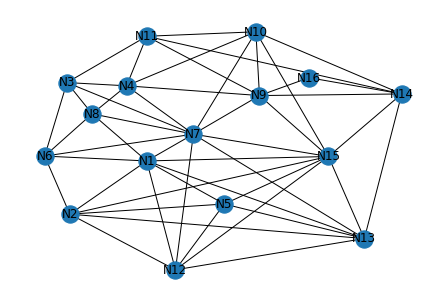

In [21]:
G15 = nx.Graph()
G15.add_nodes_from(["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10","N11","N12","N13","N14","N15","N16"])
pos_G15 = {"N1":(237,338),
"N2":(130,207),
"N3":(126,531),
"N4":(209,523),
"N5":(345,232),
"N6":(95,350),
"N7":(302,404),
"N8":(161,454),
"N9":(394,499),
"N10":(389,656),
"N11":(237,645),
"N12":(277,70),
"N13":(540,147),
"N14":(592,503),
"N15":(490,349),
"N16":(463,543)}


G15.add_edges_from([   
("N1", "N2", {"weight":5731.173911021715}),
("N1", "N5", {"weight":3809.280512688929}),
("N1", "N6", {"weight":2481.588502001054}),
("N1", "N7", {"weight":3520.2541387045394}),
("N1", "N8", {"weight":2972.1777895818705}),
("N1", "N12", {"weight":4897.51776917807}),
("N1", "N13", {"weight":3978.763459056407}),
("N1", "N15", {"weight":4936.980649942927}),
("N2", "N5", {"weight":2044.5885070903282}),
("N2", "N6", {"weight":2619.9977899277424}),
("N2", "N12", {"weight":2835.8064965418434}),
("N2", "N13", {"weight":4836.995507050684}),
("N2", "N15", {"weight":2991.4760913246078}),
("N3", "N4", {"weight":4053.62876584461}),
("N3", "N6", {"weight":2835.8064965418435}),
("N3", "N7", {"weight":3117.3732300284605}),
("N3", "N8", {"weight":2991.4760913246078}),
("N3", "N11", {"weight":3117.3732300284605}),
("N4", "N7", {"weight":3879.3864073639743}),
("N4", "N8", {"weight":2835.8064965418434}),
("N4", "N9", {"weight":3972.747262120769}),
("N4", "N10", {"weight":5020.795069461558}),
("N4", "N11", {"weight":3879.3864073639743}),
("N5", "N12", {"weight":6525.10925468547}),
("N5", "N13", {"weight":4013.095500803072}),
("N5", "N15", {"weight":9425.534099983684}),
("N6", "N7", {"weight":3879.3864073639743}),
("N6", "N8", {"weight":3972.747262120769}),
("N7", "N8", {"weight":2991.476091324607}),
("N7", "N9", {"weight":3357.891904586295}),
("N7", "N10", {"weight":4805.830028745549}),
("N7", "N12", {"weight":7379.628332913076}),
("N7", "N13", {"weight":3244.10474384836}),
("N7", "N15", {"weight":3110.7532235578933}),
("N9", "N10", {"weight":1367.26082744443}),
("N9", "N11", {"weight":5095.647999489386}),
("N9", "N14", {"weight":2665.6399562613774}),
("N9", "N15", {"weight":3972.747262120769}),
("N9", "N16", {"weight":1367.26082744443}),
("N10", "N11", {"weight":5020.795069461558}),
("N10", "N14", {"weight":4013.095500803072}),
("N10", "N15", {"weight":2991.4760913246078}),
("N12", "N13", {"weight":7143.7180907800785}),
("N11", "N14", {"weight":2177.7269424801357}),
("N12", "N15", {"weight":4013.095500803072}),
("N13", "N14", {"weight":5529.0019872613875}),
("N13", "N15", {"weight":2835.8064965418434}),
("N14", "N15", {"weight":3816.7714315731337}),
("N14", "N16", {"weight":7835.202297153847})
])

nx.draw(G15, pos = pos_G15, with_labels = True)

## nobel-eu


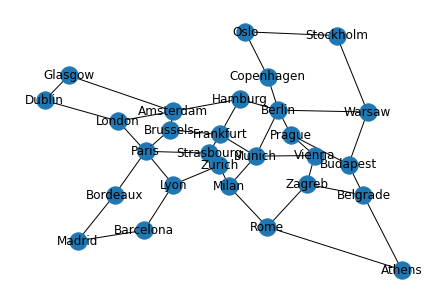

In [22]:
G16 = nx.Graph()
G16.add_nodes_from(["Amsterdam","Athens","Barcelona","Belgrade","Berlin","Bordeaux","Brussels","Budapest","Copenhagen",
"Dublin","Frankfurt","Glasgow","Hamburg","London","Lyon","Madrid","Milan","Munich","Oslo","Paris","Prague","Rome",
"Stockholm","Strasbourg","Vienna","Warsaw","Zagreb","Zurich"])
pos_G16 = {"Amsterdam":(4.51,52.2),
"Athens":(23.42,37.58),
"Barcelona":(2.07,41.22),
"Belgrade":(20.25,44.47),
"Berlin":(13.21,52.31),
"Bordeaux":(-0.35,44.51),
"Brussels":(4.2,50.49),
"Budapest":(19.02,47.29),
"Copenhagen":(12.32,55.41),
"Dublin":(-6.15,53.21),
"Frankfurt":(8.38,50.07),
"Glasgow":(-4.16,55.51),
"Hamburg":(10,53.33),
"London":(-0.07,51.3),
"Lyon":(4.49,45.43),
"Madrid":(-3.42,40.25),
"Milan":(9.11,45.28),
"Munich":(11.33,48.07),
"Oslo":(10.45,59.54),
"Paris":(2.2,48.51),
"Prague":(14.25,50.04),
"Rome":(12.29,41.53),
"Stockholm":(18.03,59.19),
"Strasbourg":(7.45,48.35),
"Vienna":(16.21,48.12),
"Warsaw":(20.59,52.14),
"Zagreb":(15.57,45.48),
"Zurich":(8.32,47.22)}


G16.add_edges_from([   
("Amsterdam", "Brussels", {"weight":118.82634562101893}),
("Amsterdam", "Glasgow", {"weight":420.15401464183}),
("Amsterdam", "Hamburg", {"weight":242.20483029139217}),
("Amsterdam", "London", {"weight":205.36614843190054}),
("Athens", "Belgrade", {"weight":503.47443021875597}),
("Athens", "Rome", {"weight":651.6157777734603}),
("Barcelona", "Lyon", {"weight":315.0441303728547}),
("Barcelona", "Madrid", {"weight":294.8865023714916}),
("Belgrade", "Budapest", {"weight":203.4864869614691}),
("Belgrade", "Zagreb", {"weight":238.95674193131634}),
("Berlin", "Copenhagen", {"weight":217.09043712727862}),
("Berlin", "Hamburg", {"weight":151.31212184933287}),
("Berlin", "Munich", {"weight":304.303543325826}),
("Berlin", "Warsaw", {"weight":312.23108712489113}),
("Berlin", "Prague", {"weight":550.1564952607185}),
("Bordeaux", "Madrid", {"weight":329.87355986105064}),
("Bordeaux", "Paris", {"weight":289.8220619772538}),
("Brussels", "Frankfurt", {"weight":186.67898037839268}),
("Brussels", "Paris", {"weight":163.4932642970793}),
("Budapest", "Prague", {"weight":288.64187879422036}),
("Budapest", "Warsaw", {"weight":342.1173258332649}),
("Copenhagen", "Oslo", {"weight":293.46678769007525}),
("Dublin", "Glasgow", {"weight":177.8336834683844}),
("Dublin", "London", {"weight":288.7207348947957}),
("Frankfurt", "Hamburg", {"weight":235.51420158463898}),
("Frankfurt", "Munich", {"weight":192.007860085703}),
("Frankfurt", "Strasbourg", {"weight":125.95125517401712}),
("London", "Paris", {"weight":217.4649940954245}),
("Lyon", "Paris", {"weight":238.44562532416705}),
("Milan", "Munich", {"weight":219.46128186135346}),
("Milan", "Rome", {"weight":304.0652834346897}),
("Milan", "Zurich", {"weight":139.1606595881627}),
("Munich", "Vienna", {"weight":225.03965673916855}),
("Oslo", "Stockholm", {"weight":267.6444972914552}),
("Paris", "Strasbourg", {"weight":240.7387478210895}),
("Prague", "Vienna", {"weight":159.46506436143173}),
("Rome", "Zagreb", {"weight":318.31991561881335}),
("Stockholm", "Warsaw", {"weight":496.7983108115665}),
("Zurich", "Lyon", {"weight":220.47448520360882}),
("Strasbourg", "Zurich", {"weight":87.84474005962669}),
("Vienna", "Zagreb", {"weight":184.77778819999457})
])

nx.draw(G16, pos = pos_G16, with_labels = True)

## nobel-germany

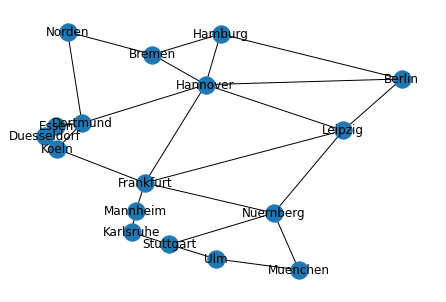

In [23]:
G17 = nx.Graph()
G17.add_nodes_from(["Hannover","Frankfurt","Hamburg","Norden","Bremen","Berlin","Muenchen","Ulm","Nuernberg","Stuttgart",
"Karlsruhe","Mannheim","Essen","Dortmund","Duesseldorf","Koeln","Leipzig"])
pos_G17 = {"Hannover":(9.8,52.39),
"Frankfurt":(8.66,50.14),
"Hamburg":(10.08,53.55),
"Norden":(7.21,53.6),
"Bremen":(8.8,53.08),
"Berlin":(13.48,52.52),
"Muenchen":(11.55,48.15),
"Ulm":(9.99,48.4),
"Nuernberg":(11.08,49.45),
"Stuttgart":(9.12,48.73),
"Karlsruhe":(8.41,49.01),
"Mannheim":(8.49,49.49),
"Essen":(7,51.44),
"Dortmund":(7.48,51.51),
"Duesseldorf":(6.78,51.22),
"Koeln":(7.01,50.92),
"Leipzig":(12.38,51.34)}

G17.add_edges_from([   
("Berlin", "Hamburg", {"weight":158.04961012991384}),
("Berlin", "Hannover", {"weight":155.0855645717874}),
("Berlin", "Leipzig", {"weight":93.97550824380123}),
("Bremen", "Hamburg", {"weight":61.974817816180966}),
("Bremen", "Hannover", {"weight":63.3851545571203}),
("Bremen", "Norden", {"weight":74.7365318961051}),
("Dortmund", "Essen", {"weight":21.20158378466043}),
("Dortmund", "Hannover", {"weight":115.92433368165031}),
("Dortmund", "Koeln", {"weight":45.528315234272874}),
("Dortmund", "Norden", {"weight":144.75448661770807}),
("Duesseldorf", "Essen", {"weight":17.912075771131}),
("Duesseldorf", "Koeln", {"weight":22.992802657104946}),
("Frankfurt", "Hannover", {"weight":162.97295276151442}),
("Frankfurt", "Koeln", {"weight":90.24905423394931}),
("Frankfurt", "Leipzig", {"weight":182.42032943225746}),
("Frankfurt", "Mannheim", {"weight":45.515782474641235}),
("Frankfurt", "Nuernberg", {"weight":117.91058907419303}),
("Hamburg", "Hannover", {"weight":80.93734440512111}),
("Hannover", "Leipzig", {"weight":131.73663895021414}),
("Karlsruhe", "Mannheim", {"weight":33.338597443210624}),
("Karlsruhe", "Stuttgart", {"weight":37.597931821716266}),
("Leipzig", "Nuernberg", {"weight":142.48929322077765}),
("Muenchen", "Nuernberg", {"weight":92.27204799507976}),
("Muenchen", "Ulm", {"weight":73.73777131775799}),
("Nuernberg", "Stuttgart", {"weight":101.61327414647104}),
("Stuttgart", "Ulm", {"weight":45.820430033212})
])

nx.draw(G17, pos = pos_G17, with_labels = True)

## nobel-us


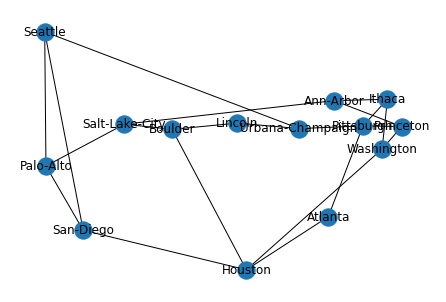

In [24]:
G18 = nx.Graph()
G18.add_nodes_from(["Palo-Alto","San-Diego","Boulder","Washington","Atlanta","Urbana-Champaign","Ann-Arbor","Lincoln",
"Princeton","Ithaca","Pittsburgh","Houston","Salt-Lake-City","Seattle"])
pos_G18 = {"Palo-Alto":(-122.07,37.25),
"San-Diego":(-117.08,32.42),
"Boulder":(-105.16,40),
"Washington":(-77.02,38.52),
"Atlanta":(-84.23,33.44),
"Urbana-Champaign":(-88.14,40.06),
"Ann-Arbor":(-83.43,42.16),
"Lincoln":(-96.42,40.47),
"Princeton":(-74.39,40.21),
"Ithaca":(-76.3,42.26),
"Pittsburgh":(-79.58,40.26),
"Houston":(-95.21,29.45),
"Salt-Lake-City":(-111.55,40.39),
"Seattle":(-122.24,47.33)}

G18.add_edges_from([   
("Palo-Alto", "San-Diego", {"weight":437.1157687068211}),
("Palo-Alto", "Salt-Lake-City", {"weight":605.5620575035442}),
("Palo-Alto", "Seattle", {"weight":696.0575162829371}),
("San-Diego", "Houston", {"weight":1309.0335960223895}),
("San-Diego", "Seattle", {"weight":1064.572694109667}),
("Boulder", "Lincoln", {"weight":461.64864854580674}),
("Boulder", "Houston", {"weight":920.3427539592155}),
("Boulder", "Salt-Lake-City", {"weight":338.0239308455373}),
("Washington", "Princeton", {"weight":182.5434688268012}),
("Washington", "Ithaca", {"weight":260.9976963190822}),
("Washington", "Houston", {"weight":1211.848994812976}),
("Atlanta", "Pittsburgh", {"weight":536.2293676592668}),
("Atlanta", "Houston", {"weight":702.5322500107752}),
("Urbana-Champaign", "Lincoln", {"weight":437.01281388537126}),
("Urbana-Champaign", "Pittsburgh", {"weight":451.7440096298266}),
("Urbana-Champaign", "Seattle", {"weight":1759.0507015253559}),
("Ann-Arbor", "Princeton", {"weight":488.4002730547064}),
("Ann-Arbor", "Ithaca", {"weight":364.6083871658817}),
("Ann-Arbor", "Salt-Lake-City", {"weight":1457.722940360696}),
("Princeton", "Pittsburgh", {"weight":273.5546447601069}),
("Ithaca", "Pittsburgh", {"weight":219.1847153952899})
])

nx.draw(G18, pos = pos_G18, with_labels = True)

## norway


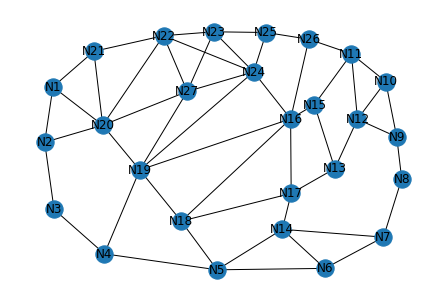

In [25]:
G19 = nx.Graph()
G19.add_nodes_from(["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10","N11","N12","N13","N14","N15","N16",
"N17","N18","N19","N20","N21","N22","N23","N24","N25","N26","N27"])
pos_G19 = {"N1":(48,557),
"N2":(33,401),
"N3":(50,212),
"N4":(141,87),
"N5":(345,42),
"N6":(540,46),
"N7":(646,134),
"N8":(679,298),
"N9":(670,416),
"N10":(650,572),
"N11":(588,650),
"N12":(599,466),
"N13":(558,327),
"N14":(463,156),
"N15":(521,507),
"N16":(478,467),
"N17":(479,257),
"N18":(280,179),
"N19":(205,323),
"N20":(138,449),
"N21":(122,657),
"N22":(248,701),
"N23":(339,712),
"N24":(411,599),
"N25":(434,710),
"N26":(511,691),
"N27":(291,544)}

G19.add_edges_from([   
("N1", "N2", {"weight":10546.528078131556}),
("N2", "N3", {"weight":11301.985165956452}),
("N3", "N4", {"weight":8416.858448663312}),
("N4", "N5", {"weight":3504.300658739512}),
("N5", "N6", {"weight":6282.8018624175465}),
("N6", "N7", {"weight":3412.6152963541685}),
("N7", "N8", {"weight":10724.483977058399}),
("N8", "N9", {"weight":8162.160078426913}),
("N9", "N10", {"weight":10512.207161957662}),
("N9", "N12", {"weight":3972.747262120769}),
("N10", "N12", {"weight":7680.940826179645}),
("N11", "N12", {"weight":12067.309523289774}),
("N10", "N11", {"weight":4749.795242967084}),
("N11", "N26", {"weight":4037.6152978418804}),
("N25", "N26", {"weight":5100.055894516328}),
("N23", "N25", {"weight":6455.118593532124}),
("N24", "N25", {"weight":7494.805013141965}),
("N23", "N24", {"weight":6365.925449348432}),
("N22", "N24", {"weight":2890.419129605921}),
("N23", "N27", {"weight":9020.390118569145}),
("N22", "N23", {"weight":6099.696618616967}),
("N21", "N22", {"weight":6064.849481707928}),
("N1", "N21", {"weight":5655.290923210695}),
("N20", "N21", {"weight":10497.884058022017}),
("N1", "N20", {"weight":7387.951783994418}),
("N20", "N22", {"weight":7549.663163381463}),
("N2", "N20", {"weight":3401.708855558711}),
("N20", "N27", {"weight":6428.981747640454}),
("N22", "N27", {"weight":9103.611166942066}),
("N19", "N20", {"weight":8741.735194774288}),
("N19", "N27", {"weight":6268.1008746766665}),
("N4", "N19", {"weight":8675.078869578585}),
("N18", "N19", {"weight":7080.3949954247855}),
("N16", "N19", {"weight":8699.82149385356}),
("N19", "N24", {"weight":1911.2553628326941}),
("N16", "N24", {"weight":9635.059684306614}),
("N16", "N26", {"weight":9162.270871361308}),
("N15", "N16", {"weight":3145.7745014894217}),
("N11", "N15", {"weight":8879.531657562413}),
("N13", "N15", {"weight":10297.382071090366}),
("N16", "N17", {"weight":10357.279256592483}),
("N16", "N18", {"weight":7260.327121895502}),
("N17", "N18", {"weight":7131.107075661413}),
("N5", "N18", {"weight":7429.444064516519}),
("N14", "N17", {"weight":7005.95749134123}),
("N5", "N14", {"weight":3713.4246785697474}),
("N6", "N14", {"weight":5619.338344010019}),
("N7", "N14", {"weight":7591.619128208311}),
("N13", "N17", {"weight":4167.130906926703}),
("N12", "N13", {"weight":9270.884908525955}),
("N24", "N27", {"weight":6999.21304321379})
])

nx.draw(G19, pos = pos_G19, with_labels = True)

## pdh


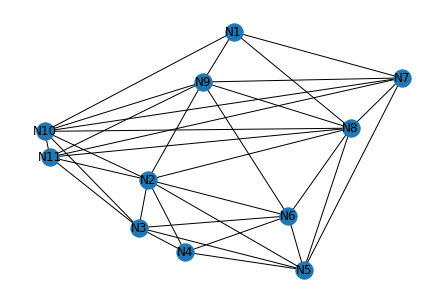

In [26]:
G20 = nx.Graph()
G20.add_nodes_from(["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10","N11"])
pos_G20 = {"N1":(10.02,53.34),
"N2":(8.41,50.07),
"N3":(8.24,49.01),
"N4":(9.11,48.47),
"N5":(11.34,48.08),
"N6":(11.05,49.27),
"N7":(13.18,52.32),
"N8":(12.22,51.21),
"N9":(9.44,52.23),
"N10":(6.47,51.14),
"N11":(6.57,50.57)}

G20.add_edges_from([   
("N1", "N9", {"weight":80.37875226734901}),
("N1", "N10", {"weight":213.50512135352386}),
("N10", "N11", {"weight":39.59799115617073}),
("N10", "N2", {"weight":112.62533336608418}),
("N10", "N3", {"weight":166.6684204008639}),
("N10", "N7", {"weight":298.17766805187176}),
("N10", "N8", {"weight":248.89641906268741}),
("N11", "N2", {"weight":88.15805706561783}),
("N11", "N3", {"weight":130.9285185490055}),
("N11", "N7", {"weight":308.916071395308}),
("N11", "N8", {"weight":249.9629269026716}),
("N2", "N3", {"weight":73.58611619439824}),
("N1", "N7", {"weight":149.44253577934137}),
("N2", "N4", {"weight":114.88864394645024}),
("N2", "N5", {"weight":190.87399445582483}),
("N2", "N6", {"weight":130.25566681974422}),
("N2", "N8", {"weight":184.44490234082517}),
("N3", "N4", {"weight":54.402105064920775}),
("N3", "N5", {"weight":155.56197050136092}),
("N3", "N6", {"weight":128.18908923062693}),
("N4", "N5", {"weight":105.95492865365058}),
("N4", "N6", {"weight":103.98876772823206}),
("N5", "N6", {"weight":83.22401180741088}),
("N1", "N8", {"weight":173.96179838311366}),
("N5", "N7", {"weight":303.82200091110747}),
("N5", "N8", {"weight":219.6678711870004}),
("N6", "N8", {"weight":143.5676618603299}),
("N7", "N8", {"weight":86.92987699155715}),
("N9", "N10", {"weight":147.7308231993121}),
("N9", "N11", {"weight":168.5665775590354}),
("N9", "N2", {"weight":155.6686068416177}),
("N9", "N6", {"weight":216.13182184021676}),
("N9", "N7", {"weight":158.11410524949025}),
("N9", "N8", {"weight":138.1933485892522})
])

nx.draw(G20, pos = pos_G20, with_labels = True)

## pioro40


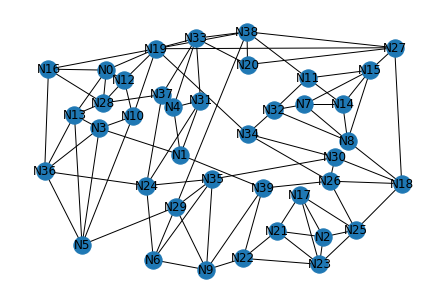

In [28]:
G21 = nx.Graph()
G21.add_nodes_from(["N0","N1","N2","N3","N4","N5","N6","N7","N8","N9","N10","N11","N12","N13","N14","N15","N16",
"N17","N18","N19","N20","N21","N22","N23","N24","N25","N26","N27","N28","N29","N30","N31","N32","N33","N34","N35","N36",
"N37","N38","N39"])
pos_G21 = {"N0":(149,563),
"N1":(286,393),
"N2":(550,228),
"N3":(136,446),
"N4":(273,488),
"N5":(104,212),
"N6":(236,182),
"N7":(515,494),
"N8":(595,421),
"N9":(334,162),
"N10":(198,470),
"N11":(521,547),
"N12":(182,543),
"N13":(90,473),
"N14":(586,494),
"N15":(637,563),
"N16":(42,565),
"N17":(507,313),
"N18":(695,335),
"N19":(241,606),
"N20":(410,574),
"N21":(464,240),
"N22":(402,185),
"N23":(543,173),
"N24":(223,331),
"N25":(610,242),
"N26":(562,340),
"N27":(682,608),
"N28":(143,497),
"N29":(277,288),
"N30":(572,388),
"N31":(323,502),
"N32":(459,483),
"N33":(315,627),
"N34":(410,435),
"N35":(345,344),
"N36":(35,360),
"N37":(252,514),
"N38":(409,640),
"N39":(438,326)}

G21.add_edges_from([   
("N0", "N12", {"weight":2602.0220253293437}),
("N0", "N13", {"weight":6907.925708176589}),
("N0", "N16", {"weight":6526.325829313177}),
("N0", "N19", {"weight":4825.50950354499}),
("N0", "N28", {"weight":4573.124543564293}),
("N1", "N3", {"weight":4176.386035108598}),
("N1", "N4", {"weight":6507.034401850833}),
("N1", "N31", {"weight":6980.624339039574}),
("N1", "N39", {"weight":10819.981778557836}),
("N2", "N17", {"weight":5378.301725384575}),
("N2", "N21", {"weight":3326.054454911116}),
("N2", "N23", {"weight":3821.4982181795895}),
("N2", "N25", {"weight":2457.2518904364842}),
("N3", "N5", {"weight":8656.266197009347}),
("N3", "N10", {"weight":1529.382688190405}),
("N3", "N13", {"weight":1790.4148502364433}),
("N3", "N36", {"weight":6266.978673133283}),
("N4", "N31", {"weight":2565.5414840476406}),
("N4", "N33", {"weight":9647.947820122392}),
("N4", "N37", {"weight":2102.754819925945}),
("N5", "N10", {"weight":8369.390247968497}),
("N5", "N13", {"weight":6875.208774489151}),
("N5", "N29", {"weight":2773.920683583152}),
("N5", "N36", {"weight":7435.9720946775415}),
("N6", "N24", {"weight":10121.837826974323}),
("N6", "N29", {"weight":7010.458085965585}),
("N6", "N35", {"weight":4915.718344035224}),
("N6", "N9", {"weight":6782.258184446974}),
("N7", "N14", {"weight":3285.3433504264813}),
("N7", "N15", {"weight":8859.559605424976}),
("N7", "N32", {"weight":2446.174727197366}),
("N7", "N8", {"weight":3811.6689270148745}),
("N8", "N14", {"weight":5023.339702318171}),
("N8", "N15", {"weight":9137.038380100481}),
("N8", "N18", {"weight":8042.903617847421}),
("N8", "N32", {"weight":1557.944591549665}),
("N9", "N22", {"weight":4864.129414307514}),
("N9", "N29", {"weight":57946.246364012881}),
("N9", "N35", {"weight":11698.620302405421}),
("N9", "N39", {"weight":6061.3429332028345}),
("N10", "N12", {"weight":5095.126582635648}),
("N10", "N19", {"weight":9609.766790897362}),
("N11", "N14", {"weight":3970.651846113309}),
("N11", "N15", {"weight":7641.16933776434}),
("N11", "N32", {"weight":5612.331290670872}),
("N11", "N38", {"weight":5479.869741052467}),
("N12", "N19", {"weight":5186.011407753324}),
("N12", "N28", {"weight":3995.5529094651447}),
("N13", "N28", {"weight":2547.3809245400653}),
("N13", "N36", {"weight":7108.546391276561}),
("N14", "N15", {"weight":5733.086193599598}),
("N15", "N27", {"weight":3638.2286056664407}),
("N16", "N19", {"weight":6065.787446486074}),
("N16", "N28", {"weight":7906.021831178156}),
("N16", "N36", {"weight":10640.247231133746}), 
("N17", "N21", {"weight":4655.186877544335}),
("N17", "N23", {"weight":8945.239528466473}),
("N17", "N25", {"weight":3047.0329163348847}),
("N18", "N25", {"weight":4858.397548853564}),
("N18", "N26", {"weight":8000.37072717835}),
("N18", "N27", {"weight":5972.695569471282}),
("N18", "N30", {"weight":8932.29824981005}),
("N19", "N27", {"weight":2032.8612958825313}),
("N19", "N33", {"weight":1611.6707909085906}),
("N19", "N34", {"weight":9747.949879564076}),
("N19", "N38", {"weight":991.5967818703923}),
("N21", "N22", {"weight":4970.188731893316}),
("N21", "N23", {"weight":6538.474867696891}),
("N22", "N23", {"weight":9747.694474179896}),
("N22", "N39", {"weight":8857.030534042196}),
("N23", "N25", {"weight":5919.449311346789}),
("N24", "N35", {"weight":7469.148558707628}),
("N24", "N36", {"weight":10357.853367567457}),
("N24", "N37", {"weight":10644.920882188526}),
("N25", "N26", {"weight":6187.44600864812}),
("N26", "N30", {"weight":3380.905546299754}),
("N26", "N34", {"weight":8495.116968289693}),
("N26", "N39", {"weight":8406.429784307818}),
("N27", "N38", {"weight":1694.2295990126054}),
("N28", "N37", {"weight":5877.796592669639}),
("N29", "N35", {"weight":4700.316466125857}),
("N29", "N38", {"weight":1777.9506313322377}),
("N30", "N34", {"weight":5271.222116241563}),
("N30", "N35", {"weight":9327.857292396164}),
("N31", "N33", {"weight":8632.938718036048}),
("N32", "N34", {"weight":3047.9306313935076}),
("N33", "N37", {"weight":7913.484782299342}),
("N33", "N38", {"weight":706.5992078961076}),

("N24", "N31", {"weight":6925.499828499676}),
("N20", "N27", {"weight":4007.611032038357}),
("N20", "N33", {"weight":3888.350679793766}),
("N20", "N38", {"weight":4557.073046973551})


])
nx.draw(G21, pos = pos_G21, with_labels = True)

## polska

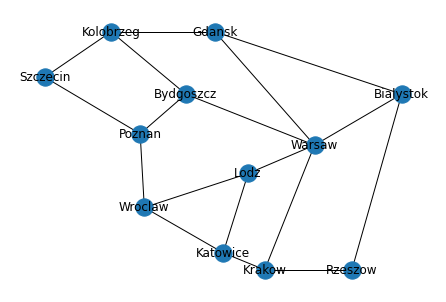

In [29]:
G22 = nx.Graph()
G22.add_nodes_from(["Gdansk","Bydgoszcz","Kolobrzeg","Katowice","Krakow","Bialystok","Lodz","Poznan","Rzeszow","Szczecin",
"Warsaw","Wroclaw"])
pos_G22 = {"Gdansk":(18.6,54.2),
"Bydgoszcz":(17.9,53.1),
"Kolobrzeg":(16.1,54.2),
"Katowice":(18.8,50.3),
"Krakow":(19.8,50),
"Bialystok":(23.1,53.1),
"Lodz":(19.4,51.7),
"Poznan":(16.8,52.4),
"Rzeszow":(21.9,50),
"Szczecin":(14.5,53.4),
"Warsaw":(21,52.2),
"Wroclaw":(16.9,51.1)}


G22.add_edges_from([   
("Gdansk", "Warsaw", {"weight":170.0506303931741}),
("Gdansk", "Kolobrzeg", {"weight":100.97012431860307}),
("Bydgoszcz", "Kolobrzeg", {"weight":105.8027021987585}),
("Bydgoszcz", "Poznan", {"weight":66.70472912735819}),
("Bydgoszcz", "Warsaw", {"weight":143.12044664792903}),
("Kolobrzeg", "Szczecin", {"weight":85.48669432634667}),
("Katowice", "Krakow", {"weight":48.85299811773259}),
("Katowice", "Lodz", {"weight":100.12044664792903}),
("Katowice", "Wroclaw", {"weight":99.77424377899725}),
("Krakow", "Rzeszow", {"weight":93.2016560183804}),
("Krakow", "Warsaw", {"weight":160.56358292676444}),
("Bialystok", "Rzeszow", {"weight":220.15396058859042}),
("Bialystok", "Warsaw", {"weight":107.69805522575662}),
("Lodz", "Warsaw", {"weight":76.34200308155783}),
("Lodz", "Wroclaw", {"weight":115.38039234552994}),
("Poznan", "Szczecin", {"weight":118.0771108417047}),
("Poznan", "Wroclaw", {"weight":89.86410356282771}),
("Gdansk", "Bialystok", {"weight":81.17493816945749})
])

nx.draw(G22, pos = pos_G22, with_labels = True)

## sun


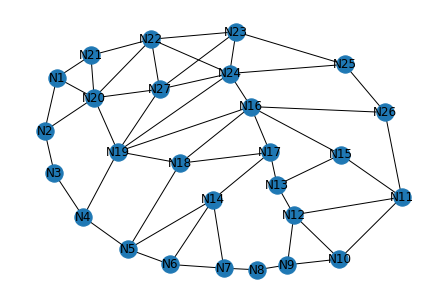

In [30]:
G23 = nx.Graph()
G23.add_nodes_from(["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10","N11","N12","N13","N14","N15","N16",
"N17","N18","N19","N20","N21","N22","N23","N24","N25","N26","N27"])
pos_G23 = {"N1":(86,534),
"N2":(67,405),
"N3":(82,303),
"N4":(127,197),
"N5":(197,119),
"N6":(262,82),
"N7":(346,73),
"N8":(398,69),
"N9":(445,81),
"N10":(526,95),
"N11":(623,245),
"N12":(455,202),
"N13":(429,274),
"N14":(329,239),
"N15":(528,348),
"N16":(388,464),
"N17":(418,353),
"N18":(278,327),
"N19":(181,355),
"N20":(144,485),
"N21":(139,588),
"N22":(233,627),
"N23":(365,645),
"N24":(355,544),
"N25":(534,566),
"N26":(597,450),
"N27":(246,506)}

G23.add_edges_from([   
("N1", "N2", {"weight":8715.826712318141}),
("N1", "N20", {"weight":4638.337798641265}),
("N1", "N21", {"weight":4913.95490444249}),
("N2", "N3", {"weight":7096.048300842766}),
("N2", "N20", {"weight":4197.516941297746}),
("N7", "N8", {"weight":1160.350589960671}),
("N7", "N14", {"weight":11359.66292306653}),
("N8", "N9", {"weight":1118.203268470592}),
("N9", "N10", {"weight":755.9982540127195}),
("N9", "N12", {"weight":8344.645653794372}),
("N10", "N11", {"weight":10712.202407845956}),
("N10", "N12", {"weight":7615.726482460658}),
("N11", "N12", {"weight":6387.549113642428}),
("N11", "N15", {"weight":5318.686870669254}),
("N11", "N26", {"weight":10702.43999755632}),
("N12", "N13", {"weight":4944.196760843301}),
("N13", "N15", {"weight":5430.9094481913535}),
("N13", "N17", {"weight":5459.918057280726}),
("N14", "N17", {"weight":5835.768150905682}),
("N15", "N16", {"weight":6295.279152753611}),
("N16", "N17", {"weight":8101.19138988553}),
("N16", "N18", {"weight":8101.19138988553}),
("N16", "N19", {"weight":5697.8936685127455}),
("N16", "N24", {"weight":5679.7441916630605}),
("N16", "N26", {"weight":966.6719997792799}),
("N17", "N18", {"weight":8619.993946694776}),
("N18", "N19", {"weight":6429.446718843195}),
("N19", "N20", {"weight":8413.64747178722}),
("N3", "N4", {"weight":6702.50814371289}),
("N4", "N19", {"weight":8445.172525200189}),
("N4", "N5", {"weight":6599.246977686423}),
("N5", "N6", {"weight":2286.4002784704244}),
("N5", "N14", {"weight":10803.178614589011}),
("N5", "N18", {"weight":8470.860562643607}),
("N6", "N7", {"weight":1240.3671599425518}),
("N6", "N14", {"weight":11721.383328323127}),
("N19", "N24", {"weight":418.7364900333655}),
("N19", "N27", {"weight":7832.725490093667}),
("N20", "N21", {"weight":7117.874841589587}),
("N20", "N22", {"weight":10000.626554808809}),
("N20", "N27", {"weight":4760.791467661348}),
("N21", "N22", {"weight":2920.422168736155}),
("N22", "N23", {"weight":1525.8704169625175}),
("N22", "N24", {"weight":6048.133807159863}),
("N22", "N27", {"weight":8359.942514181652}),
("N23", "N24", {"weight":6958.0457537364155}),
("N23", "N25", {"weight":3405.701265816263}),
("N23", "N27", {"weight":7999.634198110336}),
("N24", "N25", {"weight":10356.119768854323}),
("N24", "N27", {"weight":7454.027489575482}),
("N25", "N26", {"weight":8009.567998171178})
])

nx.draw(G23, pos = pos_G23, with_labels = True)

## ta1

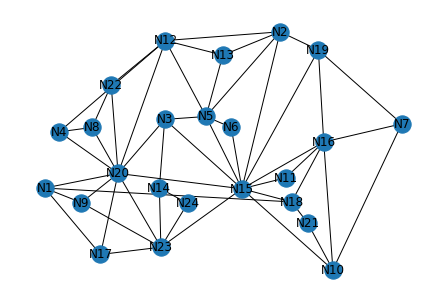

In [31]:
G24 = nx.Graph()
G24.add_nodes_from(["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10","N11","N12","N13","N14","N15","N16",
"N17","N18","N19","N20","N21","N22","N23","N24"])
pos_G24 ={"N1":(167,208),
"N2":(475,422),
"N3":(324,302),
"N4":(186,285),
"N5":(378,306),
"N6":(411,291),
"N7":(634,296),
"N8":(229,291),
"N9":(215,188),
"N10":(544,96),
"N11":(482,222),
"N12":(325,410),
"N13":(400,390),
"N14":(317,208),
"N15":(425,207),
"N16":(532,271),
"N17":(240,117),
"N18":(490,189),
"N19":(525,397),
"N20":(263,228),
"N21":(511,160),
"N22":(254,349),
"N23":(319,127),
"N24":(354,187)}

G24.add_edges_from([   
("N20", "N3", {"weight":4330.7933893949885}),
("N20", "N4", {"weight":3262.172279806289}),
("N20", "N12", {"weight":9698.640641196613}),
("N20", "N15", {"weight":7130.988565222907}),
("N17", "N20", {"weight":7767.18691729303}),
("N20", "N22", {"weight":8317.589157018594}),
("N20", "N23", {"weight":7706.583610139463}),
("N21", "N10", {"weight":4488.528732020817}),
("N23", "N9", {"weight":7235.731848353628}),
("N23", "N14", {"weight":5594.184524422584}),
("N23", "N24", {"weight":4620.871811370461}),
("N24", "N14", {"weight":2816.4539973478477}),
("N2", "N12", {"weight":4521.152934836839}),
("N2", "N15", {"weight":9117.524357416305}),
("N3", "N14", {"weight":6476.682515616256}),
("N3", "N15", {"weight":4255.721006797229}),
("N4", "N8", {"weight":977.9149796376989}),
("N3", "N5", {"weight":2046.438374219324}),
("N5", "N6", {"weight":1467.9795817991494}),
("N5", "N15", {"weight":6174.324484075227}),
("N6", "N15", {"weight":5762.282360308366}),
("N8", "N22", {"weight":4156.75384487603}),
("N10", "N15", {"weight":8270.503236080835}),
("N11", "N15", {"weight":3339.3631333555873}),
("N15", "N16", {"weight":4330.118753993268}),
("N17", "N1", {"weight":7424.3163841738815}),
("N18", "N1", {"weight":2738.0226713598413}),
("N18", "N21", {"weight":2458.9691711064597}),
("N2", "N19", {"weight":2722.720582432205}),
("N15", "N19", {"weight":6808.599930234196}),
("N15", "N18", {"weight":4398.939321007338}),
("N1", "N9", {"weight":3412.9447189337875}),
("N1", "N20", {"weight":5062.17385061006}),
("N12", "N22", {"weight":5979.748096142352}),
("N8", "N20", {"weight":4165.744868691211}),
("N2", "N5", {"weight":9557.144124934732}),
("N5", "N12", {"weight":7809.446887104703}),
("N11", "N16", {"weight":3359.001081082373}),
("N18", "N16", {"weight":5644.242142794549}),
("N16", "N10", {"weight":12081.595168830383}),
("N16", "N19", {"weight":8700.556064843526}),
("N9", "N20", {"weight":3925.513920237542}),
("N15", "N23", {"weight":8333.323374233087}),
("N7", "N19", {"weight":3980.062929871541}),
("N4", "N12", {"weight":10353.045669062252}),
("N12", "N13", {"weight":4017.9263913825994}),
("N5", "N13", {"weight":5947.225340401065}),
("N2", "N13", {"weight":3925.9922540226826}),
("N7", "N16", {"weight":1810.776110131464}),
("N17", "N23", {"weight":2776.1835532923596}),
("N3", "N5", {"weight":2046.438374219324}),
("N10", "N7", {"weight":10589.456586276017}),
("N11", "N16", {"weight":3359.001081082373}),
("N17", "N20", {"weight":7767.18691729303}),
("N18", "N16", {"weight":5644.242142794549})
])

nx.draw(G24, pos = pos_G24, with_labels = True)

## ta2


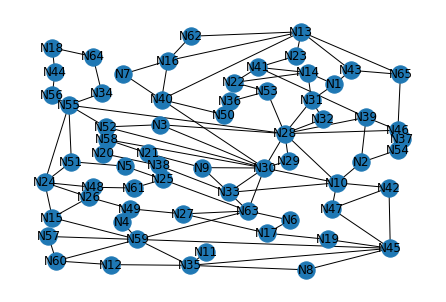

In [32]:
G25 = nx.Graph()
G25.add_nodes_from(["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10","N11","N12","N13","N14","N15","N16",
"N17","N18","N19","N20","N21","N22","N23","N24","N25","N26","N27","N28","N29","N30","N31","N32","N33","N34","N35","N36",
"N37","N38","N39","N40","N41","N42","N43","N44","N45","N46","N47","N48","N49","N50","N51","N52","N53","N54","N55","N56",
"N57","N58","N59","N60","N61","N62","N63","N64","N65"])

pos_G25={"N1":(243,574),
"N2":(264,363),
"N3":(106,465),
"N4":(76,202),
"N5":(78,353),
"N6":(208,207),
"N7":(77,602),
"N8":(221,73),
"N9":(139,349),
"N10":(245,308),
"N11":(142,121),
"N12":(67,87),
"N13":(217,716),
"N14":(222,606),
"N15":(21,214),
"N16":(112,638),
"N17":(190,172),
"N18":(21,673),
"N19":(238,155),
"N20":(61,387),
"N21":(96,388),
"N22":(164,579),
"N23":(213,651),
"N24":(15,309),
"N25":(108,317),
"N26":(50,269),
"N27":(124,224),
"N28":(204,441),
"N29":(207,368),
"N30":(188,348),
"N31":(225,531),
"N32":(234,480),
"N33":(160,282),
"N34":(60,550),
"N35":(129,85),
"N36":(161,528),
"N37":(296,427),
"N38":(105,355),
"N39":(268,485),
"N40":(107,533),
"N41":(183,620),
"N42":(286,295),
"N43":(256,612),
"N44":(23,607),
"N45":(287,131),
"N46":(293,450),
"N47":(241,238),
"N48":(53,296),
"N49":(82,238),
"N50":(156,492),
"N51":(36,365),
"N52":(63,459),
"N53":(190,555),
"N54":(293,397),
"N55":(34,518),
"N56":(21,544),
"N57":(18,163),
"N58":(64,425),
"N59":(88,155),
"N60":(24,97),
"N61":(85,294),
"N62":(130,704),
"N63":(175,232),
"N64":(53,649),
"N65":(295,601)}


G25.add_edges_from([   
("N1", "N31", {"weight":3194.761108485012}),   
("N3", "N30", {"weight":7157.112476462884}),
("N5", "N51", {"weight":3010.462679634795}),
("N5", "N25", {"weight":3081.0140067753428}),
("N8", "N35", {"weight":1233.6141765096208}),
("N8", "N45", {"weight":3447.6084292954197}),
("N9", "N30", {"weight":3311.784558730917}),
("N10", "N30", {"weight":4180.135461766517}),
("N10", "N42", {"weight":1686.0698701325446}),
("N10", "N2", {"weight":3957.202695201186}),
("N13", "N23", {"weight":4491.920484688318}),
("N13", "N62", {"weight":5939.488190254787}),
("N14", "N22", {"weight":2904.316905626613}),
("N14", "N1", {"weight":2371.481810089605}),
("N15", "N59", {"weight":5987.6827653490045}),
("N16", "N7", {"weight":2405.060057824018}),
("N17", "N19", {"weight":3366.0492590198915}),
("N17", "N6", {"weight":2700.271859290532}),
("N18", "N64", {"weight":1959.6490129022982}),
("N18", "N44", {"weight":4556.46498697173}),
("N19", "N45", {"weight":3096.322845481349}),
("N21", "N58", {"weight":2907.163615180222}),
("N21", "N9", {"weight":3937.3190337915385}),
("N22", "N41", {"weight":2875.0222931355197}),
("N24", "N51", {"weight":4062.215442996475}),
("N24", "N48", {"weight":1634.2241234106896}),
("N24", "N26", {"weight":2749.6724399628392}),
("N25", "N61", {"weight":1812.6457592277889}),
("N26", "N15", {"weight":3806.3945132686385}),
("N27", "N49", {"weight":2020.5559610319776}),
("N27", "N17", {"weight":5445.731224440342}),
("N28", "N32", {"weight":2626.3012711311208}),
("N28", "N30", {"weight":6444.950421926831}),
("N28", "N29", {"weight":5041.382244341413}),
("N28", "N31", {"weight":6173.719645517108}),
("N29", "N30", {"weight":1899.5949276357835}),
("N31", "N32", {"weight":3552.302095202819}),
("N33", "N9", {"weight":4684.296946118207}),
("N33", "N10", {"weight":2662.546657503666}),
("N33", "N38", {"weight":5401.353704774598}),
("N33", "N30", {"weight":4659.676008899063}),
("N34", "N55", {"weight":2825.3699758503158}),
("N34", "N64", {"weight":6826.181270579275}),
("N35", "N12", {"weight":308.0039275681518}),
("N35", "N11", {"weight":2477.974024909505}),
("N36", "N50", {"weight":2502.4427471250287}),
("N37", "N54", {"weight":2074.8212481402347}),
("N37", "N46", {"weight":1588.1039996373886}),
("N38", "N25", {"weight":2630.2334618371037}),
("N38", "N20", {"weight":3673.8179002436646}),
("N39", "N41", {"weight":9869.863410393005}),
("N39", "N2", {"weight":8417.350292523854}),
("N40", "N7", {"weight":5025.735789064617}),
("N40", "N50", {"weight":6472.34639766835}),
("N41", "N23", {"weight":2075.557592235217}),
("N42", "N45", {"weight":11323.266064446563}),
("N43", "N1", {"weight":2665.7332201649124}),
("N43", "N13", {"weight":6903.095915647323}),
("N44", "N56", {"weight":4351.0781985147205}),
("N45", "N35", {"weight":2513.616389763223}),
("N47", "N42", {"weight":3617.674021677005}),
("N47", "N45", {"weight":7835.986869359441}),
("N48", "N61", {"weight":933.3735203372412}),
("N49", "N4", {"weight":2503.787272098682}),
("N49", "N26", {"weight":2151.258189575908}),
("N52", "N3", {"weight":716.4885027437551}),
("N52", "N30", {"weight":6680.585958595832}),
("N53", "N28", {"weight":7852.055708671473}),
("N53", "N22", {"weight":2286.5394677598338}),
("N53", "N36", {"weight":2721.666561797729}),
("N54", "N2", {"weight":2982.4515755509738}),
("N55", "N52", {"weight":4157.243424296378}),
("N55", "N56", {"weight":1998.5650677757876}),
("N55", "N51", {"weight":10559.446766823401}),
("N58", "N30", {"weight":7927.323878155917}),
("N58", "N20", {"weight":2627.1383328151096}),
("N59", "N45", {"weight":7186.380105229659}),
("N59", "N4", {"weight":3343.4610069492533}),
("N59", "N57", {"weight":4499.5732905794675}),
("N60", "N57", {"weight":4559.932375306838}),
("N60", "N12", {"weight":650.283994889166}),
("N62", "N16", {"weight":4585.478515778972}),
("N63", "N25", {"weight":4751.077725446968}),
("N63", "N27", {"weight":2368.297474427664}),
("N63", "N33", {"weight":3429.820748387228}),
("N63", "N6", {"weight":2425.9268293076825}),
("N65", "N46", {"weight":10426.247997619377}),
("N65", "N43", {"weight":1278.4251620481227}),
("N3", "N28", {"weight":1127.4082892491137}),
("N10", "N28", {"weight":9313.18404955723}),
("N10", "N47", {"weight":4830.013622106212}),
("N31", "N14", {"weight":5180.8547471518905}),
("N14", "N41", {"weight":1197.2552687042241}),
("N16", "N13", {"weight":6083.17026000927}),
("N24", "N15", {"weight":6548.211146020997}),
("N39", "N28", {"weight":2739.1389070923133}),
("N39", "N46", {"weight":2416.6799994481976}),
("N40", "N13", {"weight":4883.251662722949}),
("N40", "N16", {"weight":7247.8872490679}),
("N40", "N30", {"weight":6919.1271776625435}),
("N46", "N28", {"weight":621.4319998581104}),
("N55", "N24", {"weight":10180.449653360636}),
("N55", "N28", {"weight":4083.994343367803}),
("N59", "N35", {"weight":4751.47388071132}),
("N59", "N60", {"weight":4288.07370717503}),
("N63", "N30", {"weight":7941.909702696117}),
("N63", "N59", {"weight":7435.607188543414}),
("N65", "N13", {"weight":6370.793899035438})
])

nx.draw(G25, pos = pos_G25, with_labels = True)

## zib54


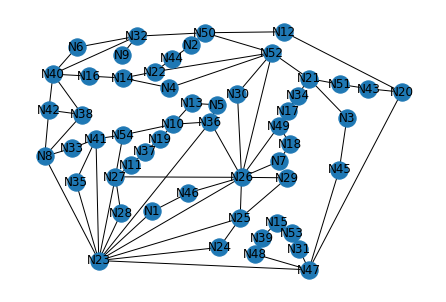

In [33]:
G26 = nx.Graph()
G26.add_nodes_from(["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10","N11","N12","N13","N14","N15","N16",
"N17","N18","N19","N20","N21","N22","N23","N24","N25","N26","N27","N28","N29","N30","N31","N32","N33","N34","N35","N36",
"N37","N38","N39","N40","N41","N42","N43","N44","N45","N46","N47","N48","N49","N50","N51","N52","N53","N54"])
pos_G26 = {"N1":(218,239),
"N2":(274,580),
"N3":(499,431),
"N4":(243,493),
"N5":(312,458),
"N6":(109,576),
"N7":(401,342),
"N8":(63,352),
"N9":(175,561),
"N10":(248,418),
"N11":(188,334),
"N12":(408,608),
"N13":(275,461),
"N14":(176,513),
"N15":(398,216),
"N16":(127,517),
"N17":(414,446),
"N18":(417,377),
"N19":(229,387),
"N20":(578,484),
"N21":(444,512),
"N22":(222,526),
"N23":(141,138),
"N24":(315,165),
"N25":(345,225),
"N26":(347,309),
"N27":(165,310),
"N28":(173,235),
"N29":(413,308),
"N30":(341,481),
"N31":(430,162),
"N32":(196,599),
"N33":(103,369),
"N34":(428,477),
"N35":(108,300),
"N36":(302,423),
"N37":(207,362),
"N38":(117,438),
"N39":(376,185),
"N40":(75,521),
"N41":(137,388),
"N42":(69,447),
"N43":(530,491),
"N44":(247,553),
"N45":(488,325),
"N46":(270,277),
"N47":(444,119),
"N48":(367,151),
"N49":(401,415),
"N50":(294,606),
"N51":(489,500),
"N52":(391,565),
"N53":(420,195),
"N54":(176,396)}

G26.add_edges_from([   
("N1", "N23", {"weight":8228.698471317202}),
("N3", "N21", {"weight":5095.647999489386}),
("N3", "N45", {"weight":7339.268590102725}),
("N6", "N32", {"weight":8193.2623907472}),
("N6", "N40", {"weight":11855.81264408437}),
("N7", "N26", {"weight":3357.891904586295}),
("N8", "N23", {"weight":7198.158157181617}),
("N8", "N38", {"weight":6274.114567805533}),
("N8", "N42", {"weight":6560.687502764586}),
("N10", "N19", {"weight":2330.557584690513}),
("N11", "N27", {"weight":2058.8004416416034}),
("N11", "N37", {"weight":2312.2188967828456}),
("N12", "N50", {"weight":2642.780616386159}),
("N13", "N5", {"weight":458.8234008396526}),
("N13", "N10", {"weight":1499.9581755012327}),
("N14", "N4", {"weight":3817.4798196992892}),
("N14", "N16", {"weight":3060.076657908449}),
("N15", "N39", {"weight":9883.374394517987}),
("N15", "N53", {"weight":1985.5291726559828}),
("N16", "N40", {"weight":6017.109138168367}),
("N18", "N7", {"weight":4805.830028745549}),
("N18", "N49", {"weight":2757.4991360952913}),
("N20", "N12", {"weight":11541.542624697899}),
("N20", "N43", {"weight":2030.4268476339194}),
("N21", "N51", {"weight":2674.618455609862}),
("N22", "N44", {"weight":2529.7441696551714}),
("N23", "N25", {"weight":11213.506371594443}),
("N23", "N26", {"weight":6609.276497528455}),
("N23", "N27", {"weight":11159.336478963878}),
("N23", "N28", {"weight":6957.048529936745}),
("N24", "N23", {"weight":8474.382684331731}),
("N24", "N25", {"weight":4549.555922472016}),
("N25", "N26", {"weight":5798.953640458758}),
("N27", "N26", {"weight":5453.798842245024}),
("N27", "N28", {"weight":5163.89702839963}),
("N29", "N25", {"weight":4611.609217370743}),
("N29", "N26", {"weight":2737.554101613716}),
("N30", "N26", {"weight":11827.885702307167}),
("N31", "N47", {"weight":3047.680264723467}),
("N31", "N53", {"weight":2378.0457621980504}),
("N32", "N9", {"weight":2822.728815165932}),
("N33", "N41", {"weight":2569.2644085846114}),
("N34", "N17", {"weight":2133.251201578136}),
("N35", "N23", {"weight":10565.254189172461}),
("N35", "N41", {"weight":6295.239446009859}),
("N36", "N5", {"weight":2410.051325709873}),
("N36", "N10", {"weight":1811.1496689537923}),
("N36", "N23", {"weight":1640.990148231984}),
("N36", "N26", {"weight":8242.125025510892}),
("N37", "N19", {"weight":2258.185438352785}),
("N39", "N48", {"weight":2422.4781668655396}),
("N41", "N23", {"weight":7588.552858281941}),
("N42", "N38", {"weight":706.6881068996452}),
("N42", "N40", {"weight":5108.4362916809505}),
("N43", "N51", {"weight":2084.1652521072674}),
("N44", "N2", {"weight":2481.4466585061577}),
("N46", "N1", {"weight":2464.6668833303825}),
("N46", "N26", {"weight":2619.9977899277424}),
("N47", "N20", {"weight":3972.747262120769}),
("N47", "N23", {"weight":2665.6399562613774}),
("N47", "N45", {"weight":9800.474671858452}),
("N47", "N48", {"weight":4053.62876584461}),
("N49", "N17", {"weight":2148.351940378684}),
("N49", "N26", {"weight":7948.43991883588}),
("N50", "N2", {"weight":1958.0083303924253}),
("N50", "N32", {"weight":2835.8064965418434}),
("N52", "N4", {"weight":10111.066670655484}),
("N52", "N21", {"weight":5078.4802959873705}),
("N52", "N22", {"weight":11385.980943129249}),
("N52", "N26", {"weight":6538.474867696891}),
("N52", "N30", {"weight":6460.600449314444}),
("N52", "N50", {"weight":4836.995507050684}),
("N54", "N10", {"weight":3513.145309991325}),
("N54", "N41", {"weight":2333.1496260923427}),
("N27", "N54", {"weight":5976.006701645354}),
("N33", "N8", {"weight":2991.4760913246078}),
("N38", "N40", {"weight":5529.0019872613875}),
("N40", "N32", {"weight":8423.666405528456}),
("N22", "N14", {"weight":3088.7475847723385}),
("N34", "N21", {"weight":2521.8016584723096})
])

nx.draw(G26, pos = pos_G26, with_labels = True)

In [34]:
def dist_euclidean_G1(p1, p2):  #点P1 P2的欧几里得距离 pos:position a*的启发式方程
    x1, y1 = pos_G1[p1]
    x2, y2 = pos_G1[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G2(p1, p2):
    x1, y1 = pos_G2[p1]
    x2, y2 = pos_G2[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G3(p1, p2):
    x1, y1 = pos_G3[p1]
    x2, y2 = pos_G3[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G4(p1, p2):
    x1, y1 = pos_G4[p1]
    x2, y2 = pos_G4[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G5(p1, p2):
    x1, y1 = pos_G5[p1]
    x2, y2 = pos_G5[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G6(p1, p2):
    x1, y1 = pos_G6[p1]
    x2, y2 = pos_G6[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G7(p1, p2):
    x1, y1 = pos_G7[p1]
    x2, y2 = pos_G7[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G8(p1, p2):
    x1, y1 = pos_G8[p1]
    x2, y2 = pos_G8[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G9(p1, p2):
    x1, y1 = pos_G9[p1]
    x2, y2 = pos_G9[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G10(p1, p2):
    x1, y1 = pos_G10[p1]
    x2, y2 = pos_G10[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G11(p1, p2):
    x1, y1 = pos_G11[p1]
    x2, y2 = pos_G11[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G12(p1, p2):
    x1, y1 = pos_G12[p1]
    x2, y2 = pos_G12[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G13(p1, p2):
    x1, y1 = pos_G13[p1]
    x2, y2 = pos_G13[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G14(p1, p2):
    x1, y1 = pos_G14[p1]
    x2, y2 = pos_G14[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G15(p1, p2):
    x1, y1 = pos_G15[p1]
    x2, y2 = pos_G15[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G16(p1, p2):
    x1, y1 = pos_G16[p1]
    x2, y2 = pos_G16[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G17(p1, p2):
    x1, y1 = pos_G17[p1]
    x2, y2 = pos_G17[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G18(p1, p2):
    x1, y1 = pos_G18[p1]
    x2, y2 = pos_G18[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G19(p1, p2):
    x1, y1 = pos_G19[p1]
    x2, y2 = pos_G19[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G20(p1, p2):
    x1, y1 = pos_G20[p1]
    x2, y2 = pos_G20[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G21(p1, p2):
    x1, y1 = pos_G21[p1]
    x2, y2 = pos_G21[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G22(p1, p2):
    x1, y1 = pos_G22[p1]
    x2, y2 = pos_G22[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G23(p1, p2):
    x1, y1 = pos_G23[p1]
    x2, y2 = pos_G23[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G24(p1, p2):
    x1, y1 = pos_G24[p1]
    x2, y2 = pos_G24[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G25(p1, p2):
    x1, y1 = pos_G25[p1]
    x2, y2 = pos_G25[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

def dist_euclidean_G26(p1, p2):
    x1, y1 = pos_G26[p1]
    x2, y2 = pos_G26[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

    

# Storing all pairs in our lists for the algorithms

In [35]:
for k in range(1,27):
    exec(f'DG_{k} = []')  #The variables will be DG_1, DG_2 etc..
    
for k in range(1,27):
    exec(f'HG1_{k} = []')    
    
for k in range(1,27):
    exec(f'HG2_{k} = []') 

for k in range(1,27):
    exec(f'HG3_{k} = []')

for k in range(1,27):
    exec(f'HG4_{k} = []')
    
for k in range(1,27):
    exec(f'A_{k} = []') 


In [36]:
# for dijkstra we might need to specify some argument for it to take into account the weightings

for i in list(G1.nodes):
    for j in list(G1.nodes):
        DG_1.append(nx.dijkstra_path(G1, i, j, weight="weight")) 
        
for i in list(G2.nodes):
    for j in list(G2.nodes):
        DG_2.append(nx.dijkstra_path(G2, i, j, weight="weight"))
        
for i in list(G3.nodes):
    for j in list(G3.nodes):
        DG_3.append(nx.dijkstra_path(G3, i, j, weight="weight"))
        
for i in list(G4.nodes):
    for j in list(G4.nodes):
        DG_4.append(nx.dijkstra_path(G4, i, j, weight="weight"))

for i in list(G5.nodes):
    for j in list(G5.nodes):
        DG_5.append(nx.dijkstra_path(G5, i, j, weight="weight"))
        
for i in list(G6.nodes):
    for j in list(G6.nodes):
        DG_6.append(nx.dijkstra_path(G6, i, j, weight="weight"))
for i in list(G7.nodes):
    for j in list(G7.nodes):
        DG_7.append(nx.dijkstra_path(G7, i, j, weight="weight"))
for i in list(G8.nodes):
    for j in list(G8.nodes):
        DG_8.append(nx.dijkstra_path(G8, i, j, weight="weight"))
for i in list(G9.nodes):
    for j in list(G9.nodes):
        DG_9.append(nx.dijkstra_path(G9, i, j, weight="weight"))
for i in list(G10.nodes):
    for j in list(G10.nodes):
        DG_10.append(nx.dijkstra_path(G10, i, j, weight="weight"))
for i in list(G11.nodes):
    for j in list(G11.nodes):
        DG_11.append(nx.dijkstra_path(G11, i, j, weight="weight"))
for i in list(G12.nodes):
    for j in list(G12.nodes):
        DG_12.append(nx.dijkstra_path(G12, i, j, weight="weight"))
for i in list(G13.nodes):
    for j in list(G13.nodes):
        DG_13.append(nx.dijkstra_path(G13, i, j, weight="weight"))
for i in list(G14.nodes):
    for j in list(G14.nodes):
        DG_14.append(nx.dijkstra_path(G14, i, j, weight="weight"))
for i in list(G15.nodes):
    for j in list(G15.nodes):
        DG_15.append(nx.dijkstra_path(G15, i, j, weight="weight"))
for i in list(G16.nodes):
    for j in list(G16.nodes):
        DG_16.append(nx.dijkstra_path(G16, i, j, weight="weight"))
for i in list(G17.nodes):
    for j in list(G17.nodes):
        DG_17.append(nx.dijkstra_path(G17, i, j, weight="weight"))
for i in list(G18.nodes):
    for j in list(G18.nodes):
        DG_18.append(nx.dijkstra_path(G18, i, j, weight="weight"))
for i in list(G19.nodes):
    for j in list(G19.nodes):
        DG_19.append(nx.dijkstra_path(G19, i, j, weight="weight"))
for i in list(G20.nodes):
    for j in list(G20.nodes):
        DG_20.append(nx.dijkstra_path(G20, i, j, weight="weight"))
for i in list(G21.nodes):
    for j in list(G21.nodes):
        DG_21.append(nx.dijkstra_path(G21, i, j, weight="weight"))
for i in list(G22.nodes):
    for j in list(G22.nodes):
        DG_22.append(nx.dijkstra_path(G22, i, j, weight="weight"))
for i in list(G23.nodes):
    for j in list(G23.nodes):
        DG_23.append(nx.dijkstra_path(G23, i, j, weight="weight"))

for i in list(G24.nodes):
    for j in list(G24.nodes):
        DG_24.append(nx.dijkstra_path(G24, i, j, weight="weight"))

for i in list(G25.nodes):
    for j in list(G25.nodes):
        DG_25.append(nx.dijkstra_path(G25, i, j, weight="weight"))
for i in list(G26.nodes):
    for j in list(G26.nodes):
        DG_26.append(nx.dijkstra_path(G26, i, j, weight="weight"))

In [37]:

for i in list(G1.nodes):
    for j in list(G1.nodes):
        HG1_1.append(Human_gaze_algorithm_backtracking(G1, i, j, pos_G1))
        
for i in list(G2.nodes):
    for j in list(G2.nodes):
        HG1_2.append(Human_gaze_algorithm_backtracking(G2, i, j, pos_G2))
        
for i in list(G3.nodes):
    for j in list(G3.nodes):
        HG1_3.append(Human_gaze_algorithm_backtracking(G3, i, j, pos_G3))
        
for i in list(G4.nodes):
    for j in list(G4.nodes):
        HG1_4.append(Human_gaze_algorithm_backtracking(G4, i, j, pos_G4))
        
for i in list(G5.nodes):
    for j in list(G5.nodes):
        HG1_5.append(Human_gaze_algorithm_backtracking(G5, i, j, pos_G5))

for i in list(G6.nodes):
    for j in list(G6.nodes):
        HG1_6.append(Human_gaze_algorithm_backtracking(G6, i, j, pos_G6))

for i in list(G7.nodes):
    for j in list(G7.nodes):
        HG1_7.append(Human_gaze_algorithm_backtracking(G7, i, j, pos_G7))

for i in list(G8.nodes):
    for j in list(G8.nodes):
        HG1_8.append(Human_gaze_algorithm_backtracking(G8, i, j, pos_G8))

for i in list(G9.nodes):
    for j in list(G9.nodes):
        HG1_9.append(Human_gaze_algorithm_backtracking(G9, i, j, pos_G9))


for i in list(G10.nodes):
    for j in list(G10.nodes):
        HG1_10.append(Human_gaze_algorithm_backtracking(G10, i, j, pos_G10))

for i in list(G11.nodes):
    for j in list(G11.nodes):
        HG1_11.append(Human_gaze_algorithm_backtracking(G11, i, j, pos_G11))


for i in list(G12.nodes):
    for j in list(G12.nodes):
        HG1_12.append(Human_gaze_algorithm_backtracking(G12, i, j, pos_G12))


for i in list(G13.nodes):
    for j in list(G13.nodes):
        HG1_13.append(Human_gaze_algorithm_backtracking(G13, i, j, pos_G13))

for i in list(G14.nodes):
    for j in list(G14.nodes):
        HG1_14.append(Human_gaze_algorithm_backtracking(G14, i, j, pos_G14))

for i in list(G15.nodes):
    for j in list(G15.nodes):
        HG1_15.append(Human_gaze_algorithm_backtracking(G15, i, j, pos_G15))

for i in list(G16.nodes):
    for j in list(G16.nodes):
        HG1_16.append(Human_gaze_algorithm_backtracking(G16, i, j, pos_G16))

for i in list(G17.nodes):
    for j in list(G17.nodes):
        HG1_17.append(Human_gaze_algorithm_backtracking(G17, i, j, pos_G17))

for i in list(G18.nodes):
    for j in list(G18.nodes):
        HG1_18.append(Human_gaze_algorithm_backtracking(G18, i, j, pos_G18))

for i in list(G19.nodes):
    for j in list(G19.nodes):
        HG1_19.append(Human_gaze_algorithm_backtracking(G19, i, j, pos_G19))

for i in list(G20.nodes):
    for j in list(G20.nodes):
        HG1_20.append(Human_gaze_algorithm_backtracking(G20, i, j, pos_G20))

for i in list(G21.nodes):
    for j in list(G21.nodes):
        HG1_21.append(Human_gaze_algorithm_backtracking(G21, i, j, pos_G21))
for i in list(G22.nodes):
    for j in list(G22.nodes):
        HG1_22.append(Human_gaze_algorithm_backtracking(G22, i, j, pos_G22))

for i in list(G23.nodes):
    for j in list(G23.nodes):
        HG1_23.append(Human_gaze_algorithm_backtracking(G23, i, j, pos_G23))

for i in list(G24.nodes):
    for j in list(G24.nodes):
        HG1_24.append(Human_gaze_algorithm_backtracking(G24, i, j, pos_G24))

for i in list(G25.nodes):
    for j in list(G25.nodes):
        HG1_25.append(Human_gaze_algorithm_backtracking(G25, i, j, pos_G25))

for i in list(G26.nodes):
    for j in list(G26.nodes):
        HG1_26.append(Human_gaze_algorithm_backtracking(G26, i, j, pos_G26))

In [38]:
for i in list(G1.nodes):
    for j in list(G1.nodes):
        HG2_1.append(Human_gaze_algorithm_2_backtracking(G1, i, j, pos_G1))
        
for i in list(G2.nodes):
    for j in list(G2.nodes):
        HG2_2.append(Human_gaze_algorithm_2_backtracking(G2, i, j, pos_G2))
        
for i in list(G3.nodes):
    for j in list(G3.nodes):
        HG2_3.append(Human_gaze_algorithm_2_backtracking(G3, i, j, pos_G3))
        
for i in list(G4.nodes):
    for j in list(G4.nodes):
        HG2_4.append(Human_gaze_algorithm_2_backtracking(G4, i, j, pos_G4))
        
for i in list(G5.nodes):
    for j in list(G5.nodes):
        HG2_5.append(Human_gaze_algorithm_2_backtracking(G5, i, j, pos_G5))

for i in list(G6.nodes):
    for j in list(G6.nodes):
        HG2_6.append(Human_gaze_algorithm_2_backtracking(G6, i, j, pos_G6))

for i in list(G7.nodes):
    for j in list(G7.nodes):
        HG2_7.append(Human_gaze_algorithm_2_backtracking(G7, i, j, pos_G7))

for i in list(G8.nodes):
    for j in list(G8.nodes):
        HG2_8.append(Human_gaze_algorithm_2_backtracking(G8, i, j, pos_G8))

for i in list(G9.nodes):
    for j in list(G9.nodes):
        HG2_9.append(Human_gaze_algorithm_2_backtracking(G9, i, j, pos_G9))


for i in list(G10.nodes):
    for j in list(G10.nodes):
        HG2_10.append(Human_gaze_algorithm_2_backtracking(G10, i, j, pos_G10))

for i in list(G11.nodes):
    for j in list(G11.nodes):
        HG2_11.append(Human_gaze_algorithm_2_backtracking(G11, i, j, pos_G11))


for i in list(G12.nodes):
    for j in list(G12.nodes):
        HG2_12.append(Human_gaze_algorithm_2_backtracking(G12, i, j, pos_G12))


for i in list(G13.nodes):
    for j in list(G13.nodes):
        HG2_13.append(Human_gaze_algorithm_2_backtracking(G13, i, j, pos_G13))

for i in list(G14.nodes):
    for j in list(G14.nodes):
        HG2_14.append(Human_gaze_algorithm_2_backtracking(G14, i, j, pos_G14))

for i in list(G15.nodes):
    for j in list(G15.nodes):
        HG2_15.append(Human_gaze_algorithm_2_backtracking(G15, i, j, pos_G15))

for i in list(G16.nodes):
    for j in list(G16.nodes):
        HG2_16.append(Human_gaze_algorithm_2_backtracking(G16, i, j, pos_G16))

for i in list(G17.nodes):
    for j in list(G17.nodes):
        HG2_17.append(Human_gaze_algorithm_2_backtracking(G17, i, j, pos_G17))

for i in list(G18.nodes):
    for j in list(G18.nodes):
        HG2_18.append(Human_gaze_algorithm_2_backtracking(G18, i, j, pos_G18))

for i in list(G19.nodes):
    for j in list(G19.nodes):
        HG2_19.append(Human_gaze_algorithm_2_backtracking(G19, i, j, pos_G19))

for i in list(G20.nodes):
    for j in list(G20.nodes):
        HG2_20.append(Human_gaze_algorithm_2_backtracking(G20, i, j, pos_G20))

for i in list(G21.nodes):
    for j in list(G21.nodes):
        HG2_21.append(Human_gaze_algorithm_2_backtracking(G21, i, j, pos_G21))
for i in list(G22.nodes):
    for j in list(G22.nodes):
        HG2_22.append(Human_gaze_algorithm_2_backtracking(G22, i, j, pos_G22))

for i in list(G23.nodes):
    for j in list(G23.nodes):
        HG2_23.append(Human_gaze_algorithm_2_backtracking(G23, i, j, pos_G23))

for i in list(G24.nodes):
    for j in list(G24.nodes):
        HG2_24.append(Human_gaze_algorithm_2_backtracking(G24, i, j, pos_G24))

for i in list(G25.nodes):
    for j in list(G25.nodes):
        HG2_25.append(Human_gaze_algorithm_2_backtracking(G25, i, j, pos_G25))

for i in list(G26.nodes):
    for j in list(G26.nodes):
        HG2_26.append(Human_gaze_algorithm_2_backtracking(G26, i, j, pos_G26))

In [39]:
for i in list(G1.nodes):
    for j in list(G1.nodes):
        HG3_1.append(Human_gaze_algorithm_3_backtracking(G1, i, j, pos_G1))
        
for i in list(G2.nodes):
    for j in list(G2.nodes):
        HG3_2.append(Human_gaze_algorithm_3_backtracking(G2, i, j, pos_G2))
        
for i in list(G3.nodes):
    for j in list(G3.nodes):
        HG3_3.append(Human_gaze_algorithm_3_backtracking(G3, i, j, pos_G3))
        
for i in list(G4.nodes):
    for j in list(G4.nodes):
        HG3_4.append(Human_gaze_algorithm_3_backtracking(G4, i, j, pos_G4))
        
for i in list(G5.nodes):
    for j in list(G5.nodes):
        HG3_5.append(Human_gaze_algorithm_3_backtracking(G5, i, j, pos_G5))

for i in list(G6.nodes):
    for j in list(G6.nodes):
        HG3_6.append(Human_gaze_algorithm_3_backtracking(G6, i, j, pos_G6))

for i in list(G7.nodes):
    for j in list(G7.nodes):
        HG3_7.append(Human_gaze_algorithm_3_backtracking(G7, i, j, pos_G7))

for i in list(G8.nodes):
    for j in list(G8.nodes):
        HG3_8.append(Human_gaze_algorithm_3_backtracking(G8, i, j, pos_G8))

for i in list(G9.nodes):
    for j in list(G9.nodes):
        HG3_9.append(Human_gaze_algorithm_3_backtracking(G9, i, j, pos_G9))


for i in list(G10.nodes):
    for j in list(G10.nodes):
        HG3_10.append(Human_gaze_algorithm_3_backtracking(G10, i, j, pos_G10))

for i in list(G11.nodes):
    for j in list(G11.nodes):
        HG3_11.append(Human_gaze_algorithm_3_backtracking(G11, i, j, pos_G11))


for i in list(G12.nodes):
    for j in list(G12.nodes):
        HG3_12.append(Human_gaze_algorithm_3_backtracking(G12, i, j, pos_G12))


for i in list(G13.nodes):
    for j in list(G13.nodes):
        HG3_13.append(Human_gaze_algorithm_3_backtracking(G13, i, j, pos_G13))

for i in list(G14.nodes):
    for j in list(G14.nodes):
        HG3_14.append(Human_gaze_algorithm_3_backtracking(G14, i, j, pos_G14))

for i in list(G15.nodes):
    for j in list(G15.nodes):
        HG3_15.append(Human_gaze_algorithm_3_backtracking(G15, i, j, pos_G15))

for i in list(G16.nodes):
    for j in list(G16.nodes):
        HG3_16.append(Human_gaze_algorithm_3_backtracking(G16, i, j, pos_G16))

for i in list(G17.nodes):
    for j in list(G17.nodes):
        HG3_17.append(Human_gaze_algorithm_3_backtracking(G17, i, j, pos_G17))

for i in list(G18.nodes):
    for j in list(G18.nodes):
        HG3_18.append(Human_gaze_algorithm_3_backtracking(G18, i, j, pos_G18))

for i in list(G19.nodes):
    for j in list(G19.nodes):
        HG3_19.append(Human_gaze_algorithm_3_backtracking(G19, i, j, pos_G19))

for i in list(G20.nodes):
    for j in list(G20.nodes):
        HG3_20.append(Human_gaze_algorithm_3_backtracking(G20, i, j, pos_G20))

for i in list(G21.nodes):
    for j in list(G21.nodes):
        HG3_21.append(Human_gaze_algorithm_3_backtracking(G21, i, j, pos_G21))
for i in list(G22.nodes):
    for j in list(G22.nodes):
        HG3_22.append(Human_gaze_algorithm_3_backtracking(G22, i, j, pos_G22))

for i in list(G23.nodes):
    for j in list(G23.nodes):
        HG3_23.append(Human_gaze_algorithm_3_backtracking(G23, i, j, pos_G23))

for i in list(G24.nodes):
    for j in list(G24.nodes):
        HG3_24.append(Human_gaze_algorithm_3_backtracking(G24, i, j, pos_G24))

for i in list(G25.nodes):
    for j in list(G25.nodes):
        HG3_25.append(Human_gaze_algorithm_3_backtracking(G25, i, j, pos_G25))

for i in list(G26.nodes):
    for j in list(G26.nodes):
        HG3_26.append(Human_gaze_algorithm_3_backtracking(G26, i, j, pos_G26))

In [40]:

for i in list(G1.nodes):
    for j in list(G1.nodes):
        HG4_1.append(Human_gaze_algorithm_4_backtracking(G1, i, j, pos_G1))
        
for i in list(G2.nodes):
    for j in list(G2.nodes):
        HG4_2.append(Human_gaze_algorithm_4_backtracking(G2, i, j, pos_G2))
        
for i in list(G3.nodes):
    for j in list(G3.nodes):
        HG4_3.append(Human_gaze_algorithm_4_backtracking(G3, i, j, pos_G3))
        
for i in list(G4.nodes):
    for j in list(G4.nodes):
        HG4_4.append(Human_gaze_algorithm_4_backtracking(G4, i, j, pos_G4))
        
for i in list(G5.nodes):
    for j in list(G5.nodes):
        HG4_5.append(Human_gaze_algorithm_4_backtracking(G5, i, j, pos_G5))

for i in list(G6.nodes):
    for j in list(G6.nodes):
        HG4_6.append(Human_gaze_algorithm_4_backtracking(G6, i, j, pos_G6))

for i in list(G7.nodes):
    for j in list(G7.nodes):
        HG4_7.append(Human_gaze_algorithm_4_backtracking(G7, i, j, pos_G7))

for i in list(G8.nodes):
    for j in list(G8.nodes):
        HG4_8.append(Human_gaze_algorithm_4_backtracking(G8, i, j, pos_G8))

for i in list(G9.nodes):
    for j in list(G9.nodes):
        HG4_9.append(Human_gaze_algorithm_4_backtracking(G9, i, j, pos_G9))


for i in list(G10.nodes):
    for j in list(G10.nodes):
        HG4_10.append(Human_gaze_algorithm_4_backtracking(G10, i, j, pos_G10))

for i in list(G11.nodes):
    for j in list(G11.nodes):
        HG4_11.append(Human_gaze_algorithm_4_backtracking(G11, i, j, pos_G11))


for i in list(G12.nodes):
    for j in list(G12.nodes):
        HG4_12.append(Human_gaze_algorithm_4_backtracking(G12, i, j, pos_G12))


for i in list(G13.nodes):
    for j in list(G13.nodes):
        HG4_13.append(Human_gaze_algorithm_4_backtracking(G13, i, j, pos_G13))

for i in list(G14.nodes):
    for j in list(G14.nodes):
        HG4_14.append(Human_gaze_algorithm_4_backtracking(G14, i, j, pos_G14))

for i in list(G15.nodes):
    for j in list(G15.nodes):
        HG4_15.append(Human_gaze_algorithm_4_backtracking(G15, i, j, pos_G15))

for i in list(G16.nodes):
    for j in list(G16.nodes):
        HG4_16.append(Human_gaze_algorithm_4_backtracking(G16, i, j, pos_G16))

for i in list(G17.nodes):
    for j in list(G17.nodes):
        HG4_17.append(Human_gaze_algorithm_4_backtracking(G17, i, j, pos_G17))

for i in list(G18.nodes):
    for j in list(G18.nodes):
        HG4_18.append(Human_gaze_algorithm_4_backtracking(G18, i, j, pos_G18))

for i in list(G19.nodes):
    for j in list(G19.nodes):
        HG4_19.append(Human_gaze_algorithm_4_backtracking(G19, i, j, pos_G19))

for i in list(G20.nodes):
    for j in list(G20.nodes):
        HG4_20.append(Human_gaze_algorithm_4_backtracking(G20, i, j, pos_G20))

for i in list(G21.nodes):
    for j in list(G21.nodes):
        HG4_21.append(Human_gaze_algorithm_4_backtracking(G21, i, j, pos_G21))
for i in list(G22.nodes):
    for j in list(G22.nodes):
        HG4_22.append(Human_gaze_algorithm_4_backtracking(G22, i, j, pos_G22))

for i in list(G23.nodes):
    for j in list(G23.nodes):
        HG4_23.append(Human_gaze_algorithm_4_backtracking(G23, i, j, pos_G23))

for i in list(G24.nodes):
    for j in list(G24.nodes):
        HG4_24.append(Human_gaze_algorithm_4_backtracking(G24, i, j, pos_G24))

for i in list(G25.nodes):
    for j in list(G25.nodes):
        HG4_25.append(Human_gaze_algorithm_4_backtracking(G25, i, j, pos_G25))

for i in list(G26.nodes):
    for j in list(G26.nodes):
        HG4_26.append(Human_gaze_algorithm_4_backtracking(G26, i, j, pos_G26))

In [41]:
for i in list(G1.nodes):
    for j in list(G1.nodes):
        A_1.append(nx.astar_path(G1, i, j, heuristic=dist_euclidean_G1))
        
for i in list(G2.nodes):
    for j in list(G2.nodes):
        A_2.append(nx.astar_path(G2, i, j, heuristic=dist_euclidean_G2))
        
for i in list(G3.nodes):
    for j in list(G3.nodes):
        A_3.append(nx.astar_path(G3, i, j, heuristic=dist_euclidean_G3))
        
for i in list(G4.nodes):
    for j in list(G4.nodes):
        A_4.append(nx.astar_path(G4, i, j, heuristic=dist_euclidean_G4))
        
for i in list(G5.nodes):
    for j in list(G5.nodes):
        A_5.append(nx.astar_path(G5, i, j, heuristic=dist_euclidean_G5))

        
for i in list(G6.nodes):
    for j in list(G6.nodes):
        A_6.append(nx.astar_path(G6, i, j, heuristic=dist_euclidean_G6))

        
for i in list(G7.nodes):
    for j in list(G7.nodes):
        A_7.append(nx.astar_path(G7, i, j, heuristic=dist_euclidean_G7))

        
for i in list(G8.nodes):
    for j in list(G8.nodes):
        A_8.append(nx.astar_path(G8, i, j, heuristic=dist_euclidean_G8))

        
for i in list(G9.nodes):
    for j in list(G9.nodes):
        A_9.append(nx.astar_path(G9, i, j, heuristic=dist_euclidean_G9))

        
for i in list(G10.nodes):
    for j in list(G10.nodes):
        A_10.append(nx.astar_path(G10, i, j, heuristic=dist_euclidean_G10))

        
for i in list(G11.nodes):
    for j in list(G11.nodes):
        A_11.append(nx.astar_path(G11, i, j, heuristic=dist_euclidean_G11))

        
for i in list(G12.nodes):
    for j in list(G12.nodes):
        A_12.append(nx.astar_path(G12, i, j, heuristic=dist_euclidean_G12))

        
for i in list(G13.nodes):
    for j in list(G13.nodes):
        A_13.append(nx.astar_path(G13, i, j, heuristic=dist_euclidean_G13))

        
for i in list(G14.nodes):
    for j in list(G14.nodes):
        A_14.append(nx.astar_path(G14, i, j, heuristic=dist_euclidean_G14))

        
for i in list(G15.nodes):
    for j in list(G15.nodes):
        A_15.append(nx.astar_path(G15, i, j, heuristic=dist_euclidean_G15))

        
for i in list(G16.nodes):
    for j in list(G16.nodes):
        A_16.append(nx.astar_path(G16, i, j, heuristic=dist_euclidean_G16))

        
for i in list(G17.nodes):
    for j in list(G17.nodes):
        A_17.append(nx.astar_path(G17, i, j, heuristic=dist_euclidean_G17))

        
for i in list(G18.nodes):
    for j in list(G18.nodes):
        A_18.append(nx.astar_path(G18, i, j, heuristic=dist_euclidean_G18))

        
for i in list(G19.nodes):
    for j in list(G19.nodes):
        A_19.append(nx.astar_path(G19, i, j, heuristic=dist_euclidean_G19))

        
for i in list(G20.nodes):
    for j in list(G20.nodes):
        A_20.append(nx.astar_path(G20, i, j, heuristic=dist_euclidean_G20))

        
for i in list(G21.nodes):
    for j in list(G21.nodes):
        A_21.append(nx.astar_path(G21, i, j, heuristic=dist_euclidean_G21))

        
for i in list(G22.nodes):
    for j in list(G22.nodes):
        A_22.append(nx.astar_path(G22, i, j, heuristic=dist_euclidean_G22))

        
for i in list(G23.nodes):
    for j in list(G23.nodes):
        A_23.append(nx.astar_path(G23, i, j, heuristic=dist_euclidean_G23))

        
for i in list(G24.nodes):
    for j in list(G24.nodes):
        A_24.append(nx.astar_path(G24, i, j, heuristic=dist_euclidean_G24))

        
for i in list(G25.nodes):
    for j in list(G25.nodes):
        A_25.append(nx.astar_path(G25, i, j, heuristic=dist_euclidean_G25))

        
for i in list(G26.nodes):
    for j in list(G26.nodes):
        A_26.append(nx.astar_path(G26, i, j, heuristic=dist_euclidean_G26))


In [42]:
HG1_list = [HG1_1, HG1_2, HG1_3, HG1_4, HG1_5, HG1_6, HG1_7, HG1_8, HG1_9, HG1_10, HG1_11, HG1_12, HG1_13, HG1_14, HG1_15, HG1_16, HG1_17, HG1_18, 
HG1_19, HG1_20, HG1_21, HG1_22, HG1_23, HG1_24, HG1_25, HG1_26]

HG2_list = [HG2_1, HG2_2, HG2_3, HG2_4, HG2_5, HG2_6, HG2_7, HG2_8, HG2_9, HG2_10, HG2_11, HG2_12, HG2_13, HG2_14, HG2_15, HG2_16, HG2_17, HG2_18, HG2_19, 
HG2_20, HG2_21, HG2_22, HG2_23, HG2_24, HG2_25, HG2_26]

HG3_list = [HG3_1, HG3_2, HG3_3, HG3_4, HG3_5, HG3_6, HG3_7, HG3_8, HG3_9, HG3_10, HG3_11, HG3_12, HG3_13, HG3_14, HG3_15, HG3_16, HG3_17, HG3_18, HG3_19, 
HG3_20, HG3_21, HG3_22, HG3_23, HG3_24, HG3_25, HG3_26]

HG4_list = [HG4_1, HG4_2, HG4_3, HG4_4, HG4_5, HG4_6, HG4_7, HG4_8, HG4_9, HG4_10, HG4_11, HG4_12, HG4_13, HG4_14, HG4_15, HG4_16, HG4_17, HG4_18, HG4_19, 
HG4_20, HG4_21, HG4_22, HG4_23, HG4_24, HG4_25, HG4_26]

A_list = [A_1, A_2, A_3, A_4, A_5, A_6, A_7, A_8, A_9, A_10, A_11, A_12, A_13, A_14, A_15, A_16, A_17, A_18, A_19, A_20, A_21, A_22, A_23, A_24, A_25, A_26]


DG_list = [DG_1, DG_2, DG_3, DG_4, DG_5, DG_6, DG_7, DG_8, DG_9, DG_10, DG_11, DG_12, DG_13, DG_14, DG_15, DG_16, DG_17, DG_18, DG_19, DG_20, DG_21,
DG_22, DG_23, DG_24, DG_25, DG_26]

graphs = [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10, G11, G12, G13, G14, G15, G16, G17, G18, G19, G20, G21, G22, G23, G24, G25, G26]

graph_positions = [pos_G1, pos_G2, pos_G3, pos_G4, pos_G5, pos_G6, pos_G7, pos_G8, pos_G9, pos_G10, pos_G11, pos_G12, pos_G13, pos_G14, pos_G15, pos_G16,
pos_G17, pos_G18, pos_G19, pos_G20, pos_G21, pos_G22, pos_G23, pos_G24, pos_G25, pos_G26]

# Error percentage with respect to Dijkstra



In [43]:


def compare_path(L1, L2): #inputs are the list of list(paths) for all node pairs for dijkstra and HG, same size lists
    different_path = []
    n = 0
    if L1 == L2:
        return "Equal"
    else:
        for i in range(len(L1)): #L1 and L2 should be the same length
            if len(L1[i]) < len(L2[i]):
                n += 1
                different_path.append([L1[i], L2[i]])
        #return [different_path, n, len(L1), n/len(L1)*100] 
        return different_path
    
def HG_error(L1, L2):  
    n = 0
    if L1 == L2:
        return "Equal"
    else:
        for i in range(len(L1)): #L1 and L2 should be the same length
            if len(L1[i]) < len(L2[i]):
                n += 1
                
        return n/len(L1)*100

In [46]:
for i in range(26):
    print(HG_error(DG_list[i], HG1_list[i]))

13.88888888888889
13.777777777777779
25.654874426140967
35.42731921110299
0.0
1.6528925619834711
4.132231404958678
54.08
35.12396694214876
44.48
43.852728468113085
38.12244897959184
33.43195266272189
41.68310322156476
10.15625
24.872448979591837
22.837370242214533
19.387755102040817
25.377229080932786
0.8264462809917356
61.375
20.13888888888889
27.983539094650205
44.44444444444444
68.21301775147928
71.50205761316872


In [47]:
for i in range(26):
    print(HG_error(DG_list[i], HG2_list[i]))

12.5
14.222222222222221
24.59395856641333
31.11760409057706
0.0
1.6528925619834711
4.132231404958678
44.96
29.338842975206614
37.24
36.028928336620645
33.30612244897959
25.295857988165682
34.84549638395792
10.15625
23.852040816326532
23.875432525951556
16.3265306122449
22.90809327846365
0.8264462809917356
59.62499999999999
18.75
19.615912208504803
43.22916666666667
66.48520710059171
69.47873799725652


In [48]:
for i in range(26):
    print(HG_error(DG_list[i], HG3_list[i]))

5.555555555555555
7.111111111111111
12.850584468191814
15.777940102264425
0.0
4.132231404958678
1.6528925619834711
30.4
18.59504132231405
18.56
25.2465483234714
24.408163265306122
11.68639053254438
14.201183431952662
4.6875
12.11734693877551
4.1522491349480966
14.795918367346939
11.796982167352537
0.0
42.9375
13.194444444444445
10.2880658436214
19.791666666666664
47.38461538461539
58.53909465020576


In [49]:
for i in range(26):
    print(HG_error(DG_list[i], HG4_list[i]))

13.88888888888889
9.333333333333334
26.03294625978936
33.45507669831994
0.0
0.0
1.6528925619834711
32.32
23.96694214876033
39.12
39.18474687705457
36.48979591836735
27.662721893491128
36.22616699539776
7.421875
22.193877551020407
14.53287197231834
16.3265306122449
21.39917695473251
Equal
54.8125
11.805555555555555
22.08504801097394
25.520833333333332
59.14792899408285
63.71742112482853


In [50]:
for i in range(26):
    print(HG_error(DG_list[i], A_list[i]))

Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal


# Comparing weights of paths

In [53]:
def path_weight_sum(path, Graph): #path is the list of nodes for one node pair, e.g. DG_list[0][1]
    sum_weight = 0
    for i in range(1,len(path)):
        sum_weight += Graph.edges[path[i-1], path[i]]['weight']
    return sum_weight #returns total weight of path for one node pair

def all_path_weight_sum_average(path, Graph): 
    k = 0
    for i in range(len(path)):
        k += path_weight_sum(path[i], Graph)
    average = (k/len(path))
    return average # returns average weight of all summed weight of each node pair

def all_path_weight_sum_compare(path1, path2, Graph):
    
    average1 = all_path_weight_sum_average(path1, Graph)
    average2 = all_path_weight_sum_average(path2, Graph)
    difference = abs(average1-average2)
    return difference # returns the difference of the average for two graphs with all node pairs

def average_edge_weight(Graph):
    sum_weight = 0
    for i in list(Graph.edges):
        sum_weight += Graph.edges[i]["weight"]
    average_weight = (sum_weight/len(list(Graph.edges)))
    return average_weight

## 什么是edge weight 
def HG_error_weight(L1, L2, Graph):
    n = 0
    for i in range(len(L1)): #L1 and L2 should be the same length
        if path_weight_sum(L1[i], Graph) < path_weight_sum(L2[i], Graph):
            n += 1
    ## HG也有weight？？ 代表什么
    return n/len(L1)*100

In [54]:
print(HG_error_weight(DG_list[0], HG1_list[0], G1))
print(HG_error_weight(DG_list[1], HG1_list[1], G2))
print(HG_error_weight(DG_list[2], HG1_list[2], G3))
print(HG_error_weight(DG_list[3], HG1_list[3], G4))
print(HG_error_weight(DG_list[4], HG1_list[4], G5))
print(HG_error_weight(DG_list[5], HG1_list[5], G6))
print(HG_error_weight(DG_list[6], HG1_list[6], G7))
print(HG_error_weight(DG_list[7], HG1_list[7], G8))
print(HG_error_weight(DG_list[8], HG1_list[8], G9))
print(HG_error_weight(DG_list[9], HG1_list[9], G10))
print(HG_error_weight(DG_list[10], HG1_list[10], G11))
print(HG_error_weight(DG_list[11], HG1_list[11], G12))
print(HG_error_weight(DG_list[12], HG1_list[12], G13))
print(HG_error_weight(DG_list[13], HG1_list[13], G14))
print(HG_error_weight(DG_list[14], HG1_list[14], G15))
print(HG_error_weight(DG_list[15], HG1_list[15], G16))
print(HG_error_weight(DG_list[16], HG1_list[16], G17))
print(HG_error_weight(DG_list[17], HG1_list[17], G18))
print(HG_error_weight(DG_list[18], HG1_list[18], G19))
print(HG_error_weight(DG_list[19], HG1_list[19], G20))
print(HG_error_weight(DG_list[20], HG1_list[20], G21))
print(HG_error_weight(DG_list[21], HG1_list[21], G22))
print(HG_error_weight(DG_list[22], HG1_list[22], G23))
print(HG_error_weight(DG_list[23], HG1_list[23], G24))
print(HG_error_weight(DG_list[24], HG1_list[24], G25))
print(HG_error_weight(DG_list[25], HG1_list[25], G26))

15.972222222222221
31.555555555555554
27.07457274024922
45.58071585098612
4.0
12.396694214876034
23.140495867768596
63.519999999999996
41.32231404958678
61.08
72.58382642998028
68.40816326530611
42.30769230769231
47.07429322813938
41.40625
41.70918367346938
26.989619377162633
22.448979591836736
53.90946502057613
0.8264462809917356
72.0
23.61111111111111
55.00685871056241
54.34027777777778
73.6094674556213
75.960219478738


In [55]:
print(HG_error_weight(DG_list[0], HG2_list[0], G1))
print(HG_error_weight(DG_list[1], HG2_list[1], G2))
print(HG_error_weight(DG_list[2], HG2_list[2], G3))
print(HG_error_weight(DG_list[3], HG2_list[3], G4))
print(HG_error_weight(DG_list[4], HG2_list[4], G5))
print(HG_error_weight(DG_list[5], HG2_list[5], G6))
print(HG_error_weight(DG_list[6], HG2_list[6], G7))
print(HG_error_weight(DG_list[7], HG2_list[7], G8))
print(HG_error_weight(DG_list[8], HG2_list[8], G9))
print(HG_error_weight(DG_list[9], HG2_list[9], G10))
print(HG_error_weight(DG_list[10], HG2_list[10], G11))
print(HG_error_weight(DG_list[11], HG2_list[11], G12))
print(HG_error_weight(DG_list[12], HG2_list[12], G13))
print(HG_error_weight(DG_list[13], HG2_list[13], G14))
print(HG_error_weight(DG_list[14], HG2_list[14], G15))
print(HG_error_weight(DG_list[15], HG2_list[15], G16))
print(HG_error_weight(DG_list[16], HG2_list[16], G17))
print(HG_error_weight(DG_list[17], HG2_list[17], G18))
print(HG_error_weight(DG_list[18], HG2_list[18], G19))
print(HG_error_weight(DG_list[19], HG2_list[19], G20))
print(HG_error_weight(DG_list[20], HG2_list[20], G21))
print(HG_error_weight(DG_list[21], HG2_list[21], G22))
print(HG_error_weight(DG_list[22], HG2_list[22], G23))
print(HG_error_weight(DG_list[23], HG2_list[23], G24))
print(HG_error_weight(DG_list[24], HG2_list[24], G25))
print(HG_error_weight(DG_list[25], HG2_list[25], G26))

13.88888888888889
32.0
25.280660468346127
38.05697589481373
4.0
11.570247933884298
23.140495867768596
60.0
33.47107438016529
54.52
71.72912557527941
66.04081632653062
39.349112426035504
39.97370151216305
41.40625
39.41326530612245
25.259515570934255
19.897959183673468
51.577503429355275
0.8264462809917356
71.5625
20.833333333333336
49.65706447187929
53.298611111111114
71.28994082840237
73.49108367626886


In [56]:
print(HG_error_weight(DG_list[0], HG3_list[0], G1))
print(HG_error_weight(DG_list[1], HG3_list[1], G2))
print(HG_error_weight(DG_list[2], HG3_list[2], G3))
print(HG_error_weight(DG_list[3], HG3_list[3], G4))
print(HG_error_weight(DG_list[4], HG3_list[4], G5))
print(HG_error_weight(DG_list[5], HG3_list[5], G6))
print(HG_error_weight(DG_list[6], HG3_list[6], G7))
print(HG_error_weight(DG_list[7], HG3_list[7], G8))
print(HG_error_weight(DG_list[8], HG3_list[8], G9))
print(HG_error_weight(DG_list[9], HG3_list[9], G10))
print(HG_error_weight(DG_list[10], HG3_list[10], G11))
print(HG_error_weight(DG_list[11], HG3_list[11], G12))
print(HG_error_weight(DG_list[12], HG3_list[12], G13))
print(HG_error_weight(DG_list[13], HG3_list[13], G14))
print(HG_error_weight(DG_list[14], HG3_list[14], G15))
print(HG_error_weight(DG_list[15], HG3_list[15], G16))
print(HG_error_weight(DG_list[16], HG3_list[16], G17))
print(HG_error_weight(DG_list[17], HG3_list[17], G18))
print(HG_error_weight(DG_list[18], HG3_list[18], G19))
print(HG_error_weight(DG_list[19], HG3_list[19], G20))
print(HG_error_weight(DG_list[20], HG3_list[20], G21))
print(HG_error_weight(DG_list[21], HG3_list[21], G22))
print(HG_error_weight(DG_list[22], HG3_list[22], G23))
print(HG_error_weight(DG_list[23], HG3_list[23], G24))
print(HG_error_weight(DG_list[24], HG3_list[24], G25))
print(HG_error_weight(DG_list[25], HG3_list[25], G26))


14.583333333333334
28.888888888888886
14.721654257166003
32.94375456537619
4.0
14.049586776859504
23.140495867768596
51.2
31.818181818181817
46.04
67.45562130177515
60.97959183673469
32.24852071005917
29.322813938198557
38.28125
37.11734693877551
12.802768166089965
26.02040816326531
49.10836762688614
8.264462809917356
64.5625
18.75
45.8161865569273
35.06944444444444
59.57396449704142
66.49519890260632


In [57]:
print(HG_error_weight(DG_list[0], HG4_list[0], G1))
print(HG_error_weight(DG_list[1], HG4_list[1], G2))
print(HG_error_weight(DG_list[2], HG4_list[2], G3))
print(HG_error_weight(DG_list[3], HG4_list[3], G4))
print(HG_error_weight(DG_list[4], HG4_list[4], G5))
print(HG_error_weight(DG_list[5], HG4_list[5], G6))
print(HG_error_weight(DG_list[6], HG4_list[6], G7))
print(HG_error_weight(DG_list[7], HG4_list[7], G8))
print(HG_error_weight(DG_list[8], HG4_list[8], G9))
print(HG_error_weight(DG_list[9], HG4_list[9], G10))
print(HG_error_weight(DG_list[10], HG4_list[10], G11))
print(HG_error_weight(DG_list[11], HG4_list[11], G12))
print(HG_error_weight(DG_list[12], HG4_list[12], G13))
print(HG_error_weight(DG_list[13], HG4_list[13], G14))
print(HG_error_weight(DG_list[14], HG4_list[14], G15))
print(HG_error_weight(DG_list[15], HG4_list[15], G16))
print(HG_error_weight(DG_list[16], HG4_list[16], G17))
print(HG_error_weight(DG_list[17], HG4_list[17], G18))
print(HG_error_weight(DG_list[18], HG4_list[18], G19))
print(HG_error_weight(DG_list[19], HG4_list[19], G20))
print(HG_error_weight(DG_list[20], HG4_list[20], G21))
print(HG_error_weight(DG_list[21], HG4_list[21], G22))
print(HG_error_weight(DG_list[22], HG4_list[22], G23))
print(HG_error_weight(DG_list[23], HG4_list[23], G24))
print(HG_error_weight(DG_list[24], HG4_list[24], G25))
print(HG_error_weight(DG_list[25], HG4_list[25], G26))


15.972222222222221
29.777777777777775
29.246556845800704
46.6764061358656
4.0
11.570247933884298
23.140495867768596
47.04
40.49586776859504
57.68
70.67718606180145
64.89795918367346
38.75739644970414
44.64168310322157
40.234375
41.19897959183674
19.72318339100346
24.489795918367346
51.85185185185185
0.0
69.3125
14.583333333333334
52.674897119341566
43.40277777777778
68.61538461538461
71.26200274348422


In [58]:
# G1
print("average edge weight for one hop for G1 is: " + str(average_edge_weight(G1)))
print()

print(all_path_weight_sum_compare(DG_list[0], HG1_list[0], G1))
print(all_path_weight_sum_compare(DG_list[0], HG2_list[0], G1))
print(all_path_weight_sum_compare(DG_list[0], HG3_list[0], G1))
print(all_path_weight_sum_compare(DG_list[0], HG4_list[0], G1))


average edge weight for one hop for G1 is: 589.2362050807661

69.65614363314717
63.03933190227258
42.53937426238872
190.9191061788979


In [59]:
# G2
print("average edge weight for G2 is: " + str(average_edge_weight(G2)))
print()

print(all_path_weight_sum_compare(DG_list[1], HG1_list[1], G2))
print(all_path_weight_sum_compare(DG_list[1], HG2_list[1], G2))
print(all_path_weight_sum_compare(DG_list[0], HG3_list[0], G1))
print(all_path_weight_sum_compare(DG_list[0], HG4_list[0], G1))


average edge weight for G2 is: 6305.6643213281

2488.8097161350906
2151.517238209053
42.53937426238872
190.9191061788979


In [60]:
#G3
print("average edge weight for G3 is: " + str(average_edge_weight(G3)))
print()

print(all_path_weight_sum_compare(DG_list[2], HG1_list[2], G3))
print(all_path_weight_sum_compare(DG_list[2], HG2_list[2], G3))
print(all_path_weight_sum_compare(DG_list[2], HG3_list[2], G3))
print(all_path_weight_sum_compare(DG_list[2], HG4_list[2], G3))


average edge weight for G3 is: 49.12849286059849

26.80251166651965
25.516116467288214
13.38772867524591
48.2497051134049


In [61]:
#G4
print("average edge weight for G4 is: " + str(average_edge_weight(G4)))
print()

print(all_path_weight_sum_compare(DG_list[3], HG1_list[3], G4))
print(all_path_weight_sum_compare(DG_list[3], HG2_list[3], G4))
print(all_path_weight_sum_compare(DG_list[3], HG3_list[3], G4))
print(all_path_weight_sum_compare(DG_list[3], HG4_list[3], G4))


average edge weight for G4 is: 273.9206166153562

309.9819199104202
157.51365644225825
63.034682847685986
396.1673076993436


In [62]:
#G5
print("average edge weight for G5 is: " + str(average_edge_weight(G5)))
print()

print(all_path_weight_sum_compare(DG_list[4], HG1_list[4], G5))
print(all_path_weight_sum_compare(DG_list[4], HG2_list[4], G5))
print(all_path_weight_sum_compare(DG_list[4], HG3_list[4], G5))
print(all_path_weight_sum_compare(DG_list[4], HG4_list[4], G5))


average edge weight for G5 is: 206.85814439871825

4.134346389137988
4.134346389137988
4.134346389137988
4.134346389137988


In [63]:
#G6
print("average edge weight for G6 is: " + str(average_edge_weight(G6)))
print()

print(all_path_weight_sum_compare(DG_list[5], HG1_list[5], G6))
print(all_path_weight_sum_compare(DG_list[5], HG2_list[5], G6))
print(all_path_weight_sum_compare(DG_list[5], HG3_list[5], G6))
print(all_path_weight_sum_compare(DG_list[5], HG4_list[5], G6))


average edge weight for G6 is: 201.28745827032466

5.942801794856138
5.761490735352879
14.746056652031285
4.376939675388769


In [64]:
#G7
print("average edge weight for G7 is: " + str(average_edge_weight(G7)))
print()

print(all_path_weight_sum_compare(DG_list[6], HG1_list[6], G7))
print(all_path_weight_sum_compare(DG_list[6], HG2_list[6], G7))
print(all_path_weight_sum_compare(DG_list[6], HG3_list[6], G7))
print(all_path_weight_sum_compare(DG_list[6], HG4_list[6], G7))


average edge weight for G7 is: 6540.4617849519755

1427.05160717321
1427.05160717321
941.8480263906868
1099.413084362256


In [65]:
#G8
print("average edge weight for G8 is: " + str(average_edge_weight(G8)))
print()

print(all_path_weight_sum_compare(DG_list[7], HG1_list[7], G8))
print(all_path_weight_sum_compare(DG_list[7], HG2_list[7], G8))
print(all_path_weight_sum_compare(DG_list[7], HG3_list[7], G8))
print(all_path_weight_sum_compare(DG_list[7], HG4_list[7], G8))


average edge weight for G8 is: 5540.277344680144

11050.884654558393
7733.1406387517945
5361.489011568314
6104.247208162795


In [66]:
#G9
print("average edge weight for G9 is: " + str(average_edge_weight(G9)))
print()

print(all_path_weight_sum_compare(DG_list[8], HG1_list[8], G9))
print(all_path_weight_sum_compare(DG_list[8], HG2_list[8], G9))
print(all_path_weight_sum_compare(DG_list[8], HG3_list[8], G9))
print(all_path_weight_sum_compare(DG_list[8], HG4_list[8], G9))


average edge weight for G9 is: 656.2983811864766

332.30848549680286
178.78023729755682
150.8807428627979
232.34538819781142


In [67]:
#G10
print("average edge weight for G10 is: " + str(average_edge_weight(G10)))
print()

print(all_path_weight_sum_compare(DG_list[9], HG1_list[9], G10))
print(all_path_weight_sum_compare(DG_list[9], HG2_list[9], G10))
print(all_path_weight_sum_compare(DG_list[9], HG3_list[9], G10))
print(all_path_weight_sum_compare(DG_list[9], HG4_list[9], G10))


average edge weight for G10 is: 111.78150491530495

336.3427785972866
223.50301101489342
198.73864473099852
304.5862479998665


In [68]:
#G11
print("average edge weight for G11 is: " + str(average_edge_weight(G11)))
print()

print(all_path_weight_sum_compare(DG_list[10], HG1_list[10], G11))
print(all_path_weight_sum_compare(DG_list[10], HG2_list[10], G11))
print(all_path_weight_sum_compare(DG_list[10], HG3_list[10], G11))
print(all_path_weight_sum_compare(DG_list[10], HG4_list[10], G11))


average edge weight for G11 is: 6567.3067220302755

15613.177614940105
11672.43836326454
7924.602706028261
14197.131752133391


In [69]:
#G12
print("average edge weight for G12 is: " + str(average_edge_weight(G12)))
print()

print(all_path_weight_sum_compare(DG_list[11], HG1_list[11], G12))
print(all_path_weight_sum_compare(DG_list[11], HG2_list[11], G12))
print(all_path_weight_sum_compare(DG_list[11], HG3_list[11], G12))
print(all_path_weight_sum_compare(DG_list[11], HG4_list[11], G12))


average edge weight for G12 is: 524.7610747905527

1039.5784357369982
1061.2434731225583
862.9241410129705
1061.8480544395482


In [70]:
#G13
print("average edge weight for G13 is: " + str(average_edge_weight(G13)))
print()

print(all_path_weight_sum_compare(DG_list[12], HG1_list[12], G13))
print(all_path_weight_sum_compare(DG_list[12], HG2_list[12], G13))
print(all_path_weight_sum_compare(DG_list[12], HG3_list[12], G13))
print(all_path_weight_sum_compare(DG_list[12], HG4_list[12], G13))


average edge weight for G13 is: 623.3589858233048

570.544811100963
358.2401460259641
136.85954086543302
628.3410395286812


In [71]:
#G14
print("average edge weight for G14 is: " + str(average_edge_weight(G14)))
print()

print(all_path_weight_sum_compare(DG_list[13], HG1_list[13], G14))
print(all_path_weight_sum_compare(DG_list[13], HG2_list[13], G14))
print(all_path_weight_sum_compare(DG_list[13], HG3_list[13], G14))
print(all_path_weight_sum_compare(DG_list[13], HG4_list[13], G14))


average edge weight for G14 is: 328.262086857534

341.2840488432457
96.62076768503266
53.54103356898827
496.4993660517789


In [72]:
#G15
print("average edge weight for G15 is: " + str(average_edge_weight(G15)))
print()

print(all_path_weight_sum_compare(DG_list[14], HG1_list[14], G15))
print(all_path_weight_sum_compare(DG_list[14], HG2_list[14], G15))
print(all_path_weight_sum_compare(DG_list[14], HG3_list[14], G15))
print(all_path_weight_sum_compare(DG_list[14], HG4_list[14], G15))


average edge weight for G15 is: 3998.1874226858513

1165.753732663471
1099.1951897764266
867.426714878382
1237.594599974851


In [73]:
#G16
print("average edge weight for G16 is: " + str(average_edge_weight(G16)))
print()

print(all_path_weight_sum_compare(DG_list[15], HG1_list[15], G16))
print(all_path_weight_sum_compare(DG_list[15], HG2_list[15], G16))
print(all_path_weight_sum_compare(DG_list[15], HG3_list[15], G16))
print(all_path_weight_sum_compare(DG_list[15], HG4_list[15], G16))


average edge weight for G16 is: 267.38857896958444

202.92327597155486
137.52219109239843
86.86036924380278
259.739364765863


In [74]:
#G17
print("average edge weight for G17 is: " + str(average_edge_weight(G17)))
print()

print(all_path_weight_sum_compare(DG_list[16], HG1_list[16], G17))
print(all_path_weight_sum_compare(DG_list[16], HG2_list[16], G17))
print(all_path_weight_sum_compare(DG_list[16], HG3_list[16], G17))
print(all_path_weight_sum_compare(DG_list[16], HG4_list[16], G17))


average edge weight for G17 is: 89.00510854890588

42.97841483689555
42.70784808429693
3.9999722071151496
34.13151601452287


In [75]:
#G18
print("average edge weight for G18 is: " + str(average_edge_weight(G18)))
print()

print(all_path_weight_sum_compare(DG_list[17], HG1_list[17], G18))
print(all_path_weight_sum_compare(DG_list[17], HG2_list[17], G18))
print(all_path_weight_sum_compare(DG_list[17], HG3_list[17], G18))
print(all_path_weight_sum_compare(DG_list[17], HG4_list[17], G18))


average edge weight for G18 is: 675.1327252086693

231.59286978410432
134.72238115259665
193.84832691904944
177.56282888662417


In [76]:
#G19
print("average edge weight for G19 is: " + str(average_edge_weight(G19)))
print()

print(all_path_weight_sum_compare(DG_list[18], HG1_list[18], G19))
print(all_path_weight_sum_compare(DG_list[18], HG2_list[18], G19))
print(all_path_weight_sum_compare(DG_list[18], HG3_list[18], G19))
print(all_path_weight_sum_compare(DG_list[18], HG4_list[18], G19))


average edge weight for G19 is: 7135.898675966775

7334.230328937341
5822.987874773913
3369.822814014031
7945.255941053048


In [77]:
#G20
print("average edge weight for G20 is: " + str(average_edge_weight(G20)))
print()

print(all_path_weight_sum_compare(DG_list[19], HG1_list[19], G20))
print(all_path_weight_sum_compare(DG_list[19], HG2_list[19], G20))
print(all_path_weight_sum_compare(DG_list[19], HG3_list[19], G20))
print(all_path_weight_sum_compare(DG_list[19], HG4_list[19], G20))


average edge weight for G20 is: 156.61713249135215

0.1082609695278336
0.1082609695278336
3.1099072189436185
0.0


In [78]:
#G21
print("average edge weight for G21 is: " + str(average_edge_weight(G21)))
print()

print(all_path_weight_sum_compare(DG_list[20], HG1_list[20], G21))
print(all_path_weight_sum_compare(DG_list[20], HG2_list[20], G21))
print(all_path_weight_sum_compare(DG_list[20], HG3_list[20], G21))
print(all_path_weight_sum_compare(DG_list[20], HG4_list[20], G21))


average edge weight for G21 is: 6378.358711956579

24853.800911430953
19198.169005665695
12726.301482441135
18387.204528163245


In [79]:
#G22
print("average edge weight for G22 is: " + str(average_edge_weight(G22)))
print()

print(all_path_weight_sum_compare(DG_list[21], HG1_list[21], G22))
print(all_path_weight_sum_compare(DG_list[21], HG2_list[21], G22))
print(all_path_weight_sum_compare(DG_list[21], HG3_list[21], G22))
print(all_path_weight_sum_compare(DG_list[21], HG4_list[21], G22))


average edge weight for G22 is: 110.18548990652214

35.33687743887552
25.929029956370982
15.387785880837157
21.935822904875465


In [80]:
#G23
print("average edge weight for G23 is: " + str(average_edge_weight(G23)))
print()

print(all_path_weight_sum_compare(DG_list[22], HG1_list[22], G23))
print(all_path_weight_sum_compare(DG_list[22], HG2_list[22], G23))
print(all_path_weight_sum_compare(DG_list[22], HG3_list[22], G23))
print(all_path_weight_sum_compare(DG_list[22], HG4_list[22], G23))


average edge weight for G23 is: 6322.555693766808

8283.074598105053
5432.848050222685
3390.6326329862713
7977.940412069398


In [81]:
#G24
print("average edge weight for G24 is: " + str(average_edge_weight(G24)))
print()

print(all_path_weight_sum_compare(DG_list[23], HG1_list[23], G24))
print(all_path_weight_sum_compare(DG_list[23], HG2_list[23], G24))
print(all_path_weight_sum_compare(DG_list[23], HG3_list[23], G24))
print(all_path_weight_sum_compare(DG_list[23], HG4_list[23], G24))


average edge weight for G24 is: 5526.47365156454

4567.887053132121
4002.809618871548
1355.6721902584432
3176.4492174198804


In [82]:
#G25
print("average edge weight for G25 is: " + str(average_edge_weight(G25)))
print()

print(all_path_weight_sum_compare(DG_list[24], HG1_list[24], G25))
print(all_path_weight_sum_compare(DG_list[24], HG2_list[24], G25))
print(all_path_weight_sum_compare(DG_list[24], HG3_list[24], G25))
print(all_path_weight_sum_compare(DG_list[24], HG4_list[24], G25))


average edge weight for G25 is: 4205.338341609698

17055.83096700555
13381.223931293021
6813.916037610892
15370.344649812938


In [83]:
#G26
print("average edge weight for G26 is: " + str(average_edge_weight(G26)))
print()

print(all_path_weight_sum_compare(DG_list[25], HG1_list[25], G26))
print(all_path_weight_sum_compare(DG_list[25], HG2_list[25], G26))
print(all_path_weight_sum_compare(DG_list[25], HG3_list[25], G26))
print(all_path_weight_sum_compare(DG_list[25], HG4_list[25], G26))


average edge weight for G26 is: 4961.110074368485

25662.52550984594
22365.759137759305
12445.224763323418
20535.01387349954


In [84]:
print(all_path_weight_sum_average(DG_list[0], G1),G1)
print(all_path_weight_sum_average(DG_list[1], G2),G2)
print(all_path_weight_sum_average(DG_list[2], G3),G3)
print(all_path_weight_sum_average(DG_list[3], G4),G4)
print(all_path_weight_sum_average(DG_list[4], G5),G5)
print(all_path_weight_sum_average(DG_list[5], G6), G6)
print(all_path_weight_sum_average(DG_list[6], G7), G7)
print(all_path_weight_sum_average(DG_list[7], G8), G8)
print(all_path_weight_sum_average(DG_list[8], G9), G9)
print(all_path_weight_sum_average(DG_list[9], G10), G10)
print(all_path_weight_sum_average(DG_list[10], G11), G11)
print(all_path_weight_sum_average(DG_list[11], G12), G12)
print(all_path_weight_sum_average(DG_list[12], G13), G13)
print(all_path_weight_sum_average(DG_list[13], G14), G14)
print(all_path_weight_sum_average(DG_list[14], G15), G15)
print(all_path_weight_sum_average(DG_list[15], G16), G16)
print(all_path_weight_sum_average(DG_list[16], G17), G17)
print(all_path_weight_sum_average(DG_list[17], G18), G18)
print(all_path_weight_sum_average(DG_list[18], G19), G19)
print(all_path_weight_sum_average(DG_list[19], G20), G20)
print(all_path_weight_sum_average(DG_list[20], G21), G21)
print(all_path_weight_sum_average(DG_list[21], G22), G22)
print(all_path_weight_sum_average(DG_list[22], G23), G23)
print(all_path_weight_sum_average(DG_list[23], G24), G24)
print(all_path_weight_sum_average(DG_list[24], G25), G25)
print(all_path_weight_sum_average(DG_list[25], G26), G26)

1269.0506651481428 Graph with 12 nodes and 15 edges
12842.801026301506 Graph with 15 nodes and 22 edges
278.4450220425328 Graph with 161 nodes and 166 edges
894.9930873542567 Graph with 37 nodes and 57 edges
182.0379835697084 Graph with 10 nodes and 45 edges
195.38669713451176 Graph with 11 nodes and 47 edges
6430.7225980305875 Graph with 11 nodes and 42 edges
12948.821789429187 Graph with 25 nodes and 45 edges
1214.940997950415 Graph with 22 nodes and 36 edges
242.0808165730841 Graph with 50 nodes and 88 edges
16447.11027574427 Graph with 39 nodes and 86 edges
1214.0478951532202 Graph with 35 nodes and 80 edges
1939.9537776143213 Graph with 26 nodes and 42 edges
1318.8112880285214 Graph with 39 nodes and 63 edges
5423.622057171318 Graph with 16 nodes and 49 edges
815.8738573171354 Graph with 28 nodes and 41 edges
203.0093999027343 Graph with 17 nodes and 26 edges
1314.9532585776617 Graph with 14 nodes and 21 edges
19465.893370054273 Graph with 27 nodes and 51 edges
183.191600998406 Gr

In [85]:
print(all_path_weight_sum_average(HG1_list[0], G1),G1)
print(all_path_weight_sum_average(HG1_list[1], G2),G2)
print(all_path_weight_sum_average(HG1_list[2], G3),G3)
print(all_path_weight_sum_average(HG1_list[3], G4),G4)
print(all_path_weight_sum_average(HG1_list[4], G5),G5)
print(all_path_weight_sum_average(HG1_list[5], G6), G6)
print(all_path_weight_sum_average(HG1_list[6], G7), G7)
print(all_path_weight_sum_average(HG1_list[7], G8), G8)
print(all_path_weight_sum_average(HG1_list[8], G9), G9)
print(all_path_weight_sum_average(HG1_list[9], G10), G10)
print(all_path_weight_sum_average(HG1_list[10], G11), G11)
print(all_path_weight_sum_average(HG1_list[11], G12), G12)
print(all_path_weight_sum_average(HG1_list[12], G13), G13)
print(all_path_weight_sum_average(HG1_list[13], G14), G14)
print(all_path_weight_sum_average(HG1_list[14], G15), G15)
print(all_path_weight_sum_average(HG1_list[15], G16), G16)
print(all_path_weight_sum_average(HG1_list[16], G17), G17)
print(all_path_weight_sum_average(HG1_list[17], G18), G18)
print(all_path_weight_sum_average(HG1_list[18], G19), G19)
print(all_path_weight_sum_average(HG1_list[19], G20), G20)
print(all_path_weight_sum_average(HG1_list[20], G21), G21)
print(all_path_weight_sum_average(HG1_list[21], G22), G22)
print(all_path_weight_sum_average(HG1_list[22], G23), G23)
print(all_path_weight_sum_average(HG1_list[23], G24), G24)
print(all_path_weight_sum_average(HG1_list[24], G25), G25)
print(all_path_weight_sum_average(HG1_list[25], G26), G26)

1338.70680878129 Graph with 12 nodes and 15 edges
15331.610742436596 Graph with 15 nodes and 22 edges
305.24753370905245 Graph with 161 nodes and 166 edges
1204.9750072646768 Graph with 37 nodes and 57 edges
186.17232995884638 Graph with 10 nodes and 45 edges
201.3294989293679 Graph with 11 nodes and 47 edges
7857.7742052037975 Graph with 11 nodes and 42 edges
23999.70644398758 Graph with 25 nodes and 45 edges
1547.249483447218 Graph with 22 nodes and 36 edges
578.4235951703707 Graph with 50 nodes and 88 edges
32060.287890684376 Graph with 39 nodes and 86 edges
2253.6263308902185 Graph with 35 nodes and 80 edges
2510.4985887152843 Graph with 26 nodes and 42 edges
1660.0953368717671 Graph with 39 nodes and 63 edges
6589.375789834789 Graph with 16 nodes and 49 edges
1018.7971332886902 Graph with 28 nodes and 41 edges
245.98781473962984 Graph with 17 nodes and 26 edges
1546.546128361766 Graph with 14 nodes and 21 edges
26800.123698991614 Graph with 27 nodes and 51 edges
183.29986196793382

In [86]:
print(all_path_weight_sum_average(HG2_list[0], G1),G1)
print(all_path_weight_sum_average(HG2_list[1], G2),G2)
print(all_path_weight_sum_average(HG2_list[2], G3),G3)
print(all_path_weight_sum_average(HG2_list[3], G4),G4)
print(all_path_weight_sum_average(HG2_list[4], G5),G5)
print(all_path_weight_sum_average(HG2_list[5], G6), G6)
print(all_path_weight_sum_average(HG2_list[6], G7), G7)
print(all_path_weight_sum_average(HG2_list[7], G8), G8)
print(all_path_weight_sum_average(HG2_list[8], G9), G9)
print(all_path_weight_sum_average(HG2_list[9], G10), G10)
print(all_path_weight_sum_average(HG2_list[10], G11), G11)
print(all_path_weight_sum_average(HG2_list[11], G12), G12)
print(all_path_weight_sum_average(HG2_list[12], G13), G13)
print(all_path_weight_sum_average(HG2_list[13], G14), G14)
print(all_path_weight_sum_average(HG2_list[14], G15), G15)
print(all_path_weight_sum_average(HG2_list[15], G16), G16)
print(all_path_weight_sum_average(HG2_list[16], G17), G17)
print(all_path_weight_sum_average(HG2_list[17], G18), G18)
print(all_path_weight_sum_average(HG2_list[18], G19), G19)
print(all_path_weight_sum_average(HG2_list[19], G20), G20)
print(all_path_weight_sum_average(HG2_list[20], G21), G21)
print(all_path_weight_sum_average(HG2_list[21], G22), G22)
print(all_path_weight_sum_average(HG2_list[22], G23), G23)
print(all_path_weight_sum_average(HG2_list[23], G24), G24)
print(all_path_weight_sum_average(HG2_list[24], G25), G25)
print(all_path_weight_sum_average(HG2_list[25], G26), G26)

1332.0899970504154 Graph with 12 nodes and 15 edges
14994.318264510559 Graph with 15 nodes and 22 edges
303.961138509821 Graph with 161 nodes and 166 edges
1052.506743796515 Graph with 37 nodes and 57 edges
186.17232995884638 Graph with 10 nodes and 45 edges
201.14818786986464 Graph with 11 nodes and 47 edges
7857.7742052037975 Graph with 11 nodes and 42 edges
20681.96242818098 Graph with 25 nodes and 45 edges
1393.721235247972 Graph with 22 nodes and 36 edges
465.5838275879775 Graph with 50 nodes and 88 edges
28119.54863900881 Graph with 39 nodes and 86 edges
2275.2913682757785 Graph with 35 nodes and 80 edges
2298.1939236402854 Graph with 26 nodes and 42 edges
1415.432055713554 Graph with 39 nodes and 63 edges
6522.817246947745 Graph with 16 nodes and 49 edges
953.3960484095338 Graph with 28 nodes and 41 edges
245.71724798703121 Graph with 17 nodes and 26 edges
1449.6756397302584 Graph with 14 nodes and 21 edges
25288.881244828186 Graph with 27 nodes and 51 edges
183.29986196793382 G

In [87]:
print(all_path_weight_sum_average(HG3_list[0], G1),G1)
print(all_path_weight_sum_average(HG3_list[1], G2),G2)
print(all_path_weight_sum_average(HG3_list[2], G3),G3)
print(all_path_weight_sum_average(HG3_list[3], G4),G4)
print(all_path_weight_sum_average(HG3_list[4], G5),G5)
print(all_path_weight_sum_average(HG3_list[5], G6), G6)
print(all_path_weight_sum_average(HG3_list[6], G7), G7)
print(all_path_weight_sum_average(HG3_list[7], G8), G8)
print(all_path_weight_sum_average(HG3_list[8], G9), G9)
print(all_path_weight_sum_average(HG3_list[9], G10), G10)
print(all_path_weight_sum_average(HG3_list[10], G11), G11)
print(all_path_weight_sum_average(HG3_list[11], G12), G12)
print(all_path_weight_sum_average(HG3_list[12], G13), G13)
print(all_path_weight_sum_average(HG3_list[13], G14), G14)
print(all_path_weight_sum_average(HG3_list[14], G15), G15)
print(all_path_weight_sum_average(HG3_list[15], G16), G16)
print(all_path_weight_sum_average(HG3_list[16], G17), G17)
print(all_path_weight_sum_average(HG3_list[17], G18), G18)
print(all_path_weight_sum_average(HG3_list[18], G19), G19)
print(all_path_weight_sum_average(HG3_list[19], G20), G20)
print(all_path_weight_sum_average(HG3_list[20], G21), G21)
print(all_path_weight_sum_average(HG3_list[21], G22), G22)
print(all_path_weight_sum_average(HG3_list[22], G23), G23)
print(all_path_weight_sum_average(HG3_list[23], G24), G24)
print(all_path_weight_sum_average(HG3_list[24], G25), G25)
print(all_path_weight_sum_average(HG3_list[25], G26), G26)

1311.5900394105315 Graph with 12 nodes and 15 edges
14096.787696308773 Graph with 15 nodes and 22 edges
291.8327507177787 Graph with 161 nodes and 166 edges
958.0277702019426 Graph with 37 nodes and 57 edges
186.17232995884638 Graph with 10 nodes and 45 edges
210.13275378654305 Graph with 11 nodes and 47 edges
7372.570624421274 Graph with 11 nodes and 42 edges
18310.3108009975 Graph with 25 nodes and 45 edges
1365.821740813213 Graph with 22 nodes and 36 edges
440.8194613040826 Graph with 50 nodes and 88 edges
24371.712981772533 Graph with 39 nodes and 86 edges
2076.9720361661907 Graph with 35 nodes and 80 edges
2076.8133184797543 Graph with 26 nodes and 42 edges
1372.3523215975097 Graph with 39 nodes and 63 edges
6291.0487720497 Graph with 16 nodes and 49 edges
902.7342265609382 Graph with 28 nodes and 41 edges
207.00937210984944 Graph with 17 nodes and 26 edges
1508.8015854967111 Graph with 14 nodes and 21 edges
22835.716184068304 Graph with 27 nodes and 51 edges
186.3015082173496 Gra

In [88]:
print(all_path_weight_sum_average(HG4_list[0], G1),G1)
print(all_path_weight_sum_average(HG4_list[1], G2),G2)
print(all_path_weight_sum_average(HG4_list[2], G3),G3)
print(all_path_weight_sum_average(HG4_list[3], G4),G4)
print(all_path_weight_sum_average(HG4_list[4], G5),G5)
print(all_path_weight_sum_average(HG4_list[5], G6), G6)
print(all_path_weight_sum_average(HG4_list[6], G7), G7)
print(all_path_weight_sum_average(HG4_list[7], G8), G8)
print(all_path_weight_sum_average(HG4_list[8], G9), G9)
print(all_path_weight_sum_average(HG4_list[9], G10), G10)
print(all_path_weight_sum_average(HG4_list[10], G11), G11)
print(all_path_weight_sum_average(HG4_list[11], G12), G12)
print(all_path_weight_sum_average(HG4_list[12], G13), G13)
print(all_path_weight_sum_average(HG4_list[13], G14), G14)
print(all_path_weight_sum_average(HG4_list[14], G15), G15)
print(all_path_weight_sum_average(HG4_list[15], G16), G16)
print(all_path_weight_sum_average(HG4_list[16], G17), G17)
print(all_path_weight_sum_average(HG4_list[17], G18), G18)
print(all_path_weight_sum_average(HG4_list[18], G19), G19)
print(all_path_weight_sum_average(HG4_list[19], G20), G20)
print(all_path_weight_sum_average(HG4_list[20], G21), G21)
print(all_path_weight_sum_average(HG4_list[21], G22), G22)
print(all_path_weight_sum_average(HG4_list[22], G23), G23)
print(all_path_weight_sum_average(HG4_list[23], G24), G24)
print(all_path_weight_sum_average(HG4_list[24], G25), G25)
print(all_path_weight_sum_average(HG4_list[25], G26), G26)

1459.9697713270407 Graph with 12 nodes and 15 edges
14890.041873012504 Graph with 15 nodes and 22 edges
326.6947271559377 Graph with 161 nodes and 166 edges
1291.1603950536003 Graph with 37 nodes and 57 edges
186.17232995884638 Graph with 10 nodes and 45 edges
199.76363680990053 Graph with 11 nodes and 47 edges
7530.135682392844 Graph with 11 nodes and 42 edges
19053.06899759198 Graph with 25 nodes and 45 edges
1447.2863861482265 Graph with 22 nodes and 36 edges
546.6670645729506 Graph with 50 nodes and 88 edges
30644.242027877663 Graph with 39 nodes and 86 edges
2275.8959495927684 Graph with 35 nodes and 80 edges
2568.2948171430025 Graph with 26 nodes and 42 edges
1815.3106540803003 Graph with 39 nodes and 63 edges
6661.216657146169 Graph with 16 nodes and 49 edges
1075.6132220829984 Graph with 28 nodes and 41 edges
237.14091591725716 Graph with 17 nodes and 26 edges
1492.5160874642859 Graph with 14 nodes and 21 edges
27411.14931110732 Graph with 27 nodes and 51 edges
183.191600998406

# Measure of Network connectivity

In [89]:


def network_connectivity(Graph):
    edges = list(Graph.edges())
    nodes = list(Graph.nodes())
    return (2*len(edges))/(len(nodes)*(len(nodes)-1))

    
    
for i in graphs:
    print(network_connectivity(i))
    


0.22727272727272727
0.20952380952380953
0.012888198757763975
0.08558558558558559
1.0
0.8545454545454545
0.7636363636363637
0.15
0.15584415584415584
0.07183673469387755
0.11605937921727395
0.13445378151260504
0.12923076923076923
0.08502024291497975
0.4083333333333333
0.10846560846560846
0.19117647058823528
0.23076923076923078
0.1452991452991453
0.6181818181818182
0.11794871794871795
0.2727272727272727
0.1452991452991453
0.18478260869565216
0.051923076923076926
0.055904961565338925


# Measure Runtime

In [90]:
def Runtime(path): # for individual paths
    start_time = time.time()
    path
    end_time = time.time()
    return end_time-start_time


def compare_runtime(Graph, Graph_set_DG, Graph_set_HG, algorithm, pos): #always compare HG versions to dijkstra since we don't specify the alg. in the arguments
   
    time_start_HG = time.perf_counter()
    for i in list(Graph.nodes):
        for j in list(Graph.nodes):
            Graph_set_HG.append(algorithm(Graph, i, j, pos))
    time_elapsed_HG = (time.perf_counter() - time_start_HG)

    time_start_DG = time.perf_counter()
    for i in list(Graph.nodes):
        for j in list(Graph.nodes):
            Graph_set_DG.append(nx.dijkstra_path(Graph, i, j))
    time_elapsed_DG = (time.perf_counter() - time_start_DG)

    return print ("%5.5f secs" % time_elapsed_DG, "%5.5f secs" % time_elapsed_HG)


def compare_runtime_2(path1, path2): # comparind individual paths
    start_time_1 = time.time()
    path1
    end_time_1 = time.time()
    path1_time = end_time_1-start_time_1

    start_time_2 = time.time()
    path2
    end_time_2 = time.time()
    path2_time= end_time_2-start_time_2


    return ("%5.12f secs" % path1_time, "%5.12f secs" % path2_time)

In [91]:

for i in range(26):
    print(compare_runtime(graphs[i], DG_list[i], HG1_list[i], Human_gaze_algorithm_backtracking, graph_positions[i]))

0.002 secs 0.002 secs
None
0.004 secs 0.005 secs
None
3.719 secs 17.039 secs
None
0.052 secs 0.055 secs
None
0.002 secs 0.002 secs
None
0.003 secs 0.002 secs
None
0.003 secs 0.003 secs
None
0.020 secs 0.037 secs
None
0.019 secs 0.015 secs
None
0.166 secs 0.162 secs
None
0.078 secs 0.087 secs
None
0.057 secs 0.056 secs
None
0.029 secs 0.020 secs
None
0.066 secs 0.066 secs
None
0.007 secs 0.008 secs
None
0.026 secs 0.031 secs
None
0.005 secs 0.007 secs
None
0.003 secs 0.003 secs
None
0.027 secs 0.029 secs
None
0.003 secs 0.003 secs
None
0.116 secs 0.125 secs
None
0.003 secs 0.003 secs
None
0.031 secs 0.036 secs
None
0.024 secs 0.039 secs
None
0.304 secs 0.491 secs
None
0.186 secs 0.305 secs
None


In [92]:
for i in range(26):
    print(compare_runtime(graphs[i], DG_list[i], HG2_list[i], Human_gaze_algorithm_2_backtracking, graph_positions[i]))

0.002 secs 0.002 secs
None
0.003 secs 0.004 secs
None
3.675 secs 17.680 secs
None
0.059 secs 0.155 secs
None
0.002 secs 0.002 secs
None
0.004 secs 0.003 secs
None
0.002 secs 0.003 secs
None
0.022 secs 0.047 secs
None
0.017 secs 0.016 secs
None
0.165 secs 0.114 secs
None
0.073 secs 0.103 secs
None
0.057 secs 0.048 secs
None
0.022 secs 0.021 secs
None
0.062 secs 0.056 secs
None
0.007 secs 0.008 secs
None
0.026 secs 0.024 secs
None
0.005 secs 0.006 secs
None
0.003 secs 0.003 secs
None
0.022 secs 0.024 secs
None
0.002 secs 0.002 secs
None
0.087 secs 0.094 secs
None
0.002 secs 0.002 secs
None
0.028 secs 0.031 secs
None
0.016 secs 0.028 secs
None
0.301 secs 0.361 secs
None
0.158 secs 0.271 secs
None


In [93]:
for i in range(26):
    print(compare_runtime(graphs[i], DG_list[i], HG3_list[i], Human_gaze_algorithm_3_backtracking, graph_positions[i]))

0.001 secs 0.003 secs
None
0.005 secs 0.005 secs
None
3.972 secs 8.939 secs
None
0.055 secs 0.050 secs
None
0.002 secs 0.002 secs
None
0.003 secs 0.003 secs
None
0.002 secs 0.004 secs
None
0.026 secs 0.038 secs
None
0.017 secs 0.019 secs
None
0.152 secs 0.131 secs
None
0.084 secs 0.079 secs
None
0.075 secs 0.068 secs
None
0.019 secs 0.032 secs
None
0.062 secs 0.069 secs
None
0.007 secs 0.010 secs
None
0.024 secs 0.026 secs
None
0.006 secs 0.007 secs
None
0.003 secs 0.004 secs
None
0.023 secs 0.032 secs
None
0.002 secs 0.003 secs
None
0.085 secs 0.096 secs
None
0.002 secs 0.003 secs
None
0.023 secs 0.031 secs
None
0.021 secs 0.029 secs
None
0.332 secs 0.395 secs
None
0.173 secs 0.235 secs
None


In [94]:
for i in range(26):
    print(compare_runtime(graphs[i], DG_list[i], HG4_list[i], Human_gaze_algorithm_4_backtracking, graph_positions[i]))

0.002 secs 0.004 secs
None
0.004 secs 0.007 secs
None
3.578 secs 52.634 secs
None
0.054 secs 0.092 secs
None
0.002 secs 0.007 secs
None
0.003 secs 0.009 secs
None
0.003 secs 0.009 secs
None
0.020 secs 0.059 secs
None
0.018 secs 0.028 secs
None
0.139 secs 0.310 secs
None
0.072 secs 0.180 secs
None
0.053 secs 0.138 secs
None
0.019 secs 0.032 secs
None
0.057 secs 0.122 secs
None
0.006 secs 0.019 secs
None
0.023 secs 0.039 secs
None
0.005 secs 0.011 secs
None
0.003 secs 0.005 secs
None
0.024 secs 0.056 secs
None
0.002 secs 0.006 secs
None
0.079 secs 0.191 secs
None
0.002 secs 0.003 secs
None
0.025 secs 0.053 secs
None
0.016 secs 0.052 secs
None
0.299 secs 0.847 secs
None
0.158 secs 0.548 secs
None


In [95]:
print(compare_runtime_2(nx.dijkstra_path(G25, "N18", "N45"), Human_gaze_algorithm_backtracking(G25, "N18", "N45", pos_G25)))

('0.000000000000 secs', '0.000000000000 secs')


In [96]:
# Take some individual paths from the larger runtime graphs to compare as well using Runtime

#G25/HG1
print(compare_runtime_2(nx.dijkstra_path(G25, "N18", "N45"), Human_gaze_algorithm_backtracking(G25, "N18", "N45", pos_G25)))

('0.000000000000 secs', '0.000000000000 secs')


In [97]:
#G25/HG2
print(compare_runtime_2(nx.dijkstra_path(G25, "N18", "N45"), Human_gaze_algorithm_2_backtracking(G25, "N18", "N45", pos_G25)))

('0.000000000000 secs', '0.000000000000 secs')


In [98]:
#G25/HG3
print(compare_runtime_2(nx.dijkstra_path(G25, "N18", "N45"), Human_gaze_algorithm_3_backtracking(G25, "N18", "N45", pos_G25)))

('0.000000000000 secs', '0.000000000000 secs')


In [99]:
#G25/HG4
print(compare_runtime_2(nx.dijkstra_path(G25, "N18", "N45"), Human_gaze_algorithm_4_backtracking(G25, "N18", "N45", pos_G25)))

('0.000000000000 secs', '0.000000000000 secs')


In [100]:
#G26/HG1
print(compare_runtime_2(nx.dijkstra_path(G26, "N40", "N45"), Human_gaze_algorithm_backtracking(G26, "N40", "N45" ,pos_G26)))

('0.000000000000 secs', '0.000000000000 secs')


In [101]:
#G26/HG2
print(compare_runtime_2(nx.dijkstra_path(G26, "N40", "N45"), Human_gaze_algorithm_2_backtracking(G26, "N40", "N45" ,pos_G26)))

('0.000000000000 secs', '0.000000000000 secs')


In [102]:
#G26/HG3
print(compare_runtime_2(nx.dijkstra_path(G26, "N40", "N45"), Human_gaze_algorithm_3_backtracking(G26, "N40", "N45" ,pos_G26)))

('0.000000000000 secs', '0.000000000000 secs')


In [103]:
#G26/HG4
print(compare_runtime_2(nx.dijkstra_path(G26, "N40", "N45"), Human_gaze_algorithm_4_backtracking(G26, "N40", "N45" ,pos_G26)))

('0.000000000000 secs', '0.000000000000 secs')


In [104]:
#G26/ASTAR 
print(compare_runtime_2(nx.dijkstra_path(G26, "N40", "N45"), nx.astar_path(G26, "N40", "N45", dist_euclidean_G26)))

('0.000000000000 secs', '0.000000000000 secs')


# Average length of path
Might not be relevant here due to the weightings

In [106]:
def average_len(lst):
    lengths = [len(i) for i in lst]
    return 0 if len(lengths) == 0 else (float(sum(lengths)) / len(lengths))

In [107]:
for i in HG1_list:
    print(average_len(i))

3.5833333333333335
3.6977777777777776
4.761081748389337
6.316289262235208
1.9
2.074380165289256
2.165289256198347
5.5104
4.553719008264463
7.4008
5.7666009204470745
4.675918367346939
5.044378698224852
6.493754109138725
2.7890625
5.344387755102041
4.418685121107266
3.7857142857142856
4.802469135802469
2.347107438016529
7.681875
3.4097222222222223
4.964334705075446
4.348958333333333
10.286153846153846
10.929355281207133


In [108]:
for i in HG2_list:
    print(average_len(i))

3.5555555555555554
3.6666666666666665
4.754021835577331
5.930606281957633
1.9
2.074380165289256
2.165289256198347
4.8496
4.413223140495868
6.414
5.182117028270874
4.478367346938776
4.6923076923076925
5.840236686390533
2.78125
5.067602040816326
4.560553633217993
3.704081632653061
4.755829903978052
2.347107438016529
6.896875
3.3541666666666665
4.7229080932784635
4.305555555555555
9.834319526627219
11.217421124828531


In [109]:
for i in HG3_list:
    print(average_len(i))

3.3958333333333335
3.457777777777778
4.549438679063308
5.12563915266618
1.9
2.115702479338843
2.1404958677685952
4.3024
4.012396694214876
5.5284
4.591715976331361
4.223673469387755
4.321005917159764
5.249178172255095
2.7109375
4.69515306122449
3.754325259515571
3.443877551020408
4.272976680384088
2.3140495867768593
5.54875
3.1875
4.252400548696845
3.4965277777777777
7.332307692307692
7.9420438957476


In [110]:
for i in HG4_list:
    print(average_len(i))

3.6875
3.577777777777778
4.807453416149069
6.419284149013879
1.9
2.041322314049587
2.1404958677685952
4.4656
4.136363636363637
6.9544
5.572649572649572
4.79265306122449
5.131656804733728
6.731097961867192
2.77734375
5.529336734693878
4.14878892733564
3.5510204081632653
4.857338820301783
2.3388429752066116
6.456875
3.201388888888889
4.925925925925926
3.8038194444444446
9.520473372781066
9.675240054869684


In [111]:
for i in DG_list:
    print(average_len(i))

3.375
3.488888888888889
4.376181474480151
4.9912344777209645
1.94
2.1404958677685952
2.1735537190082646
3.6432
3.5950413223140494
5.3512
4.438527284681131
3.973061224489796
4.180473372781065
5.0788954635108485
2.7734375
4.589285714285714
3.6782006920415227
3.2448979591836733
4.174211248285323
2.3388429752066116
4.2575
2.9722222222222223
4.314128943758574
3.329861111111111
5.186508875739645
5.041152263374485
